In [44]:
# Import the necessary libraries

from sklearn.cluster import KMeans
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import csv
import openpyxl
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


In [45]:
#!pip install apriori


In [46]:
#!pip install mixtend

In [47]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db') # connect to the database
cur = con.cursor() # creates a cursor for interaction
# returns the list of the table in the database
table_list = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' ORDER BY name;").fetchall()
table_list

[('accident',), ('casualty',), ('lsoa',), ('vehicle',)]

In [48]:
accident_2020 = cur.execute(" SELECT * FROM accident WHERE accident_year = 2020"). fetchall()
accident_2020

[('2020010219808',
  2020,
  '010219808',
  521389.0,
  175144.0,
  -0.254001,
  51.462262,
  1,
  3,
  1,
  1,
  '04/02/2020',
  3,
  '09:00',
  10,
  'E09000032',
  'E09000032',
  6,
  0,
  6,
  20,
  0,
  -1,
  0,
  -1,
  9,
  9,
  1,
  9,
  9,
  0,
  0,
  1,
  3,
  2,
  'E01004576'),
 ('2020010220496',
  2020,
  '010220496',
  529337.0,
  176237.0,
  -0.139253,
  51.470327,
  1,
  3,
  1,
  2,
  '27/04/2020',
  2,
  '13:55',
  9,
  'E09000022',
  'E09000022',
  3,
  3036,
  6,
  20,
  9,
  2,
  6,
  0,
  0,
  4,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  2,
  'E01003034'),
 ('2020010228005',
  2020,
  '010228005',
  526432.0,
  182761.0,
  -0.178719,
  51.529614,
  1,
  3,
  1,
  1,
  '01/01/2020',
  4,
  '01:25',
  1,
  'E09000033',
  'E09000033',
  5,
  0,
  6,
  30,
  3,
  1,
  6,
  0,
  0,
  0,
  4,
  1,
  2,
  0,
  0,
  1,
  1,
  2,
  'E01004726'),
 ('2020010228006',
  2020,
  '010228006',
  538676.0,
  184371.0,
  -0.001683,
  51.54121,
  1,
  2,
  1,
  1,
  '01/01/2020',
  4,
  '0

In [49]:
### Get Tables
accident_2020= pd.read_sql_query("SELECT * FROM accident WHERE accident_year = 2020", con)
accident_2020

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [50]:
accident_2020.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

## DATA EXPLORATION

## Exploring the Accident Table

In [51]:
accident_table = pd.read_sql_query("SELECT * FROM accident WHERE accident_year = 2020", con)
accident_table

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [52]:
# checking for duplicated rows in the dataframe

accident_table.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Length: 91199, dtype: bool

There is no duplicate row in the dataframe

In [53]:
accident_table.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [54]:
# Check the data structure of the dataframe

accident_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [55]:
# Check the statistical summary of the dataframe

accident_table.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count        91199.0           91185.000000            9.118500e+04   
mean          2020.0          456487.876416            2.737645e+05   
std              0.0           93512.711807            1.473516e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392890.000000            1.745690e+05   
50%           2020.0          465545.000000            2.085990e+05   
75%           2020.0          530168.000000            3.783660e+05   
max           2020.0          655138.000000            1.184351e+06   

          longitude      latitude  police_force  accident_severity  \
count  91185.000000  91185.000000  91199.000000       91199.000000   
mean      -1.189258     52.351073     27.488043           2.768232   
std        1.367786      1.327573     24.548964           0.456682   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107789     51.457237      4.000000           3.000000   
50%       -1.046912     51.763385     22.000000           3.000000   
75%       -0.125238     53.297386     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   

       number_of_vehicles  number_of_casualties   day_of_week  ...  \
count        91199.000000          91199.000000  91199.000000  ...   
mean             1.835272              1.267382      4.121558  ...   
std              0.677272              0.681473      1.932200  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              1.000000      6.000000  ...   
max             13.000000             41.000000      7.000000  ...   

       pedestrian_crossing_human_control  \
count                       91199.000000   
mean                            0.352975   
std                             1.698116   
min                            -1.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             9.000000   

       pedestrian_crossing_physical_facilities  light_conditions  \
count                             91199.000000      91199.000000   
mean                                  1.185309          2.065308   
std                                   2.445924          1.747690   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   

       weather_conditions  road_surface_conditions  \
count        91199.000000             91199.000000   
mean             1.702047                 1.391583   
std              1.845786                 0.925690   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 9.000000   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
count                91199.000000         91199.000000         91199.000000   
mean                     0.244740             0.180594             1.323205   
std                      1.318554             1.149791             0.468031   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   
50%                      0.000000             0.000000             1.000000   
75%                      0.000000             0.000000 

In [56]:
# Check the shape and dimension of the dataframe
accident_table.shape

(91199, 36)

 Accident table has 91199 rows and 36 columns 

In [57]:
# Check the missing value in accident table

accident_table.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [58]:
# Check the unique value of each column and iterate through each column
for column in accident_table.columns:
    unique_values = accident_table[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'accident_index': ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
Unique values in column 'accident_year': [2020]
Unique values in column 'accident_reference': ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
Unique values in column 'location_easting_osgr': [521389. 529337. 526432. ... 383664. 277161. 240402.]
Unique values in column 'location_northing_osgr': [175144. 176237. 182761. ... 810646. 674852. 681950.]
Unique values in column 'longitude': [-0.254001 -0.139253 -0.178719 ... -2.271903 -3.968753 -4.56104 ]
Unique values in column 'latitude': [51.462262 51.470327 51.529614 ... 57.186317 55.95094  56.003843]
Unique values in column 'police_force': [ 1  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35 36
 37 40 41 42 43 44 45 46 47 48 50 52 53 54 55 60 61 62 63 99]
Unique values in column 'accident_severity': [3 2 1]
Unique values in column 'number_of_vehicle

# Correlation Analysis of Accident table

In [59]:
#accident_correlation = accident_table .corr()

# Visualise the correlation matrix using seaborn to create heatmap
#plt.figure(figsize=(20,15))
#sns.heatmap(accident_correlation, annot=True, cmap='coolwarm', center=0)
#plt.title('Heatmap showing Correlation Matrix of Accident Table Dataframe')
#show the plot
#plt.show()


## Exploring Casualty Table

In [60]:
casualty_table = pd.read_sql_query("SELECT * FROM casualty WHERE accident_year = 2020", con)
casualty_table

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [61]:
# Check the column of the Casualty Table

casualty_table.columns

Index(['casualty_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [62]:
# Check the dataframe structure of the casualty table
casualty_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [63]:
casualty_table.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference  \
count   115584.000000       115584.0      115584.000000       115584.000000   
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count   115584.000000    115584.000000    115584.000000         115584.000000   
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      115584.000000        115584.000000        115584.000000   
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count  115584.000000           115584.000000   
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       115584.000000  115584.000000   
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

In [64]:
# Check the shape and dimension of the Dataframe
casualty_table.shape

(115584, 19)

In [65]:
# Check the sum of the missing values in the DataFrame

casualty_table.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

There are no missing values in the casualty table dataframe

In [66]:
# checking for duplicated rows in the casualty table dataframe

casualty_table.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
115579    False
115580    False
115581    False
115582    False
115583    False
Length: 115584, dtype: bool

In [67]:
# Check the unique value in each columns and iterates through each column
for column in casualty_table.columns:
    unique_values = casualty_table[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'casualty_index': [484748 484749 484750 ... 600329 600330 600331]
Unique values in column 'accident_index': ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
Unique values in column 'accident_year': [2020]
Unique values in column 'accident_reference': ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
Unique values in column 'vehicle_reference': [  1   2   3   4   5   8   6   9  10 999   7  11]
Unique values in column 'casualty_reference': [  1   2   3   4   5   6   7   8   9  10  11  40  12  13  14  15  16  17
  33  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35
  36  37  38  39  41 902 992]
Unique values in column 'casualty_class': [3 1 2]
Unique values in column 'sex_of_casualty': [ 1  2 -1  9]
Unique values in column 'age_of_casualty': [31  2  4 23 47 32 33 25 41 50 62 37 -1 20 42 30 18 26 29 38 39 80 19 21
 48  7 79 45 27 44 51 83 52 43 22 59 60 77 12 54 10 

# Correlation Analysis of Casualty Dataframe

In [68]:
#casualty_correlation = casualty_table .corr()

# Visualise the correlation matrix using seaborn to create heatmap
#plt.figure(figsize=(20,15))
#sns.heatmap(casualty_correlation, annot=True, cmap='coolwarm', center=0)
#plt.title('Heatmap showing Correlation Matrix of Casualty Table Dataframe')
#show the plot
#plt.show()


# Exploring the Vehicle table

In [69]:
vehicle_table = pd.read_sql_query("SELECT * FROM vehicle WHERE accident_year = 2020", con)
vehicle_table

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


In [70]:
# check the column of the vehicle table dataframe

vehicle_table.columns

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

In [71]:
# check the structure of the vehicle table dataframe

vehicle_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [72]:
# Check the statistical summary of the vehicle table dataframe 
vehicle_table.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type  \
count   167375.00000       167375.0      167375.000000  167375.000000   
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count            167375.000000      167375.000000           167375.000000   
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane  \
count         167375.000000                     167375.000000   
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  ...  vehicle_left_hand_drive  \
count      167375.000000  ...            167375.000000   
mean            2.598303  ...                 1.448962   
std             3.285627  ...                 1.854349   
min            -1.000000  ...                -1.000000   
25%             0.000000  ...                 1.000000   
50%             1.000000  ...                 1.000000   
75%             6.000000  ...                 1.000000   
max             9.000000  ...                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
count              167375.000000  167375.000000  167375.000000   
mean                    4.717066       1.480347      34.509658   
std                     1.914971       0.693344      20.797517   
min                    -1.000000      -1.000000      -1.000000   
25%                     4.000000       1.000000      22.000000   
50%                     6.000000       1.000000      34.000000   
75%                     6.000000       2.000000      49.000000   
max                     6.000000       3.000000     100.000000   

       age_band_of_driver  engine_capacity_cc  propulsion_code  \
count       167375.000000       167375.000000    167375.000000   
mean             5.780272         1332.294554         0.970121   
std              3.185713         1543.509942         1.585310   
min             -1.000000           -1.000000        -1.000000   
25%              5.000000           -1.000000        -1.000000   
50%              6.000000         1368.000000         1.000000   
75%              8.000000         1910.000000         2.000000   
max             11.000000        17696.000000        12.000000   

       age_of_vehicle  driver_imd_decile  driver_home_area_type  
count   167375.000000      167375.000000          167375.000000  
mean         5.820600           3.904143               0.871253  
std          6.331929           3.445329               1.072733  
min         -1.000000          -1.000000              -1.000000  
25%         -1.000000     

In [73]:
# Check the shape and dimension of the vehicle dataframe
vehicle_table.shape

(167375, 28)

In [74]:
# check the misssing values of the vehicle table dataframe 
vehicle_table.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

There are no missing values in the vehicle table  dataframe

In [75]:
# Check the unique value in each columns and iterates through each column
for column in vehicle_table.columns:
    unique_values = vehicle_table[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'vehicle_index': [681716 681717 681718 ... 849088 849089 849090]
Unique values in column 'accident_index': ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
Unique values in column 'accident_year': [2020]
Unique values in column 'accident_reference': ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
Unique values in column 'vehicle_reference': [  1   2   3   4   5   6   7   8   9  10  11 999  12  13]
Unique values in column 'vehicle_type': [ 9  8  3  2 11  1 90 19  4  5 21 97 20 98 10 17 23 22 18 16]
Unique values in column 'towing_and_articulation': [ 9  0  3  1  5  4 -1  2]
Unique values in column 'vehicle_manoeuvre': [ 5  4 18  3  2 99 11  1 17  9 14 13  7 15  6 16 10  8 12 -1]
Unique values in column 'vehicle_direction_from': [ 1  2 -1  3  5  0  7  9  8  6  4]
Unique values in column 'vehicle_direction_to': [ 5  6 -1  7  1  0  3  9  4  2  8]
Unique values in column 'vehicle_loc

# Correlation Matrix of Vehicle Table

In [76]:
#vehicle_correlation = vehicle_table .corr()

# Visualise the correlation matrix using seaborn to create heatmap
plt.figure(figsize=(20,15))
sns.heatmap(vehicle_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap showing Correlation Matrix of Vehicle Table Dataframe')
#show the plot
plt.show()

NameError: name 'vehicle_correlation' is not defined

<Figure size 2000x1500 with 0 Axes>

# LSOA TABLE

In [77]:
lsoa_table = pd.read_sql_query("SELECT * FROM lsoa ", con)
lsoa_table

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

# Exploring the lsoa table

In [78]:
# Check the structure of the dataframe

lsoa_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [79]:
# check the stistical summary of the dataframe

lsoa_table.describe()

objectid   shape__area  shape__length
count  34378.000000  3.437800e+04   34378.000000
mean   17189.500000  4.484756e+06    8672.586392
std     9924.218114  1.497949e+07   11186.682402
min        1.000000  1.836184e+04     794.752314
25%     8595.250000  2.804555e+05    3329.866718
50%    17189.500000  4.843540e+05    4605.231856
75%    25783.750000  1.509910e+06    7947.973477
max    34378.000000  6.837464e+08  176560.397355

In [80]:
# check the missing values
lsoa_table.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

In [81]:
# check the shape and dimensions of the dataframe

lsoa_table.shape

(34378, 7)

The dataframe has 34378 rows and 7 columns

In [82]:
# check the dataframe for duplicate rows

In [83]:
lsoa_table.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34373    False
34374    False
34375    False
34376    False
34377    False
Length: 34378, dtype: bool

There are no duplicated rows in the dataframe

# Correlation Matrix of LSOA Dataframe using Heatmap

In [84]:
#lsoa_correlation = lsoa_table .corr()

# Visualise the correlation matrix using seaborn to create heatmap
#plt.figure(figsize=(20,15))
#sns.heatmap(lsoa_correlation, annot=True, cmap='coolwarm', center=0)
#plt.title('Heatmap showing Correlation Matrix of Lsoa Table Dataframe')
#show the plot
#plt.show()

# Checking Correlations Between Some Columns

In [85]:
# Calculate the correlation matrice between location_easting_osgr and longitude
correlation_longitude = accident_table.loc[accident_table["location_easting_osgr"].notnull(),["location_easting_osgr", "longitude"]].corr()
correlation_longitude

location_easting_osgr  longitude
location_easting_osgr               1.000000   0.999464
longitude                           0.999464   1.000000

From the above information, correlation of 0.999464 indicates a strong positive relationship between location_easting_osgr and longitude.

In [86]:
correlation_latitude = accident_table.loc[accident_table["location_northing_osgr"].notnull(),["location_northing_osgr", "latitude"]].corr()
correlation_latitude

location_northing_osgr  latitude
location_northing_osgr                1.000000  0.999969
latitude                              0.999969  1.000000

From the above information, correlation of 0.999464 indicates a strong positive relationship between location_northing_osgr and latitude.

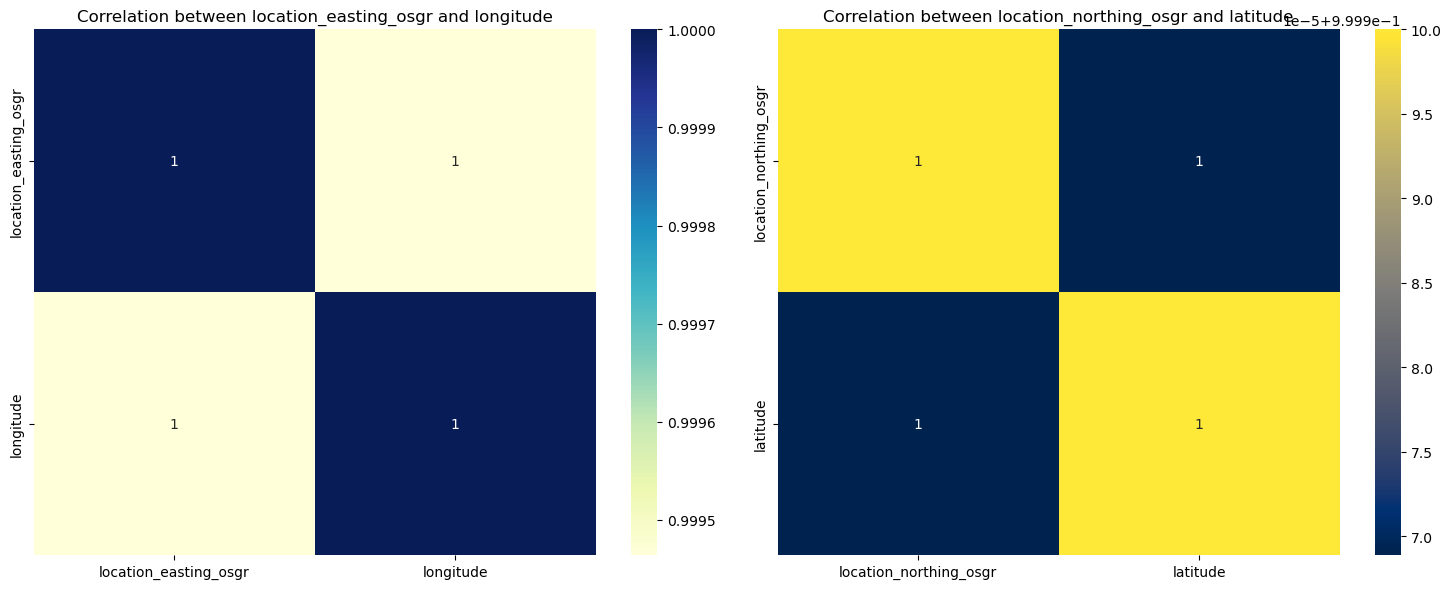

In [87]:
# Visualization of the correlations using heatmap
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# for location_easting_osgr and longitude
sns.heatmap(correlation_longitude, annot=True, cmap="YlGnBu")
# add plot title
plt.title("Correlation between location_easting_osgr and longitude")

# Visualization for location_northing_osgr and latitude
plt.subplot(1, 2, 2)
sns.heatmap(correlation_latitude, annot=True, cmap="cividis")
# plot title
plt.title("Correlation between location_northing_osgr and latitude")

plt.tight_layout()
# show the plot
plt.show()

# DROPPING THE UNNECESSARY COLUMNS

In [88]:
#  Let's drop the unnecessary columns

columns_unnecessary = ["lsoa_of_accident_location", "location_easting_osgr", "location_northing_osgr", "first_road_number", "second_road_number"]
accident_table = accident_table.drop(columns=columns_unnecessary)

In [89]:
# Sanity check on accident_table column 

accident_table

accident_index  accident_year accident_reference  longitude   latitude  \
0      2020010219808           2020          010219808  -0.254001  51.462262   
1      2020010220496           2020          010220496  -0.139253  51.470327   
2      2020010228005           2020          010228005  -0.178719  51.529614   
3      2020010228006           2020          010228006  -0.001683  51.541210   
4      2020010228011           2020          010228011  -0.137592  51.515704   
...              ...            ...                ...        ...        ...   
91194  2020991027064           2020          991027064  -2.926320  56.473539   
91195  2020991029573           2020          991029573  -4.267565  55.802353   
91196  2020991030297           2020          991030297  -2.271903  57.186317   
91197  2020991030900           2020          991030900  -3.968753  55.950940   
91198  2020991032575           2020          991032575  -4.561040  56.003843   

       police_force  accident_severity  number_of_vehicles  \
0                 1                  3                   1   
1                 1                  3                   1   
2                 1                  3                   1   
3                 1                  2                   1   
4                 1                  3                   1   
...             ...                ...                 ...   
91194            99                  2                   2   
91195            99                  3                   1   
91196            99                  2                   2   
91197            99                  3                   2   
91198            99                  3                   1   

       number_of_casualties        date  ...  \
0                         1  04/02/2020  ...   
1                         2  27/04/2020  ...   
2                         1  01/01/2020  ...   
3                         1  01/01/2020  ...   
4                         2  01/01/2020  ...   
...                     ...         ...  ...   
91194                     1  12/08/2020  ...   
91195                     1  13/11/2020  ...   
91196                     1  15/04/2020  ...   
91197                     1  15/12/2020  ...   
91198                     1  25/08/2020  ...   

       pedestrian_crossing_human_control  \
0                                      9   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
91194                                  0   
91195                                  0   
91196                                  0   
91197                                  0   
91198                                  0   

      pedestrian_crossing_physical_facilities  light_conditions  \
0                                           9                 1   
1                                           4                 1   
2                                           0                 4   
3                                           4                 4   
4                                           0                 4   
...                                       ...               ...   
91194                                       0                 1   
91195                                       0                 1   
91196                                       0                 1   
91197                                       0                 1   
91198                                       0                 1   

      weather_conditions road_surface_conditions  special_conditions_at_site  \
0                      9                       9                           0   
1                      1                       1                           0   
2                      1                       2                           0   
3                      1                       1                     

# DATA CLEANING

## Cleaning the sex of driver column

In [90]:
# The sex of driver column in the dataframe

vehicle_table['sex_of_driver']

0         2
1         1
2         3
3         1
4         1
         ..
167370    1
167371    1
167372    2
167373    1
167374    1
Name: sex_of_driver, Length: 167375, dtype: int64

In [91]:
# Rows where sex of driver is denoted as -1 (Negative)
sex_rows = vehicle_table[vehicle_table['sex_of_driver'] == -1]
sex_rows

vehicle_index accident_index  accident_year accident_reference  \
28            681744  2020010228045           2020          010228045   
445           682161  2020010228856           2020          010228856   
587           682303  2020010229084           2020          010229084   
1098          682814  2020010230168           2020          010230168   
1830          683546  2020010231483           2020          010231483   
2263          683979  2020010232252           2020          010232252   
3825          685541  2020010234862           2020          010234862   
5020          686736  2020010236894           2020          010236894   
5061          686777  2020010236965           2020          010236965   
5145          686861  2020010237117           2020          010237117   
5161          686877  2020010237133           2020          010237133   
13137         694853  2020010250167           2020          010250167   
13946         695662  2020010251291           2020          010251291   

       vehicle_reference  vehicle_type  towing_and_articulation  \
28                     2             9                        0   
445                    2             9                        0   
587                    2             9                        0   
1098                   2             9                        0   
1830                   2             9                        0   
2263                   2             9                        0   
3825                   2            11                        9   
5020                   2             9                        0   
5061                   1             9                        9   
5145                   2             9                        0   
5161                   2             9                        9   
13137                  1             9                        0   
13946                  2             9                        0   

       vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
28                    99                       9                     9  ...   
445                   99                       9                     9  ...   
587                   99                       9                     9  ...   
1098                  99                       9                     9  ...   
1830                  99                       9                     9  ...   
2263                  99                       9                     9  ...   
3825                  99                       9                     9  ...   
5020                  99                       9                     9  ...   
5061                  99                       9                     9  ...   
5145                  99                       9                     9  ...   
5161                  99                       9                     9  ...   
13137                 99                       9                     9  ...   
13946                 99                       9                     9  ...   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
28                            -1             -1             -1   
445                           -1             -1             -1   
587                           -1             -1             -1   
1098                          -1             -1             -1   
1830                          -1             -1             -1   
2263                          -1             -1             -1   
3825                          -1             -1             -1   
5020                          -1             -1             -1   
5061                          -1             -1             -1   
5145                          -1             -1             -1   
5161                          -1             -1             -1   
13137                         -1             -1             -1   
13946                         -1             -1             -1   

       age_ba

In [92]:
# Checking the unique value in sex of the driver column
print(vehicle_table['sex_of_driver'].unique())

[ 2  1  3 -1]


In [93]:
# Replace all -1 with nan in the 'sex_of_driver' column

vehicle_table['sex_of_driver'] = vehicle_table['sex_of_driver'].replace(-1, np.nan)

In [94]:
vehicle_table['sex_of_driver'].isnull().sum()

13

In [95]:
# Sanity check for -1

vehicle_table[vehicle_table['sex_of_driver'] == -1]

Empty DataFrame
Columns: [vehicle_index, accident_index, accident_year, accident_reference, vehicle_reference, vehicle_type, towing_and_articulation, vehicle_manoeuvre, vehicle_direction_from, vehicle_direction_to, vehicle_location_restricted_lane, junction_location, skidding_and_overturning, hit_object_in_carriageway, vehicle_leaving_carriageway, hit_object_off_carriageway, first_point_of_impact, vehicle_left_hand_drive, journey_purpose_of_driver, sex_of_driver, age_of_driver, age_band_of_driver, engine_capacity_cc, propulsion_code, age_of_vehicle, generic_make_model, driver_imd_decile, driver_home_area_type]
Index: []

[0 rows x 28 columns]

In [96]:
# Replace all nan values with 3 as it is stipulated as unknown
vehicle_table['sex_of_driver'].fillna(3, inplace = True)

From the vehicle record stats 19 form, sex of driver is filled as male = 1 Female = 2 unknown = 3. Therefore, since there is a column for unknown, we are going to change all -1 in sex of driver column in unknown_sex_rows to 3 meaning unknown_sex_rows



In [97]:
vehicle_table['sex_of_driver'].isnull().sum()

0

In [98]:
# Sanity check
print(vehicle_table['sex_of_driver'].unique())

[2. 1. 3.]


## Data Cleaning of Age of driver Column

In [99]:
# Check the unique value of age of the driver column
print(vehicle_table['age_of_driver'].unique())

[ 32  45  -1  44  20  25  41  19  26  62  37  40  33  51  30  18  29  24
  38  77  48  50  79  42  52  22  31  28  57  81  59  67  34  23  54  53
  27  39  56  43  88  35  46  16  49  21  80  66  55  47  60  36  58  70
  71  17  85  69  61  87  73  64  65  63  83  78  72  68  14  82  74  75
  11  76  15  86  90   9  10  91  84  13   8  89  93  94  92   6  12   5
   4   7  97  95   3  98 100  99  96]


In [100]:
# Let's convert the age of driver column to numeric

vehicle_table['age_of_driver'] = pd.to_numeric(vehicle_table['age_of_driver'], errors = 'coerce')
vehicle_table['age_of_driver']

0         32
1         45
2         -1
3         44
4         20
          ..
167370    57
167371    38
167372    68
167373    76
167374    39
Name: age_of_driver, Length: 167375, dtype: int64

In [101]:
# Let's calculate the mean of the 'age_of_driver' column
age_mean = int(vehicle_table['age_of_driver'].mean())
age_mean

34

In [102]:
# Let's replace -1 values with the mean (34) of age of driver 
vehicle_table['age_of_driver']= vehicle_table['age_of_driver'].replace(-1,age_mean)
vehicle_table['age_of_driver']

0         32
1         45
2         34
3         44
4         20
          ..
167370    57
167371    38
167372    68
167373    76
167374    39
Name: age_of_driver, Length: 167375, dtype: int64

In [103]:
#Sanity check for age of the driver column 
vehicle_table['age_of_driver'].unique()

array([ 32,  45,  34,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  38,  77,  48,  50,  79,  42,  52,  22,
        31,  28,  57,  81,  59,  67,  23,  54,  53,  27,  39,  56,  43,
        88,  35,  46,  16,  49,  21,  80,  66,  55,  47,  60,  36,  58,
        70,  71,  17,  85,  69,  61,  87,  73,  64,  65,  63,  83,  78,
        72,  68,  14,  82,  74,  75,  11,  76,  15,  86,  90,   9,  10,
        91,  84,  13,   8,  89,  93,  94,  92,   6,  12,   5,   4,   7,
        97,  95,   3,  98, 100,  99,  96], dtype=int64)

## Data Cleaning Age of Vehicle

In [104]:
# checking the values in age of vehicle column

print(vehicle_table['age_of_vehicle'].unique())

[ 6  2 -1  8  4  5  0  1 14  9 16 20 12 10 13 18  7  3 19 22 15 11 17 28
 21 32 24 25 23 27 30 26 29 31 34 37 44 39 57 38 51 54 33 62 46 43 41 48
 45 36 58 60 64 86 50 61 53 35 55 49 92 88 42 67 84 40 52 66 56 78 47 96
 68 63 93]


In [105]:
# Check the row in age of vehicle column with -1 value
rows_minus1 = vehicle_table[vehicle_table["age_of_vehicle"] == -1]
rows_minus1

vehicle_index accident_index  accident_year accident_reference  \
2              681718  2020010228005           2020          010228005   
10             681726  2020010228018           2020          010228018   
14             681730  2020010228022           2020          010228022   
32             681748  2020010228077           2020          010228077   
33             681749  2020010228086           2020          010228086   
...               ...            ...            ...                ...   
167362         849078  2020991024039           2020          991024039   
167366         849082  2020991024526           2020          991024526   
167367         849083  2020991027064           2020          991027064   
167368         849084  2020991027064           2020          991027064   
167373         849089  2020991030900           2020          991030900   

        vehicle_reference  vehicle_type  towing_and_articulation  \
2                       1             9                        0   
10                      1             9                        0   
14                      1             9                        0   
32                      2             2                        0   
33                      1             3                        0   
...                   ...           ...                      ...   
167362                  1             9                        0   
167366                  1            98                        0   
167367                  1             9                        0   
167368                  2             1                        0   
167373                  2             1                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
2                      18                      -1                    -1  ...   
10                     18                       1                     5  ...   
14                     18                       7                     3  ...   
32                     18                       8                     4  ...   
33                     18                       7                     3  ...   
...                   ...                     ...                   ...  ...   
167362                  1                       2                     6  ...   
167366                 18                       6                     2  ...   
167367                 16                       3                     7  ...   
167368                  5                       1                     5  ...   
167373                 18                       6                     2  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
2                               6            3.0             34   
10                              6            1.0             62   
14                              6            1.0             34   
32                              6            1.0             19   
33                              6            3.0             34   
...                           ...            ...            ...   
167362                          6            1.0             35   
167366                          1            1.0             43   
167367                          1            1.0             27   
167368                          5            1.0             11   
167373                          6            1.0             76   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
2                       -1                  -1               -1   
10                       9                  -1               -1   
14                      -1                  -1               -1   
32                       4                  -1               -1   
33                      -1                  -1               -1   
...                    ...                 ...              ...   
167362                   6                  -1               -1   


In [106]:
# Find the mean of age of vehicle
mean_vehicleage = int(vehicle_table['age_of_vehicle'].mean())
mean_vehicleage

5

In [107]:
# Let's use the mean (5) to replace the -1 since its a categorical data
vehicle_table['age_of_vehicle']=  vehicle_table['age_of_vehicle'].replace(-1,mean_vehicleage)
vehicle_table['age_of_vehicle']

0         6
1         2
2         5
3         8
4         4
         ..
167370    2
167371    2
167372    1
167373    5
167374    2
Name: age_of_vehicle, Length: 167375, dtype: int64

In [108]:
# Sanity check
vehicle_table['age_of_vehicle'].unique()

array([ 6,  2,  5,  8,  4,  0,  1, 14,  9, 16, 20, 12, 10, 13, 18,  7,  3,
       19, 22, 15, 11, 17, 28, 21, 32, 24, 25, 23, 27, 30, 26, 29, 31, 34,
       37, 44, 39, 57, 38, 51, 54, 33, 62, 46, 43, 41, 48, 45, 36, 58, 60,
       64, 86, 50, 61, 53, 35, 55, 49, 92, 88, 42, 67, 84, 40, 52, 66, 56,
       78, 47, 96, 68, 63, 93], dtype=int64)

## Data Cleaning of Journey purpose of driver column

In [109]:
# Check out the enteries in the column

vehicle_table['journey_purpose_of_driver'].unique()

array([ 6,  2,  1, -1,  3,  4,  5], dtype=int64)

The entry contains -1. Recall, according to the Stats20-2011 form attached to this project, the codes used in filling this column are 1. Journey as part of work 2. Commuting to/from work 3. Taking pupil to/from school 4. Pupil riding to/from school 5. Other 6. Not known.

Hence, since we are not guessing for this project, all -1 will be replaced with 6 representing not known. As the driver or rider is not available to be asked

In [110]:
# check  the row in journey_purpose_of_driver column that has -1
vehicle_table[vehicle_table['journey_purpose_of_driver'] == -1]

vehicle_index accident_index  accident_year accident_reference  \
28            681744  2020010228045           2020          010228045   
445           682161  2020010228856           2020          010228856   
587           682303  2020010229084           2020          010229084   
606           682322  2020010229180           2020          010229180   
624           682340  2020010229249           2020          010229249   
...              ...            ...            ...                ...   
24711         706427  2020010266626           2020          010266626   
25087         706803  2020010267176           2020          010267176   
25709         707425  2020010268066           2020          010268066   
46003         727719  2020052001639           2020          052001639   
46364         728080  2020052001942           2020          052001942   

       vehicle_reference  vehicle_type  towing_and_articulation  \
28                     2             9                        0   
445                    2             9                        0   
587                    2             9                        0   
606                    2             3                        0   
624                    2             9                        9   
...                  ...           ...                      ...   
24711                  2             9                        9   
25087                  2             9                        9   
25709                  1             9                       -1   
46003                  2             1                        0   
46364                  2             1                        0   

       vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
28                    99                       9                     9  ...   
445                   99                       9                     9  ...   
587                   99                       9                     9  ...   
606                   18                       5                     1  ...   
624                   99                       9                     9  ...   
...                  ...                     ...                   ...  ...   
24711                  7                       5                     7  ...   
25087                 18                       3                     7  ...   
25709                  7                       3                     5  ...   
46003                 18                       4                     8  ...   
46364                 -1                       0                     0  ...   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
28                            -1            3.0             34   
445                           -1            3.0             34   
587                           -1            3.0             34   
606                           -1            3.0             34   
624                           -1            3.0             34   
...                          ...            ...            ...   
24711                         -1            3.0             34   
25087                         -1            3.0             34   
25709                         -1            3.0             34   
46003                         -1            1.0             30   
46364                         -1            1.0             56   

       age_band_of_driver  engine_capacity_cc  propulsion_code  \
28                     -1                1797                8   
445                    -1                1349                1   
587                    -1                2188                2   
606                    -1                 125                1   
624                    -1                  -1               -1   
...                   ...                 ...              ...   
24711                  -1                1598                1   
25087                  -1                  -1          

In [111]:
# Let's replace all -1 entries with 6 in the journey purpose of driver column
vehicle_table['journey_purpose_of_driver'] = vehicle_table['journey_purpose_of_driver'].replace(-1, 6)

In [112]:
vehicle_table['journey_purpose_of_driver']

0         6
1         2
2         6
3         1
4         6
         ..
167370    1
167371    5
167372    6
167373    6
167374    6
Name: journey_purpose_of_driver, Length: 167375, dtype: int64

In [113]:
# Sanity check
vehicle_table['journey_purpose_of_driver'].unique()

array([6, 2, 1, 3, 4, 5], dtype=int64)

## Data Cleaning of Accident Table Dataframe

In [114]:
# Check for missing values in the dataframe.
accident_table.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
road_type                                       0
speed_limit                                     0
junction_detail                                 0
junction_control                                0


In [115]:
accident_table['latitude']

0        51.462262
1        51.470327
2        51.529614
3        51.541210
4        51.515704
           ...    
91194    56.473539
91195    55.802353
91196    57.186317
91197    55.950940
91198    56.003843
Name: latitude, Length: 91199, dtype: float64

In [116]:
accident_table['longitude']

0       -0.254001
1       -0.139253
2       -0.178719
3       -0.001683
4       -0.137592
           ...   
91194   -2.926320
91195   -4.267565
91196   -2.271903
91197   -3.968753
91198   -4.561040
Name: longitude, Length: 91199, dtype: float64

In [117]:
# Let's find the mean of the values
# Fill in the missing values in those columns with their mean.
longitude_mean = accident_table['longitude'].mean()
latitude_mean = accident_table['latitude'].mean()

In [118]:
# Let's replace NaN values with the mean
accident_table['longitude'].fillna(longitude_mean, inplace=True)
accident_table['latitude'].fillna(latitude_mean, inplace=True)

In [119]:
accident_table['latitude']

0        51.462262
1        51.470327
2        51.529614
3        51.541210
4        51.515704
           ...    
91194    56.473539
91195    55.802353
91196    57.186317
91197    55.950940
91198    56.003843
Name: latitude, Length: 91199, dtype: float64

In [120]:
# Let's do a sanity check
accident_table.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class   

## Cleaning of Weather Condition Column

In [121]:
accident_table['weather_conditions']

0        9
1        1
2        1
3        1
4        1
        ..
91194    1
91195    1
91196    1
91197    1
91198    1
Name: weather_conditions, Length: 91199, dtype: int64

In [122]:
# Check the unique value weather condition column
accident_table['weather_conditions'].unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

In [123]:
# Check the row with -1 value

accident_table[accident_table['weather_conditions'] == -1]

accident_index  accident_year accident_reference  longitude   latitude  \
79777  2020520002488           2020          520002488  -2.809007  51.288686   

       police_force  accident_severity  number_of_vehicles  \
79777            52                  1                   1   

       number_of_casualties        date  ...  \
79777                     1  24/06/2020  ...   

       pedestrian_crossing_human_control  \
79777                                 -1   

      pedestrian_crossing_physical_facilities  light_conditions  \
79777                                      -1                -1   

      weather_conditions road_surface_conditions  special_conditions_at_site  \
79777                 -1                      -1                          -1   

       carriageway_hazards  urban_or_rural_area  \
79777                   -1                    2   

       did_police_officer_attend_scene_of_accident  trunk_road_flag  
79777                                           -1                2  

[1 rows x 31 columns]

In [124]:
# Replace all -1 entries with 9 in the weather conditions column as 9 means unknown
accident_table['weather_conditions'] = accident_table['weather_conditions'].replace(-1, 9)

In [125]:
# Sanity check
accident_table['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

## Cleaning Speed Limit Column

In [126]:
accident_table['speed_limit']

0        20
1        20
2        30
3        30
4        30
         ..
91194    30
91195    30
91196    60
91197    30
91198    30
Name: speed_limit, Length: 91199, dtype: int64

In [127]:
# check the unique value of the speed limit column
accident_table['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [128]:
# According to the road safety open dataset
specified_speedlimits = [10, 20, 30, 40, 50, 60, 70] 

In [129]:
# Lets check the rows where the speedlimit is not in the specified values as specified in the open dataset
filtered_speedlimits = accident_table.loc[~accident_table['speed_limit'].isin(specified_speedlimits), 'speed_limit']
filtered_speedlimits

1993    -1
5381    -1
16520   -1
18039   -1
18264   -1
18487   -1
20496   -1
31115   -1
47041   -1
53894   -1
55920   -1
68361   -1
Name: speed_limit, dtype: int64

Speed limit has -1 values which might affect our analysis later. since its a numerical variable and to prevent the influence of outliers -1,  the median will be used  to replace the -1



In [130]:
# Lets calculate the median 

median_speed = accident_table['speed_limit'].median()
median_speed

30.0

In [131]:
# Lets replace NaN values with the median
accident_table['speed_limit'].fillna(median_speed, inplace=True)

In [132]:
# Replace -1 entries in speed_limit column, with median value
accident_table['speed_limit'] = accident_table['speed_limit'].replace(-1,median_speed)
accident_table['speed_limit']

0        20
1        20
2        30
3        30
4        30
         ..
91194    30
91195    30
91196    60
91197    30
91198    30
Name: speed_limit, Length: 91199, dtype: int64

In [133]:
# Sanity check
accident_table['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

## Cleaning of Junction Control


In [134]:
accident_table['junction_control'].unique

<bound method Series.unique of 0       -1
1        2
2        1
3       -1
4        4
        ..
91194    4
91195    4
91196   -1
91197    4
91198   -1
Name: junction_control, Length: 91199, dtype: int64>

Junction Control column has -1 values which might affect our analysis later. In order to avoid biasedness which would later affect the analysis, I would be replacing -1 with nan. As this wont affect the clustering and further analysis compared to the effect when it is left as -1

In [135]:
# Replace -1 entries in junction_control column, with median value
accident_table['junction_control'].replace(-1,np.nan)

0        NaN
1        2.0
2        1.0
3        NaN
4        4.0
        ... 
91194    4.0
91195    4.0
91196    NaN
91197    4.0
91198    NaN
Name: junction_control, Length: 91199, dtype: float64

In [136]:
# Checking for missing values
accident_table['junction_control'].isnull().sum()

0

In [137]:
# Lets check rows where 'Junction Detail' is coded 00
accident_table[accident_table['junction_detail'] == '00']

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, road_type, speed_limit, junction_detail, junction_control, second_road_class, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag]
Index: []

[0 rows x 31 columns]

## Accident Demography

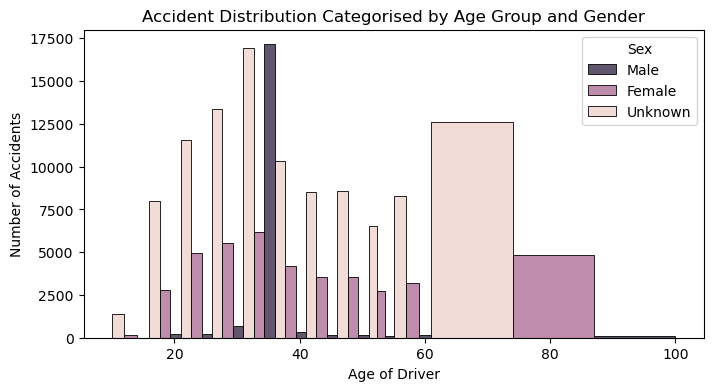

In [138]:
# Define age groups
built_agebins = [10, 16, 21, 26, 31, 36, 41, 46, 51, 55, 61, 100]
age_groups= ['10-15','16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '55-60', 'Over 60']

# create a new column for age groups column
vehicle_table['Age_Group'] = pd.cut(vehicle_table['age_of_driver'], bins=built_agebins, labels=age_groups)

# using seaborn to visualise
plt.figure(figsize=(8, 4))
sns.histplot(data=vehicle_table, x='age_of_driver', hue='sex_of_driver', multiple='dodge', bins=built_agebins)

#label the plot
plt.xlabel('Age of Driver')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution Categorised by Age Group and Gender')
plt.legend(title='Sex', labels=['Male', 'Female', 'Unknown'])

#show the plot
plt.show()
 

In [139]:
# Plot a heatmap showing the corrrelations
def correlation_heatmap(accident_table):
    plt.figure(figsize = (20, 15))
    sns.heatmap(accident_table.corr(), annot = True, cmap = plt.cm.CMRmap_r)
#plot the heatmap
heatmaps = accident_table.drop('accident_severity', axis = 1)
correlation_heatmap(heatmaps)

ValueError: could not convert string to float: '202001T246170'

<Figure size 2000x1500 with 0 Axes>

## Accident Severity Column


In [401]:
# checking the unique values in accident severity column
accident_table['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

In [402]:
# Value counts to check accident severity
accident_table['accident_severity'].value_counts()

accident_severity
3    71453
2    18355
1     1391
Name: count, dtype: int64

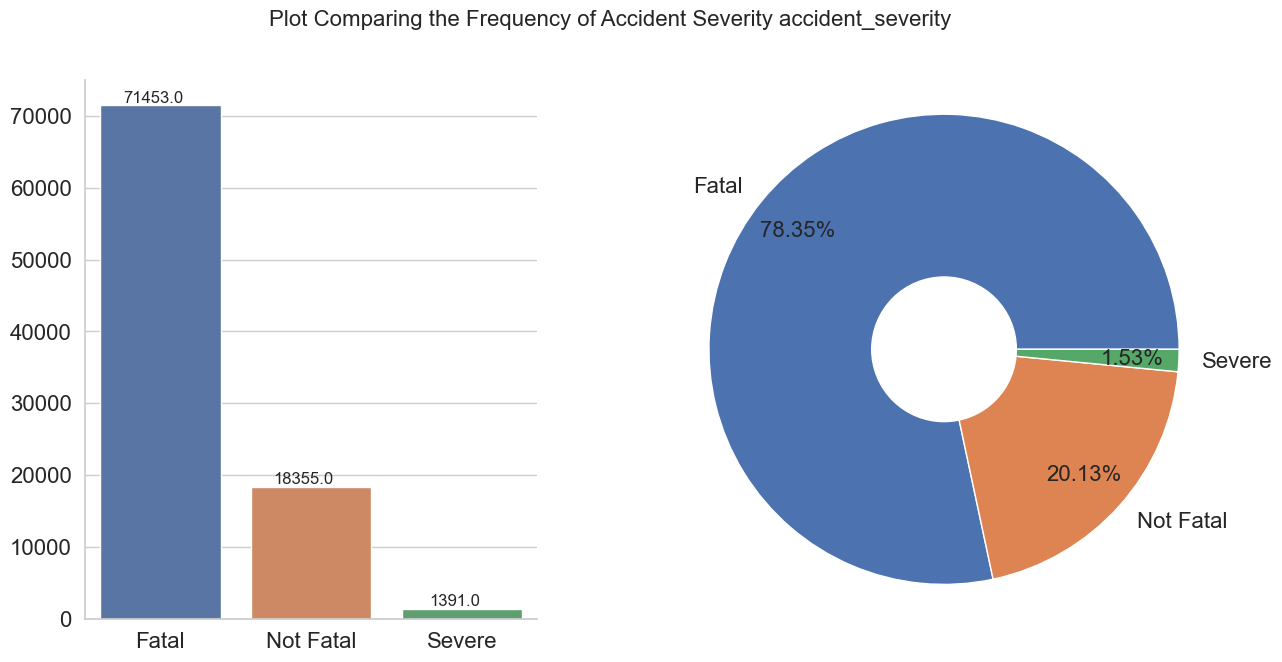

In [403]:
#define a mapping for determining accident severity levels
severity_mapping = {1: 'Severe', 2: 'Not Fatal', 3: 'Fatal'}

#include annotations
def first_function(plot):
    for annotaion in plot.patches:
        frequency = annotaion.get_height()
        x = annotaion.get_x() + annotaion.get_width() / 2 - 0.05
        y = annotaion.get_y() + annotaion.get_height()
        plot.annotate(f'{frequency}', (x, y), size=12, ha='center', va='bottom')

#visualization
def donut_plot(accident_table, col):
    plt.figure(figsize=(14, 7))

    #mapping numerical values to meaningful labels
    accident_table[col] = accident_table[col].map(severity_mapping)

    #using countplot for plot 1
    plot1 = plt.subplot(1, 2, 1)
    count = sns.countplot(x=accident_table[col])
    plot1.set_xlabel('')
    plot1.set_ylabel('')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    sns.despine(top=True, right=True)
    first_function(plot1)

    #using donutplot for plot 2
    plot2 = plt.subplot(1, 2, 2)
    plt.pie(accident_table[col].value_counts(),
            labels=accident_table[col].unique().tolist(),
            autopct='%1.2f%%',
            pctdistance=0.8,
            shadow=False,
            radius=1.3,
            textprops={'fontsize': 16}
            )
    circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    plot2.set_xlabel('')

    plt.suptitle("Plot Comparing the Frequency of Accident Severity {}".format(col), fontsize=16)
    plt.subplots_adjust(wspace=0.4)
    #show the plot
    plt.show()

donut_plot(accident_table, 'accident_severity')


## 1. Are there significant hours of the day, and days of the week, on which accidents occur?

In [140]:
plot_time = accident_table['time']
plot_time

0        09:00
1        13:55
2        01:25
3        01:50
4        02:25
         ...  
91194    14:30
91195    15:05
91196    12:42
91197    14:00
91198    13:50
Name: time, Length: 91199, dtype: object

In [141]:
significant_hours = accident_table.groupby('time')['accident_index'].count().sort_values(ascending=False)
significant_hours

time
17:00    862
16:00    785
15:00    774
17:30    746
18:00    739
        ... 
04:39      1
04:58      1
04:31      1
03:36      1
04:33      1
Name: accident_index, Length: 1438, dtype: int64

From the above information it shows that most accident occurs at 17:00 hour

In [142]:
## Convert the date in which accidents occur to datetime with the correct format
accident_table['date'] = pd.to_datetime(accident_table['date'], format='%d/%m/%Y')
accident_table['date']


0       2020-02-04
1       2020-04-27
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
91194   2020-08-12
91195   2020-11-13
91196   2020-04-15
91197   2020-12-15
91198   2020-08-25
Name: date, Length: 91199, dtype: datetime64[ns]

In [143]:
# Convert 'time' column to datetime format
accident_table['time'] = pd.to_datetime(accident_table['time'],format='%H:%M').dt.time

accident_table['time']

0        09:00:00
1        13:55:00
2        01:25:00
3        01:50:00
4        02:25:00
           ...   
91194    14:30:00
91195    15:05:00
91196    12:42:00
91197    14:00:00
91198    13:50:00
Name: time, Length: 91199, dtype: object

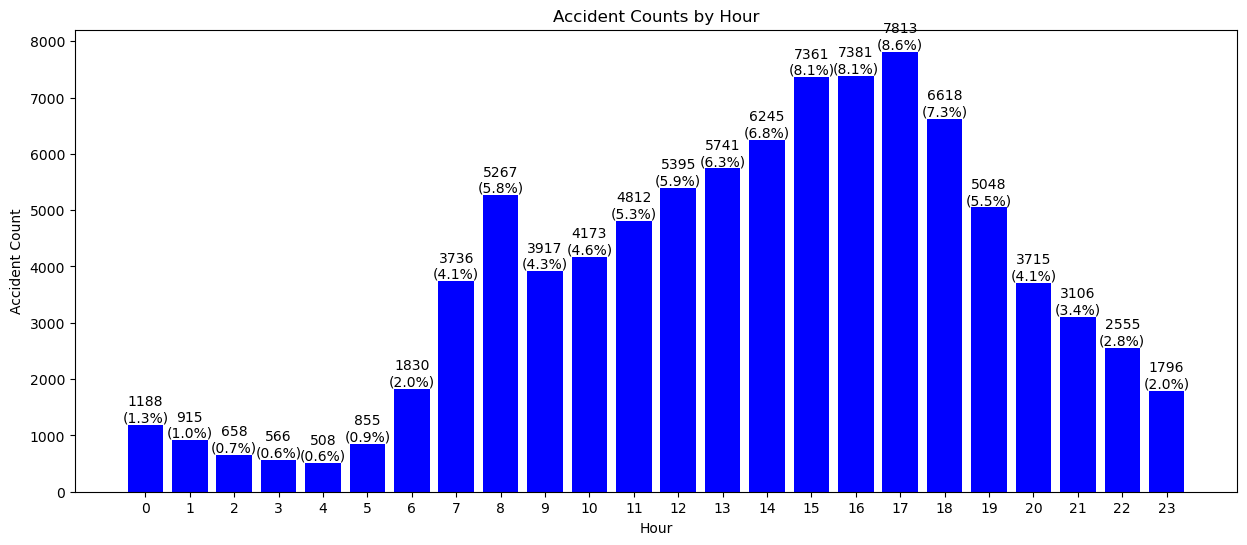

In [144]:
# Extract the hour from the 'time' column
accident_table['hour'] = accident_table['time'].apply(lambda x: x.hour)

# Calculate the counts of accidents for each hour
hourly_counts = accident_table['hour'].value_counts().sort_index()

# Total number of accidents
total_accidents = hourly_counts.sum()

# Create a bar plot of accident counts by hour
plt.figure(figsize=(15, 6))
MOVE = plt.bar(hourly_counts.index, hourly_counts.values, color='blue')

# Add counts and percentage on top of each bar
for COUNTING in MOVE:
    height = COUNTING.get_height()
    plt.annotate(f'{height}\n({height / total_accidents:.1%})', (COUNTING.get_x() + COUNTING.get_width() / 2., height), ha='center', va='bottom')
plt.title('Accident Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.xticks(hourly_counts.index)
plt.show()


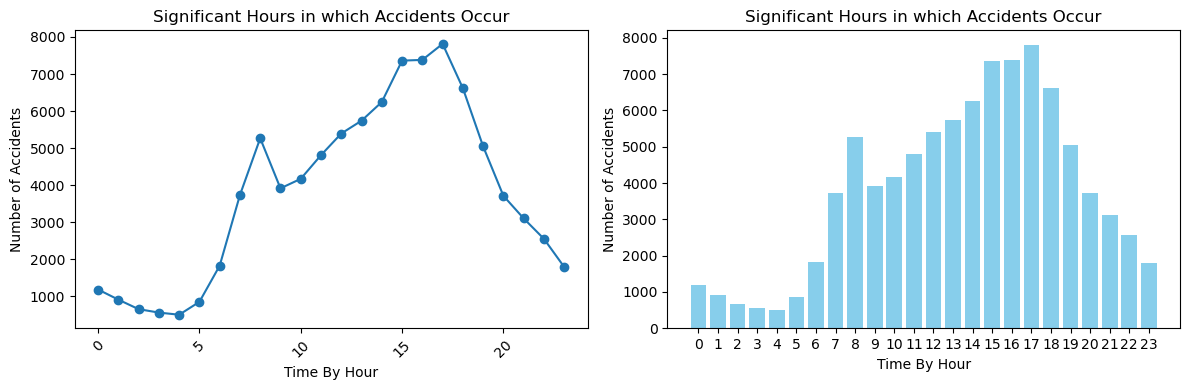

In [145]:
# Change the 'time' column to datetime format and store in a variable for plotting
time_datetime = pd.to_datetime(accident_table['time'], format='%H:%M:%S')

# Count of accidents per hour
counts_acci = time_datetime.dt.hour.value_counts().sort_index()

# Sort the accident counts by time
sort_count = counts_acci.sort_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot 1 - Sorted Counts by Time
ax1 = axes[0]
ax1.plot(sort_count.index, sort_count.values, marker='o')
# Label the plot
ax1.set_title('Significant Hours in which Accidents Occur')
ax1.set_xlabel('Time By Hour')
ax1.set_ylabel('Number of Accidents')
ax1.tick_params(axis='x', rotation=45)

# Plot 2 - Hourly Distribution of Accidents

ax2 = axes[1]
ax2.bar(hourly_counts.index, hourly_counts.values, color='skyblue')

# Label the plots
ax2.set_title('Significant Hours in which Accidents Occur')
ax2.set_xlabel('Time By Hour')
ax2.set_ylabel('Number of Accidents')
ax2.set_xticks(hourly_counts.index)

plt.tight_layout()
# Show the plot
plt.show()


# Significant Days In Which Accident Occurs

In [146]:
# Mapping the numerical values for name of the week to actual day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accident_table['day_names'] = accident_table['day_of_week'].replace(dict(enumerate(day_names)))

# Display the new column for day_name
accident_table[['day_of_week', 'day_names']]

day_of_week  day_names
0                3  Wednesday
1                2    Tuesday
2                4   Thursday
3                4   Thursday
4                4   Thursday
...            ...        ...
91194            4   Thursday
91195            6   Saturday
91196            4   Thursday
91197            3  Wednesday
91198            3  Wednesday

[91199 rows x 2 columns]

In [147]:
# Mapping the numerical values for name of the week to actual day names

day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accident_table['day_names'] = accident_table['day_of_week'].replace(dict(enumerate(day_names)))

# Display the new dataframe showing the added column for day_names
accident_table

accident_index  accident_year accident_reference  longitude   latitude  \
0      2020010219808           2020          010219808  -0.254001  51.462262   
1      2020010220496           2020          010220496  -0.139253  51.470327   
2      2020010228005           2020          010228005  -0.178719  51.529614   
3      2020010228006           2020          010228006  -0.001683  51.541210   
4      2020010228011           2020          010228011  -0.137592  51.515704   
...              ...            ...                ...        ...        ...   
91194  2020991027064           2020          991027064  -2.926320  56.473539   
91195  2020991029573           2020          991029573  -4.267565  55.802353   
91196  2020991030297           2020          991030297  -2.271903  57.186317   
91197  2020991030900           2020          991030900  -3.968753  55.950940   
91198  2020991032575           2020          991032575  -4.561040  56.003843   

       police_force  accident_severity  number_of_vehicles  \
0                 1                  3                   1   
1                 1                  3                   1   
2                 1                  3                   1   
3                 1                  2                   1   
4                 1                  3                   1   
...             ...                ...                 ...   
91194            99                  2                   2   
91195            99                  3                   1   
91196            99                  2                   2   
91197            99                  3                   2   
91198            99                  3                   1   

       number_of_casualties       date  ...  light_conditions  \
0                         1 2020-02-04  ...                 1   
1                         2 2020-04-27  ...                 1   
2                         1 2020-01-01  ...                 4   
3                         1 2020-01-01  ...                 4   
4                         2 2020-01-01  ...                 4   
...                     ...        ...  ...               ...   
91194                     1 2020-08-12  ...                 1   
91195                     1 2020-11-13  ...                 1   
91196                     1 2020-04-15  ...                 1   
91197                     1 2020-12-15  ...                 1   
91198                     1 2020-08-25  ...                 1   

      weather_conditions  road_surface_conditions special_conditions_at_site  \
0                      9                        9                          0   
1                      1                        1                          0   
2                      1                        2                          0   
3                      1                        1                          0   
4                      1                        1                          0   
...                  ...                      ...                        ...   
91194                  1                        1                          0   
91195                  1                        1                          0   
91196                  1                        1                          0   
91197                  1                        1                          0   
91198                  1                        1                          0   

      carriageway_hazards  urban_or_rural_area  \
0                       0                    1   
1                       0                    1   
2                       0                    1   
3                       0                    1   
4                       0                    1   
...                   ...                  ...   
91194                   0                    1   
91195                   0                    1   
91196                   0                    2   
91197                   0                    1   
91198   

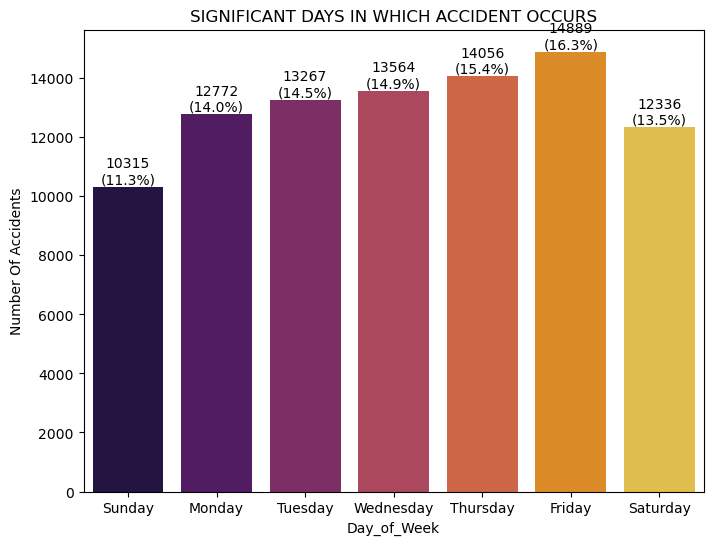

In [148]:
# Significant Days In Which Accidents Occur
Amounts = accident_table['day_of_week'].value_counts().sort_index()

# Total number of accidents
total_accidents_days = Amounts.sum()

# Use seaborn to visualize
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=accident_table['day_of_week'], order=Amounts.index, palette='inferno')

# Add the value counts and percentage to the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}\n({height / total_accidents_days:.1%})", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

plt.title('SIGNIFICANT DAYS IN WHICH ACCIDENT OCCURS')
plt.xlabel('Day_of_Week')
plt.ylabel('Number Of Accidents')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=0)
# Display the plot
plt.show()


In [149]:
# Count the occurrence of each of the unique value representing each day of the week in the "day_of_week" column 
accident_table[['day_of_week']].value_counts()

day_of_week
6              14889
5              14056
4              13564
3              13267
2              12772
7              12336
1              10315
Name: count, dtype: int64

# 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [150]:
# Filter through the vehicle dataframe where vehicle_type is 2 or 3
motorbikes_125cc = vehicle_table[vehicle_table['vehicle_type'].isin([2, 3])]

motorbikes_125cc

vehicle_index accident_index  accident_year accident_reference  \
12             681728  2020010228020           2020          010228020   
32             681748  2020010228077           2020          010228077   
33             681749  2020010228086           2020          010228086   
36             681752  2020010228097           2020          010228097   
58             681774  2020010228148           2020          010228148   
...               ...            ...            ...                ...   
167091         848807  2020991008618           2020          991008618   
167149         848865  2020991009778           2020          991009778   
167195         848911  2020991010130           2020          991010130   
167292         849008  2020991011809           2020          991011809   
167301         849017  2020991012311           2020          991012311   

        vehicle_reference  vehicle_type  towing_and_articulation  \
12                      1             3                        0   
32                      2             2                        0   
33                      1             3                        0   
36                      2             3                        0   
58                      1             3                        0   
...                   ...           ...                      ...   
167091                  1             3                        0   
167149                  2             3                        0   
167195                  2             3                        0   
167292                  2             3                        0   
167301                  1             3                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
12                      3                       7                     3  ...   
32                     18                       8                     4  ...   
33                     18                       7                     3  ...   
36                     18                       1                     5  ...   
58                     14                       5                     1  ...   
...                   ...                     ...                   ...  ...   
167091                 18                       5                     1  ...   
167149                 18                       5                     1  ...   
167195                 14                       7                     3  ...   
167292                  5                       7                     3  ...   
167301                 18                       8                     4  ...   

        sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
12                1.0             37                   7                 114   
32                1.0             19                   4                  -1   
33                3.0             34                  -1                  -1   
36                1.0             20                   4                 125   
58                1.0             20                   4                 125   
...               ...            ...                 ...                 ...   
167091            1.0             18                   4                  -1   
167149            1.0             17                   4                 125   
167195            1.0             47                   8                 124   
167292            1.0             61                   9                 124   
167301            1.0             35                   6                 125   

        propulsion_code  age_of_vehicle  generic_make_model  \
12                    1               5        YAMAHA XC115   
32                   -1               5                  -1   
33                   -1               5                  -1   
36                    1               4   PEUGEOT TWEET 125   
58                    1               0       HONDA GLR 125   
..

In [151]:
motorbikes_125cc.head(5)

vehicle_index accident_index  accident_year accident_reference  \
12         681728  2020010228020           2020          010228020   
32         681748  2020010228077           2020          010228077   
33         681749  2020010228086           2020          010228086   
36         681752  2020010228097           2020          010228097   
58         681774  2020010228148           2020          010228148   

    vehicle_reference  vehicle_type  towing_and_articulation  \
12                  1             3                        0   
32                  2             2                        0   
33                  1             3                        0   
36                  2             3                        0   
58                  1             3                        0   

    vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
12                  3                       7                     3  ...   
32                 18                       8                     4  ...   
33                 18                       7                     3  ...   
36                 18                       1                     5  ...   
58                 14                       5                     1  ...   

    sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
12            1.0             37                   7                 114   
32            1.0             19                   4                  -1   
33            3.0             34                  -1                  -1   
36            1.0             20                   4                 125   
58            1.0             20                   4                 125   

    propulsion_code  age_of_vehicle  generic_make_model  driver_imd_decile  \
12                1               5        YAMAHA XC115                  8   
32               -1               5                  -1                  5   
33               -1               5                  -1                 -1   
36                1               4   PEUGEOT TWEET 125                  6   
58                1               0       HONDA GLR 125                  2   

    driver_home_area_type  Age_Group  
12                      1      36-40  
32                      1      16-20  
33                     -1      31-35  
36                      1      16-20  
58                      1      16-20  

[5 rows x 29 columns]

 Merge accident index on vehicle table already filtered and the accident table so we can see where accident occur when vehicle type is either 2 or 3

In [152]:
# Check the object type of accident index to ensure its in correct format before merging
motorbikes_125cc['accident_index'].dtype

accident_table['accident_index'].dtype

dtype('O')

In [153]:
# Use the accident index column to merge the two dataframes
motorbike_accident = pd.merge(motorbikes_125cc, accident_table, on = 'accident_index')
motorbike_accident

vehicle_index accident_index  accident_year_x accident_reference_x  \
0            681728  2020010228020             2020            010228020   
1            681748  2020010228077             2020            010228077   
2            681749  2020010228086             2020            010228086   
3            681752  2020010228097             2020            010228097   
4            681774  2020010228148             2020            010228148   
...             ...            ...              ...                  ...   
8646         848807  2020991008618             2020            991008618   
8647         848865  2020991009778             2020            991009778   
8648         848911  2020991010130             2020            991010130   
8649         849008  2020991011809             2020            991011809   
8650         849017  2020991012311             2020            991012311   

      vehicle_reference  vehicle_type  towing_and_articulation  \
0                     1             3                        0   
1                     2             2                        0   
2                     1             3                        0   
3                     2             3                        0   
4                     1             3                        0   
...                 ...           ...                      ...   
8646                  1             3                        0   
8647                  2             3                        0   
8648                  2             3                        0   
8649                  2             3                        0   
8650                  1             3                        0   

      vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                     3                       7                     3  ...   
1                    18                       8                     4  ...   
2                    18                       7                     3  ...   
3                    18                       1                     5  ...   
4                    14                       5                     1  ...   
...                 ...                     ...                   ...  ...   
8646                 18                       5                     1  ...   
8647                 18                       5                     1  ...   
8648                 14                       7                     3  ...   
8649                  5                       7                     3  ...   
8650                 18                       8                     4  ...   

      light_conditions  weather_conditions  road_surface_conditions  \
0                    4                   1                        1   
1                    1                   1                        1   
2                    1                   1                        1   
3                    1                   1                        1   
4                    4                   1                        1   
...                ...                 ...                      ...   
8646                 6                   1                        1   
8647                 4                   2                        2   
8648                 4                   1                        1   
8649                 4                   8                        2   
8650                 4                   1                        1   

      special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                              0                    0                    1   
1                              0                    0                    1   
2                              0                    0                    1   
3                              0                    0                    1   
4                              0                    0                    1   
...                          ...          

In [154]:
# Exploring the new dataframe for motorbikes_125cc
motorbike_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8651 entries, 0 to 8650
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   vehicle_index                                8651 non-null   int64         
 1   accident_index                               8651 non-null   object        
 2   accident_year_x                              8651 non-null   int64         
 3   accident_reference_x                         8651 non-null   object        
 4   vehicle_reference                            8651 non-null   int64         
 5   vehicle_type                                 8651 non-null   int64         
 6   towing_and_articulation                      8651 non-null   int64         
 7   vehicle_manoeuvre                            8651 non-null   int64         
 8   vehicle_direction_from                       8651 non-null   int64         
 9

In [155]:
# Convert to datetime format with hours, minutes, and seconds
motorbike_accident['time'] = pd.to_datetime(motorbike_accident['time'], format='%H:%M:%S')
motorbike_accident['time']


0      1900-01-01 03:25:00
1      1900-01-01 08:00:00
2      1900-01-01 14:00:00
3      1900-01-01 14:37:00
4      1900-01-01 19:05:00
               ...        
8646   1900-01-01 07:20:00
8647   1900-01-01 20:50:00
8648   1900-01-01 16:30:00
8649   1900-01-01 17:30:00
8650   1900-01-01 17:55:00
Name: time, Length: 8651, dtype: datetime64[ns]

In [156]:
# Extract the hours from the time column
motorbike_accident['hour'] = motorbike_accident['time'].dt.hour
motorbike_accident['hour']

0        3
1        8
2       14
3       14
4       19
        ..
8646     7
8647    20
8648    16
8649    17
8650    17
Name: hour, Length: 8651, dtype: int32

In [157]:
# Determine the motorbike under 1255cc accident counts per hour
accident_counts  = motorbike_accident.groupby(motorbike_accident['hour']).size()
accident_counts 

hour
0      73
1      60
2      37
3      30
4      30
5      59
6     133
7     293
8     304
9     245
10    289
11    364
12    485
13    591
14    605
15    647
16    706
17    805
18    806
19    669
20    534
21    424
22    291
23    171
dtype: int64

In [158]:
# Group the motorbike_accident hour by hour, count occurrences, and sort by count in descending order
motorbike_accident_hour = motorbike_accident['time'].dt.time.value_counts().sort_values(ascending=False)
print(motorbike_accident_hour)

time
17:00:00    90
17:30:00    81
19:00:00    80
15:30:00    79
18:30:00    77
            ..
07:13:00     1
05:15:00     1
22:14:00     1
13:03:00     1
11:32:00     1
Name: count, Length: 1166, dtype: int64


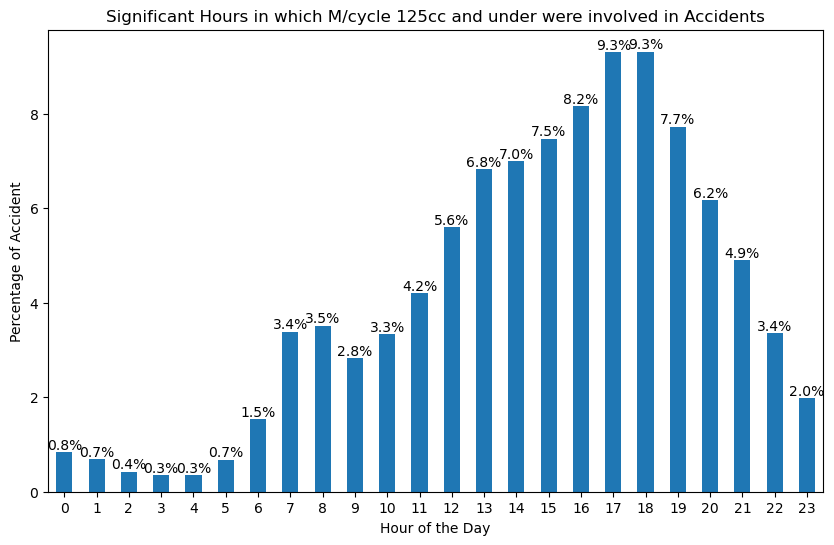

In [159]:
# Calculate the total count of accidents
total_accidents = accident_counts.sum()

# Calculate the percentages
percentages = (accident_counts / total_accidents) * 100

# Visualization
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')

# Add the percentage labels on top of each the bars
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Remove grid lines
ax.grid(False)

# Label the plots
plt.title('Significant Hours in which M/cycle 125cc and under were involved in Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Accident')
plt.xticks(rotation=0)

# Display the plots
plt.show()


# Significant Day Of The Week in Which Motorcycle 125cc and under Are Involved In Accident

In [160]:
motorbike_accident['day_of_week']

0       4
1       4
2       4
3       4
4       4
       ..
8646    1
8647    5
8648    5
8649    4
8650    2
Name: day_of_week, Length: 8651, dtype: int64

In [161]:
day_of_week_counts = motorbike_accident['day_of_week'].value_counts()
print(day_of_week_counts)

day_of_week
6    1474
5    1389
4    1249
7    1216
3    1202
2    1173
1     948
Name: count, dtype: int64


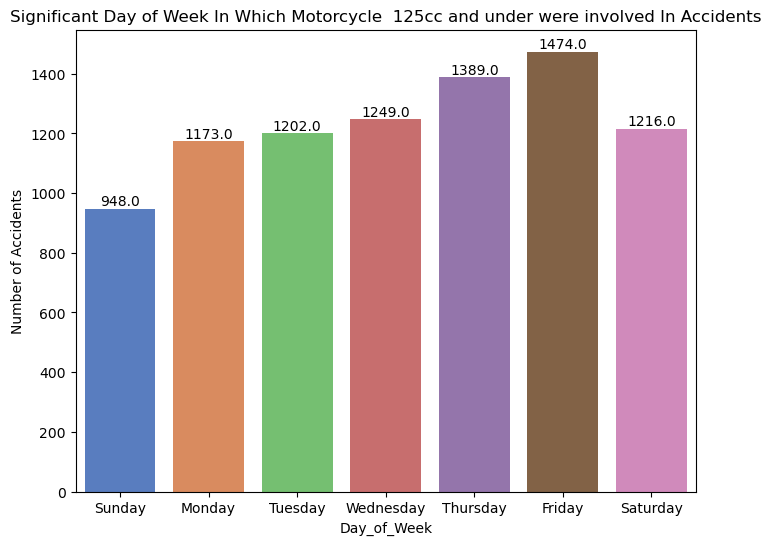

In [162]:
# SIGNIFICANT DAYS IN WHICH ACCIDENT OCCURS
motorbike_accident_Amounts = motorbike_accident['day_of_week'].value_counts().sort_index()

# Use seaborn to visualize
plt.figure(figsize=(8, 6))
sue = sns.countplot(x=motorbike_accident['day_of_week'], order=motorbike_accident_Amounts.index, palette='muted')

# Include the count at the top of each bar
for new_numbers in sue.patches:
    sue.annotate(f'{new_numbers.get_height()}', (new_numbers.get_x() +new_numbers.get_width() / 2., new_numbers.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Label the plot
plt.title('Significant Day of Week In Which Motorcycle  125cc and under were involved In Accidents')
plt.xlabel('Day_of_Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=0)
#display the plot
plt.show()

##  Motorcycle over 125cc and up to 500cc

Recall, according to the accident form, vehicle type codes 4 denotes  Motorcycle over 125cc and up to 500cc

In [163]:
motorbikes_over_125cc = vehicle_table[vehicle_table['vehicle_type']==4]
motorbikes_over_125cc

vehicle_index accident_index  accident_year accident_reference  \
92             681808  2020010228247           2020          010228247   
106            681822  2020010228265           2020          010228265   
618            682334  2020010229213           2020          010229213   
722            682438  2020010229461           2020          010229461   
750            682466  2020010229496           2020          010229496   
...               ...            ...            ...                ...   
166361         848077  2020990997907           2020          990997907   
166744         848460  2020991003397           2020          991003397   
166837         848553  2020991004865           2020          991004865   
167039         848755  2020991008057           2020          991008057   
167304         849020  2020991012353           2020          991012353   

        vehicle_reference  vehicle_type  towing_and_articulation  \
92                      1             4                        0   
106                     1             4                        0   
618                     1             4                        0   
722                     2             4                        0   
750                     1             4                        0   
...                   ...           ...                      ...   
166361                  1             4                        0   
166744                  3             4                        0   
166837                  2             4                        0   
167039                  2             4                        0   
167304                  2             4                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
92                     13                       5                     1  ...   
106                    13                       4                     8  ...   
618                    99                       9                     9  ...   
722                     4                       1                     5  ...   
750                    15                       3                     7  ...   
...                   ...                     ...                   ...  ...   
166361                 18                       8                     4  ...   
166744                 17                       4                     8  ...   
166837                 17                       8                     5  ...   
167039                 18                       7                     2  ...   
167304                 18                       6                     2  ...   

        sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
92                1.0             39                   7                 125   
106               1.0             33                   6                 125   
618               1.0             44                   7                 395   
722               1.0             26                   6                 499   
750               1.0             18                   4                  -1   
...               ...            ...                 ...                 ...   
166361            1.0             21                   5                  -1   
166744            1.0             29                   6                 249   
166837            2.0             27                   6                 125   
167039            1.0             38                   7                 249   
167304            1.0             48                   8                 250   

        propulsion_code  age_of_vehicle  generic_make_model  \
92                    1               7         HONDA SH125   
106                   1               3      HONDA WW125EX2   
618                   1              10                  -1   
722                   1              16                  -1   
750                  -1               5         PIAGGIO MP3   
..

In [164]:
# Use the accident index column to merge the two dataframes (motorbikes_over_125cc, accident_table)
motorbike_overaccident = pd.merge(motorbikes_over_125cc, accident_table, on = 'accident_index')
motorbike_overaccident

vehicle_index accident_index  accident_year_x accident_reference_x  \
0            681808  2020010228247             2020            010228247   
1            681822  2020010228265             2020            010228265   
2            682334  2020010229213             2020            010229213   
3            682438  2020010229461             2020            010229461   
4            682466  2020010229496             2020            010229496   
...             ...            ...              ...                  ...   
1686         848077  2020990997907             2020            990997907   
1687         848460  2020991003397             2020            991003397   
1688         848553  2020991004865             2020            991004865   
1689         848755  2020991008057             2020            991008057   
1690         849020  2020991012353             2020            991012353   

      vehicle_reference  vehicle_type  towing_and_articulation  \
0                     1             4                        0   
1                     1             4                        0   
2                     1             4                        0   
3                     2             4                        0   
4                     1             4                        0   
...                 ...           ...                      ...   
1686                  1             4                        0   
1687                  3             4                        0   
1688                  2             4                        0   
1689                  2             4                        0   
1690                  2             4                        0   

      vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                    13                       5                     1  ...   
1                    13                       4                     8  ...   
2                    99                       9                     9  ...   
3                     4                       1                     5  ...   
4                    15                       3                     7  ...   
...                 ...                     ...                   ...  ...   
1686                 18                       8                     4  ...   
1687                 17                       4                     8  ...   
1688                 17                       8                     5  ...   
1689                 18                       7                     2  ...   
1690                 18                       6                     2  ...   

      light_conditions  weather_conditions  road_surface_conditions  \
0                    1                   1                        1   
1                    4                   1                        1   
2                    4                   1                        1   
3                    4                   1                        2   
4                    4                   1                        2   
...                ...                 ...                      ...   
1686                 4                   1                        2   
1687                 6                   1                        1   
1688                 1                   1                        2   
1689                 4                   1                        1   
1690                 1                   1                        1   

      special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                              0                    0                    1   
1                              0                    2                    1   
2                              0                    0                    1   
3                              0                    0                    1   
4                              0                    0                    1   
...                          ...          

In [165]:
# Exploring the new dataframe 
motorbike_overaccident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   vehicle_index                                1691 non-null   int64         
 1   accident_index                               1691 non-null   object        
 2   accident_year_x                              1691 non-null   int64         
 3   accident_reference_x                         1691 non-null   object        
 4   vehicle_reference                            1691 non-null   int64         
 5   vehicle_type                                 1691 non-null   int64         
 6   towing_and_articulation                      1691 non-null   int64         
 7   vehicle_manoeuvre                            1691 non-null   int64         
 8   vehicle_direction_from                       1691 non-null   int64         
 9

## Significant Hrs Of the Day in Which Motorcycle over 125cc and up to 500cc Are Involved In Accidents


In [166]:
# Convert to date time format
motorbike_overaccident['time'] = pd.to_datetime(motorbike_overaccident['time'], format='%H:%M:%S')
motorbike_overaccident['time']

0      1900-01-01 14:17:00
1      1900-01-01 17:35:00
2      1900-01-01 16:33:00
3      1900-01-01 18:40:00
4      1900-01-01 20:31:00
               ...        
1686   1900-01-01 18:45:00
1687   1900-01-01 16:23:00
1688   1900-01-01 09:40:00
1689   1900-01-01 17:55:00
1690   1900-01-01 15:45:00
Name: time, Length: 1691, dtype: datetime64[ns]

In [167]:
# Check the most significant hour
motorbike_overaccident['hour'] = motorbike_overaccident['time'].dt.hour
motorbike_overaccident['hour']

0       14
1       17
2       16
3       18
4       20
        ..
1686    18
1687    16
1688     9
1689    17
1690    15
Name: hour, Length: 1691, dtype: int32

In [168]:
# Group the motorbike_overaccident by hour, count occurrences, and sort by count in descending order
motorbike_overaccident_hour = motorbike_overaccident['time'].dt.time.value_counts().sort_values(ascending=False)

# Display
print(motorbike_overaccident_hour)

time
17:00:00    23
16:00:00    18
15:30:00    17
16:30:00    17
15:00:00    16
            ..
09:14:00     1
12:39:00     1
05:12:00     1
08:56:00     1
09:40:00     1
Name: count, Length: 685, dtype: int64


In [169]:
 # Group the motorbike_overaccident by hour, count occurrences, and sort by count in descending order
motorbike_overaccident_hour = motorbike_overaccident['hour'].value_counts().sort_values(ascending=False)

print(motorbike_overaccident_hour) 

hour
17    175
16    157
15    151
14    131
18    128
13    122
12     93
19     93
20     82
7      77
11     70
10     67
8      62
21     56
9      54
22     38
6      35
23     34
1      18
0      17
5      13
4       9
3       5
2       4
Name: count, dtype: int64


## Visualise the significant hours of the day in which Motorcycle over 125cc and up to 500cc are involved in accidents

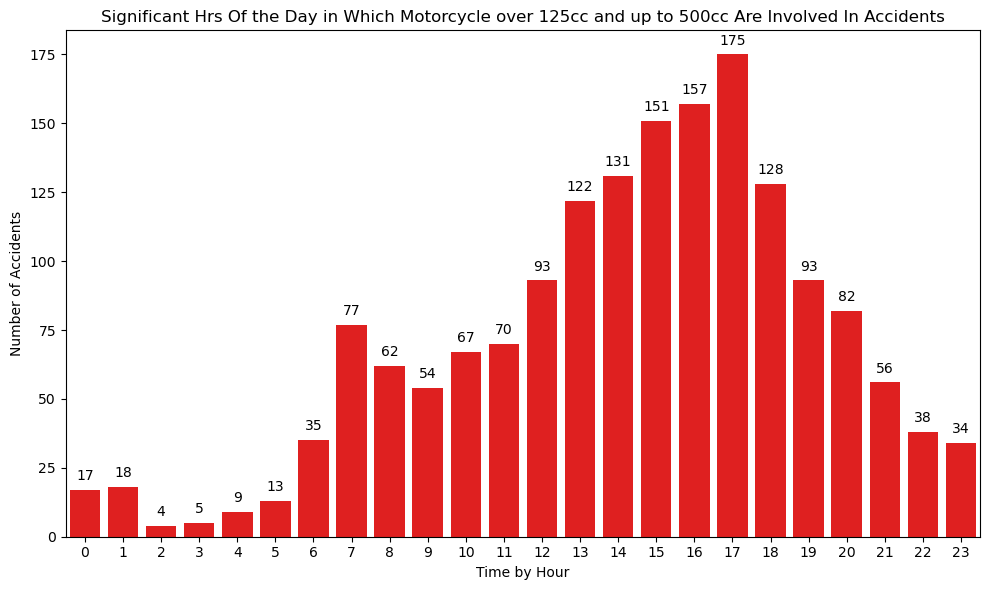

In [170]:
# Extract the hour from the timestamp
motorbike_overaccident['hour'] = motorbike_overaccident['time'].dt.hour

# Calculate the counts of pedestrian accidents for each hour
hourly_counts = motorbike_overaccident['hour'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10,6))
over125 = sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='red')

# Add the count at the top of the bars
for synchronise, label in zip(over125.patches, hourly_counts.values):
    over125.annotate(str(label), (synchronise.get_x() + synchronise.get_width() / 2., synchronise.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove grid lines
ax.grid(False) 

# Label the plot
plt.title('Significant Hrs Of the Day in Which Motorcycle over 125cc and up to 500cc Are Involved In Accidents')
plt.xlabel('Time by Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
#display the plot
plt.show()


## Significant Day Of The Week in Which Motorcycle over 125cc and up to 500cc Are Involved In Accidents

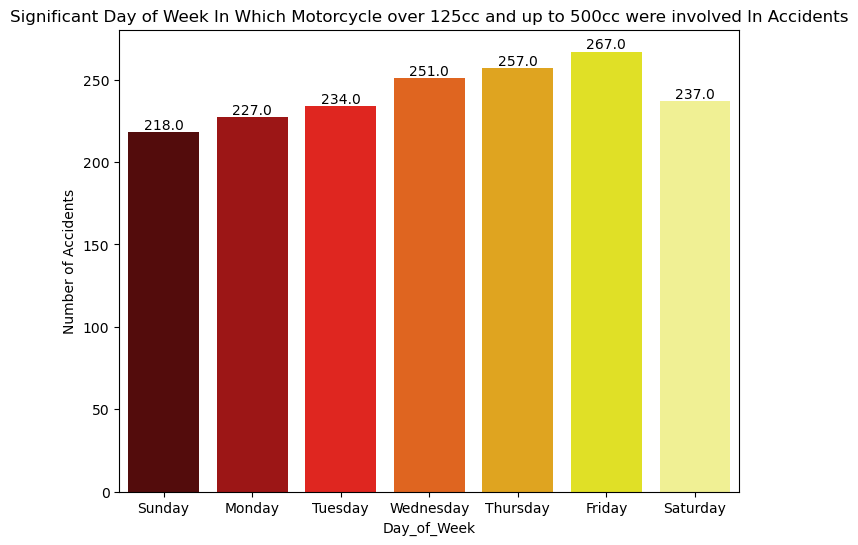

In [171]:
# Significant days in which accident occurs 
motorbike_overaccident_Amounts = motorbike_overaccident['day_of_week'].value_counts().sort_index()

# Visualize using seaborn
plt.figure(figsize=(8, 6))
sue = sns.countplot(x=motorbike_overaccident['day_of_week'], order=motorbike_overaccident_Amounts.index, palette='hot')

# Include the count at the top of each bar
for numbers in sue.patches:
    sue.annotate(f'{numbers.get_height()}', (numbers.get_x() +numbers.get_width() / 2., numbers.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Label the plot
plt.title('Significant Day of Week In Which Motorcycle over 125cc and up to 500cc were involved In Accidents')
plt.xlabel('Day_of_Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=0)
#display the plot
plt.show()

##  Motorcycle over 500cc.

Recall, that according to the accident form, vehicle type codes 5 denotes Motorcycle over 500cc.

In [172]:
Motorcycle_over_500cc = vehicle_table[vehicle_table['vehicle_type']==5]
Motorcycle_over_500cc

vehicle_index accident_index  accident_year accident_reference  \
119            681835  2020010228283           2020          010228283   
334            682050  2020010228659           2020          010228659   
381            682097  2020010228738           2020          010228738   
402            682118  2020010228796           2020          010228796   
450            682166  2020010228865           2020          010228865   
...               ...            ...            ...                ...   
166742         848458  2020991003397           2020          991003397   
166754         848470  2020991003505           2020          991003505   
166835         848551  2020991004857           2020          991004857   
167128         848844  2020991009395           2020          991009395   
167371         849087  2020991030297           2020          991030297   

        vehicle_reference  vehicle_type  towing_and_articulation  \
119                     2             5                        0   
334                     2             5                        0   
381                     3             5                        0   
402                     2             5                        5   
450                     2             5                        0   
...                   ...           ...                      ...   
166742                  1             5                        0   
166754                  1             5                        0   
166835                  2             5                        0   
167128                  1             5                        0   
167371                  2             5                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
119                    18                       1                     5  ...   
334                    18                       5                     1  ...   
381                    18                       7                     3  ...   
402                    15                       1                     5  ...   
450                    18                       1                     5  ...   
...                   ...                     ...                   ...  ...   
166742                 13                       8                     3  ...   
166754                 17                       8                     4  ...   
166835                 18                       7                     3  ...   
167128                 18                       8                     4  ...   
167371                 16                       6                     2  ...   

        sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
119               1.0             35                   6                 600   
334               1.0             48                   8                1200   
381               1.0             40                   7                 647   
402               1.0             31                   6                 865   
450               1.0             18                   4                 847   
...               ...            ...                 ...                 ...   
166742            1.0             30                   6                 599   
166754            1.0             53                   8                 649   
166835            1.0             50                   8                 600   
167128            1.0             48                   8                 649   
167371            1.0             38                   7                1301   

        propulsion_code  age_of_vehicle             generic_make_model  \
119                   1               8                     YAMAHA XJ6   
334                   1              17  HARLEY-DAVIDSON MODEL MISSING   
381                   1               2                             -1   
402                   1              15             TRIUMPH BONNEVILLE   
450       

In [173]:
# Use the accident index column to merge the two dataframes (Motorcycle_over_500cc, accident_table)
motorbike_500cc_accident = pd.merge(Motorcycle_over_500cc, accident_table, on = 'accident_index')
motorbike_500cc_accident

vehicle_index accident_index  accident_year_x accident_reference_x  \
0            681835  2020010228283             2020            010228283   
1            682050  2020010228659             2020            010228659   
2            682097  2020010228738             2020            010228738   
3            682118  2020010228796             2020            010228796   
4            682166  2020010228865             2020            010228865   
...             ...            ...              ...                  ...   
3779         848458  2020991003397             2020            991003397   
3780         848470  2020991003505             2020            991003505   
3781         848551  2020991004857             2020            991004857   
3782         848844  2020991009395             2020            991009395   
3783         849087  2020991030297             2020            991030297   

      vehicle_reference  vehicle_type  towing_and_articulation  \
0                     2             5                        0   
1                     2             5                        0   
2                     3             5                        0   
3                     2             5                        5   
4                     2             5                        0   
...                 ...           ...                      ...   
3779                  1             5                        0   
3780                  1             5                        0   
3781                  2             5                        0   
3782                  1             5                        0   
3783                  2             5                        0   

      vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                    18                       1                     5  ...   
1                    18                       5                     1  ...   
2                    18                       7                     3  ...   
3                    15                       1                     5  ...   
4                    18                       1                     5  ...   
...                 ...                     ...                   ...  ...   
3779                 13                       8                     3  ...   
3780                 17                       8                     4  ...   
3781                 18                       7                     3  ...   
3782                 18                       8                     4  ...   
3783                 16                       6                     2  ...   

      light_conditions  weather_conditions  road_surface_conditions  \
0                    1                   1                        1   
1                    1                   1                        1   
2                    1                   1                        1   
3                    4                   1                        2   
4                    4                   1                        2   
...                ...                 ...                      ...   
3779                 6                   1                        1   
3780                 1                   8                        2   
3781                 4                   2                        2   
3782                 1                   1                        2   
3783                 1                   1                        1   

      special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                              0                    0                    1   
1                              0                    0                    1   
2                              0                    0                    1   
3                              0                    0                    1   
4                              0                    0                    1   
...                          ...          

In [174]:
# Convert to date time format
motorbike_500cc_accident['time'] = pd.to_datetime(motorbike_500cc_accident['time'], format='%H:%M:%S')
motorbike_500cc_accident['time']

0      1900-01-01 15:24:00
1      1900-01-01 16:35:00
2      1900-01-01 08:34:00
3      1900-01-01 17:40:00
4      1900-01-01 00:50:00
               ...        
3779   1900-01-01 16:23:00
3780   1900-01-01 12:50:00
3781   1900-01-01 16:18:00
3782   1900-01-01 13:15:00
3783   1900-01-01 12:42:00
Name: time, Length: 3784, dtype: datetime64[ns]

In [175]:
# Check the most significant hour
motorbike_500cc_accident['hour'] = motorbike_500cc_accident['time'].dt.hour
motorbike_500cc_accident['hour']

0       15
1       16
2        8
3       17
4        0
        ..
3779    16
3780    12
3781    16
3782    13
3783    12
Name: hour, Length: 3784, dtype: int32

In [176]:
# Group the motorbike_500cc_accident by hour, count occurrences, and sort by count in descending order
motorbike_500cc_accident_hour = motorbike_500cc_accident['time'].dt.time.value_counts().sort_values(ascending=False)
print(motorbike_500cc_accident_hour)

time
17:30:00    43
17:00:00    35
14:00:00    34
16:00:00    31
15:00:00    31
            ..
04:51:00     1
07:27:00     1
19:43:00     1
21:28:00     1
12:19:00     1
Name: count, Length: 913, dtype: int64


In [177]:
# Group the motorbike_500cc_accident by hour, count occurrences, and sort by count in descending order
motorbike_500cc_accident_hour = motorbike_500cc_accident['hour'].value_counts().sort_values(ascending=False)

print(motorbike_500cc_accident_hour)

hour
17    421
16    366
15    336
13    323
14    323
12    275
11    258
18    242
7     180
10    175
19    163
8     133
9     123
20    112
6      91
21     83
22     56
5      44
23     33
1      17
0      11
2       8
3       7
4       4
Name: count, dtype: int64


## Visualise the significant hours of the day in which Motorcycle over 500cc are involved in accidents

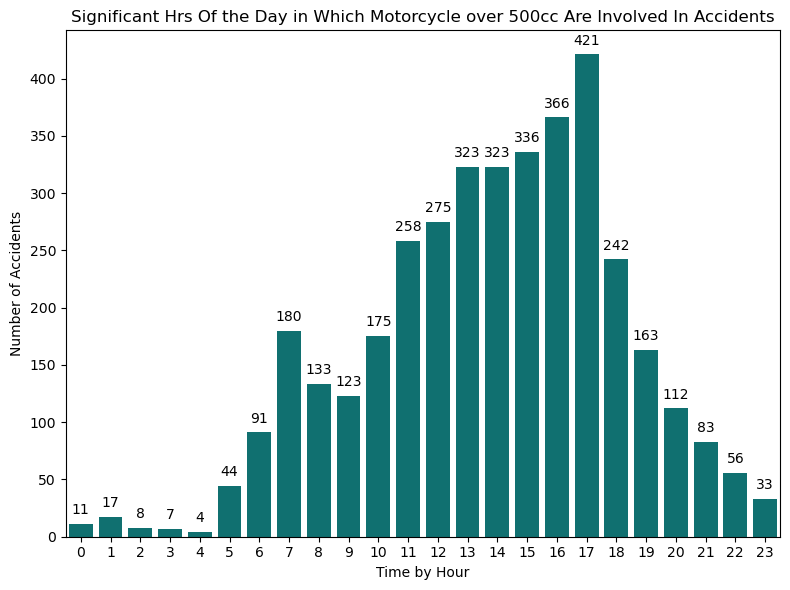

In [178]:
# Extract the hour from the timestamp
motorbike_500cc_accident['hour'] = motorbike_500cc_accident['time'].dt.hour

# Calculate the counts of pedestrian accidents for each hour
hourly_counts = motorbike_500cc_accident['hour'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8,6))
over500 = sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='teal')

# Add the count at the top of the bars
for synchronisere, label in zip(over500.patches, hourly_counts.values):
    over500.annotate(str(label), (synchronisere.get_x() + synchronisere.get_width() / 2., synchronisere.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Label the plot
plt.title('Significant Hrs Of the Day in Which Motorcycle over 500cc Are Involved In Accidents')
plt.xlabel('Time by Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
#display the plot
plt.show()

##  Significant Day Of The Week in Which Motorcycle over 500cc Are Involved In Accidents

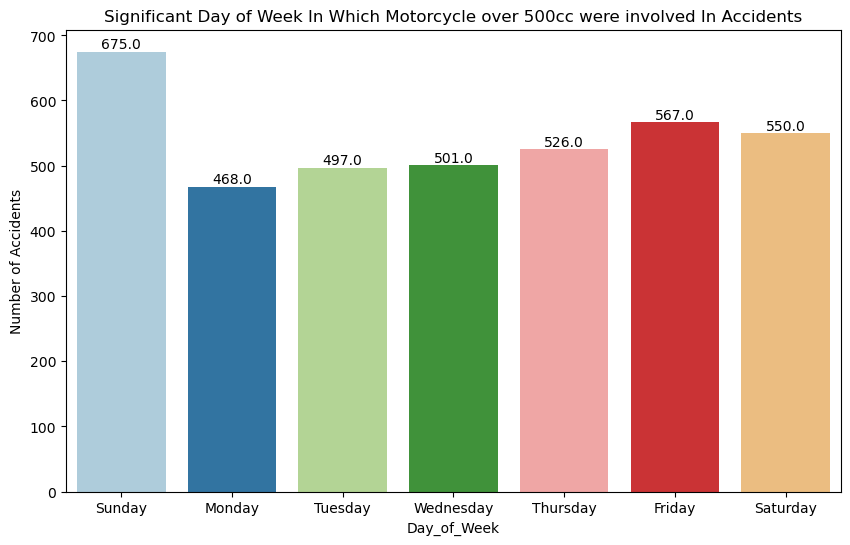

In [179]:
# Significant days in which accident occurs 
motorbike_500cc_accident_Amounts = motorbike_500cc_accident['day_of_week'].value_counts().sort_index()

# Visualize using seaborn
plt.figure(figsize=(10, 6))
sue = sns.countplot(x=motorbike_500cc_accident['day_of_week'], order=motorbike_500cc_accident_Amounts.index, palette='Paired')

# Add the count at the top of each bar
for numbering in sue.patches:
    sue.annotate(f'{numbering.get_height()}', (numbering.get_x() +numbering.get_width() / 2., numbering.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Label the plot
plt.title('Significant Day of Week In Which Motorcycle over 500cc were involved In Accidents')
plt.xlabel('Day_of_Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=0)
# Show the plot
plt.show()

## 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [180]:
# We will first go through the casualty dataframe and filter pedestrians from the casualty class
# Recall,  that according to page 69 of the accident filling form, pedestrian are denoted with code "3" in the casualty class

ped_hours = casualty_table[casualty_table['casualty_class']==3]
ped_hours

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115573          600321  2020991023621           2020          991023621   
115574          600322  2020991023880           2020          991023880   
115578          600326  2020991024526           2020          991024526   
115580          600328  2020991029573           2020          991029573   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115573                  1                   2               3   
115574                  1                   1               3   
115578                  1                   1               3   
115580                  1                   1               3   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115573                2               54                     8   
115574                2               58                     9   
115578                1               69                    10   
115580                2               63                     9   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115573                  2                    8                    1   
115574                  3                    5                    1   
115578                  3                    6                    9   
115580                  3                   10                    1   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115573              0                       0   
115574              0                       0   
115578              0                       0   
115580              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [181]:
ped_hours.head(5)

casualty_index accident_index  accident_year accident_reference  \
0          484748  2020010219808           2020          010219808   
1          484749  2020010220496           2020          010220496   
2          484750  2020010220496           2020          010220496   
3          484751  2020010228005           2020          010228005   
4          484752  2020010228006           2020          010228006   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               3                1   
1                  1                   1               3                2   
2                  1                   2               3                2   
3                  1                   1               3                1   
4                  1                   1               3                1   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               31                     6                  3   
1                2                     1                  3   
2                4                     1                  3   
3               23                     5                  3   
4               47                     8                  2   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    9                    5              0   
1                    1                    1              0   
2                    1                    1              0   
3                    5                    9              0   
4                    4                    1              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              0   
1                       0                                   0              0   
2                       0                                   0              0   
3                       0                                   0              0   
4                       0                                   0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3

We are going to merge the casualty table that is already filtered and the accident table so we can see where accident occur when casualty class is 3. Since accident index is a key in both tables, lets merge the two dataframe using accident index base on the common values in the accident_index column.

In [182]:
# Merge casualty table filtered  with the accident table
ped_accident = pd.merge(ped_hours, accident_table, on = 'accident_index')
ped_accident

casualty_index accident_index  accident_year_x accident_reference_x  \
0              484748  2020010219808             2020            010219808   
1              484749  2020010220496             2020            010220496   
2              484750  2020010220496             2020            010220496   
3              484751  2020010228005             2020            010228005   
4              484752  2020010228006             2020            010228006   
...               ...            ...              ...                  ...   
14745          600321  2020991023621             2020            991023621   
14746          600322  2020991023880             2020            991023880   
14747          600326  2020991024526             2020            991024526   
14748          600328  2020991029573             2020            991029573   
14749          600331  2020991032575             2020            991032575   

       vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                      1                   1               3                1   
1                      1                   1               3                2   
2                      1                   2               3                2   
3                      1                   1               3                1   
4                      1                   1               3                1   
...                  ...                 ...             ...              ...   
14745                  1                   2               3                2   
14746                  1                   1               3                2   
14747                  1                   1               3                1   
14748                  1                   1               3                2   
14749                  1                   1               3                1   

       age_of_casualty  age_band_of_casualty  ...  light_conditions  \
0                   31                     6  ...                 1   
1                    2                     1  ...                 1   
2                    4                     1  ...                 1   
3                   23                     5  ...                 4   
4                   47                     8  ...                 4   
...                ...                   ...  ...               ...   
14745               54                     8  ...                 1   
14746               58                     9  ...                 4   
14747               69                    10  ...                 1   
14748               63                     9  ...                 1   
14749               48                     8  ...                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
1                       1                        1   
2                       1                        1   
3                       1                        2   
4                       1                        1   
...                   ...                      ...   
14745                   9                        2   
14746                   1                        2   
14747                   2                        2   
14748                   1                        1   
14749                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                               0                    0                    1   
1                               0                    0                    1   
2                               0                    0                    1   
3                               0                    0                    1   
4                               0                    0                    1   
...                           ...                  ...                  ...   
14745                           0         

In [183]:
ped_accident.head()

casualty_index accident_index  accident_year_x accident_reference_x  \
0          484748  2020010219808             2020            010219808   
1          484749  2020010220496             2020            010220496   
2          484750  2020010220496             2020            010220496   
3          484751  2020010228005             2020            010228005   
4          484752  2020010228006             2020            010228006   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               3                1   
1                  1                   1               3                2   
2                  1                   2               3                2   
3                  1                   1               3                1   
4                  1                   1               3                1   

   age_of_casualty  age_band_of_casualty  ...  light_conditions  \
0               31                     6  ...                 1   
1                2                     1  ...                 1   
2                4                     1  ...                 1   
3               23                     5  ...                 4   
4               47                     8  ...                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        2                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  hour  \
0                                            3                2     9   
1                                            1                2    13   
2                                            1                2    13   
3                                            1                2     1   
4                                            1                2     1   

   day_names  
0  Wednesday  
1    Tuesday  
2    Tuesday  
3   Thursday  
4   Thursday  

[5 rows x 51 columns]

In [184]:
# Convert to date time format
ped_accident['time'] = pd.to_datetime(ped_accident['time'], format='%H:%M:%S')
ped_accident['time']

0       1900-01-01 09:00:00
1       1900-01-01 13:55:00
2       1900-01-01 13:55:00
3       1900-01-01 01:25:00
4       1900-01-01 01:50:00
                ...        
14745   1900-01-01 10:30:00
14746   1900-01-01 17:00:00
14747   1900-01-01 12:00:00
14748   1900-01-01 15:05:00
14749   1900-01-01 13:50:00
Name: time, Length: 14750, dtype: datetime64[ns]

In [185]:
# check the most significant hour
ped_accident['hour'] = ped_accident['time'].dt.hour
ped_accident['hour']

0         9
1        13
2        13
3         1
4         1
         ..
14745    10
14746    17
14747    12
14748    15
14749    13
Name: hour, Length: 14750, dtype: int32

In [186]:
# Convert the hour in which pedestrian accidents occur to datetime
ped_accident['hour'] = pd.to_datetime(ped_accident['time'], format='%H:%M').dt.time
ped_accident['hour']

0        09:00:00
1        13:55:00
2        13:55:00
3        01:25:00
4        01:50:00
           ...   
14745    10:30:00
14746    17:00:00
14747    12:00:00
14748    15:05:00
14749    13:50:00
Name: hour, Length: 14750, dtype: object

In [187]:
# Group the accident dataframe by hour, count occurrences, and sort by count in descending order
hour = ped_accident['time'].dt.time.value_counts().sort_values(ascending=False)

# Display
print(hour)

time
15:30:00    188
15:00:00    164
16:00:00    153
18:00:00    152
17:00:00    150
           ... 
21:56:00      1
23:01:00      1
09:28:00      1
02:41:00      1
06:09:00      1
Name: count, Length: 1264, dtype: int64


## Visualise the significant hours of the day in which pedestrians are involved in accidents

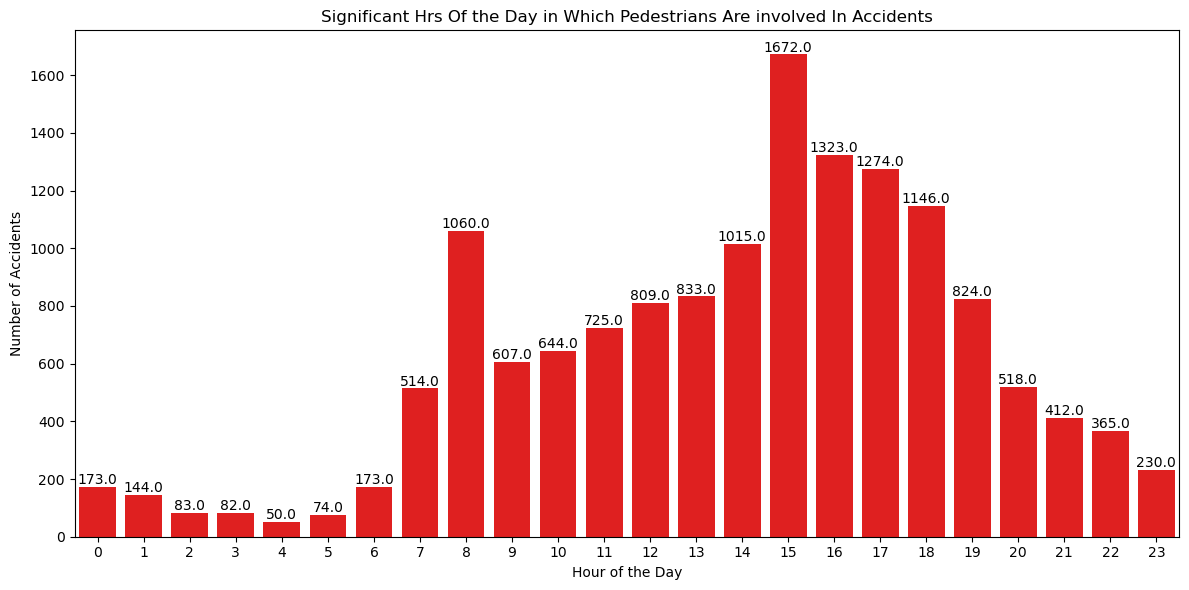

In [188]:
# Extract the hour from the timestamp
ped_accident['hour'] = ped_accident['time'].dt.hour

# Calculate the counts of pedestrian accidents for each hour
hourly_counts = ped_accident['hour'].value_counts().sort_index()

#Create a bar plot
plt.figure(figsize=(12,6))
sue= sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='red')

# Add the count at the top of each bar
for numbering in sue.patches:
    sue.annotate(f'{numbering.get_height()}', (numbering.get_x() +numbering.get_width() / 2., numbering.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Label the plot
plt.title('Significant Hrs Of the Day in Which Pedestrians Are involved In Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
# Show the plot
plt.show()

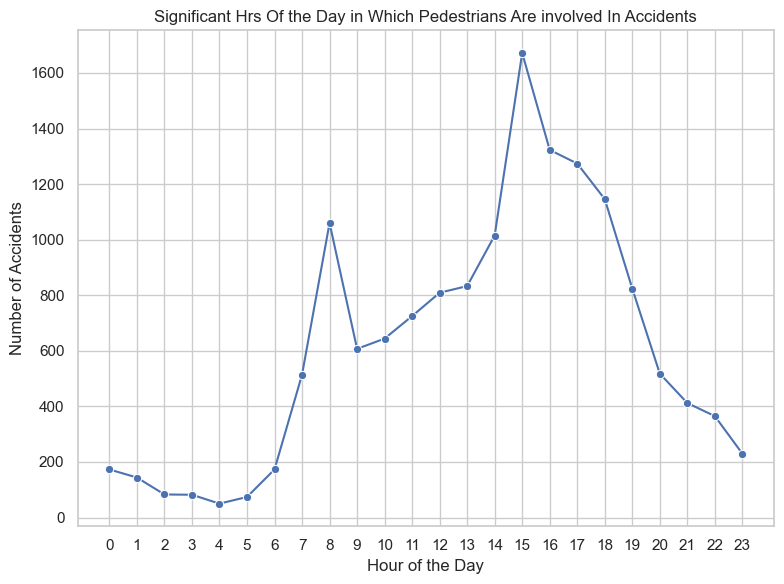

In [189]:
# Determine the style of seaborn to ensure well interpreted visualization
sns.set(style="whitegrid")

# Use seaborn (line plot) to visualise a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=ped_accident['hour'].value_counts().sort_index(), marker='o') # add marker for easy interpretation

# Label the plot
plt.title('Significant Hrs Of the Day in Which Pedestrians Are involved In Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.tight_layout()

# Show the plot
plt.show() 

## Significant Days Of the Week in Which Pedestrians Are involved In Accidents



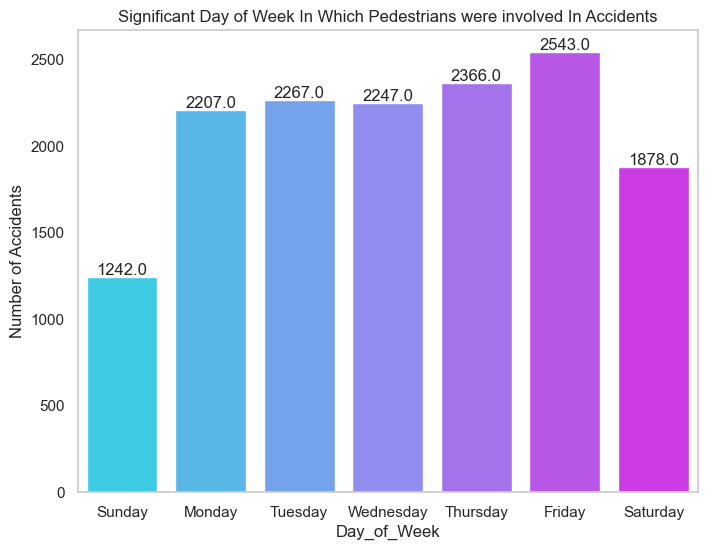

In [190]:
# Significant  days of the week pedestrians are involved in accident 
ped_Amounts = ped_accident['day_of_week'].value_counts().sort_index()

# Visualize using seaborn
plt.figure(figsize=(8, 6))
sue = sns.countplot(x=ped_accident['day_of_week'], order=ped_Amounts.index, palette='cool')

# Add the count at the top of each bar
for numbers in sue.patches:
    sue.annotate(f'{numbers.get_height()}', (numbers.get_x() +numbers.get_width() / 2., numbers.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
#label the plot
plt.title('Significant Day of Week In Which Pedestrians were involved In Accidents')
plt.xlabel('Day_of_Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=0)
plt.grid(False)
# Show the plot
plt.show()

# Examination of the number of casualities determined by speed limit

In [191]:
accident_table.groupby('speed_limit')['number_of_casualties'].mean()

speed_limit
20    1.124743
30    1.216674
40    1.363544
50    1.439714
60    1.427332
70    1.483465
Name: number_of_casualties, dtype: float64

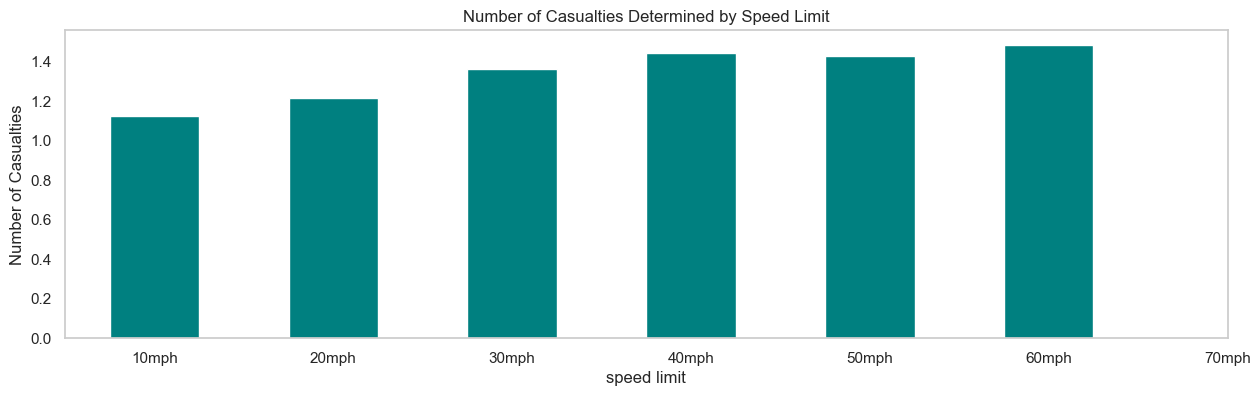

In [192]:
accident_table.groupby('speed_limit')['number_of_casualties'].mean().plot(kind='bar', color='teal', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(7), 
           ['10mph', '20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], 
           rotation='horizontal')

plt.xlabel('speed limit'),
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties Determined by Speed Limit')
plt.show()

## Examination of the Purpose of the Driver when the accidents Occur

In [193]:
vehicle_table['journey_purpose_of_driver'].unique()

array([6, 2, 1, 3, 4, 5], dtype=int64)

In [194]:
# Count the occurrences of each journey purpose of driver
journey_occur = vehicle_table['journey_purpose_of_driver'].value_counts()
journey_occur

journey_purpose_of_driver
6    99335
5    26104
1    22408
2    17309
3     1625
4      594
Name: count, dtype: int64

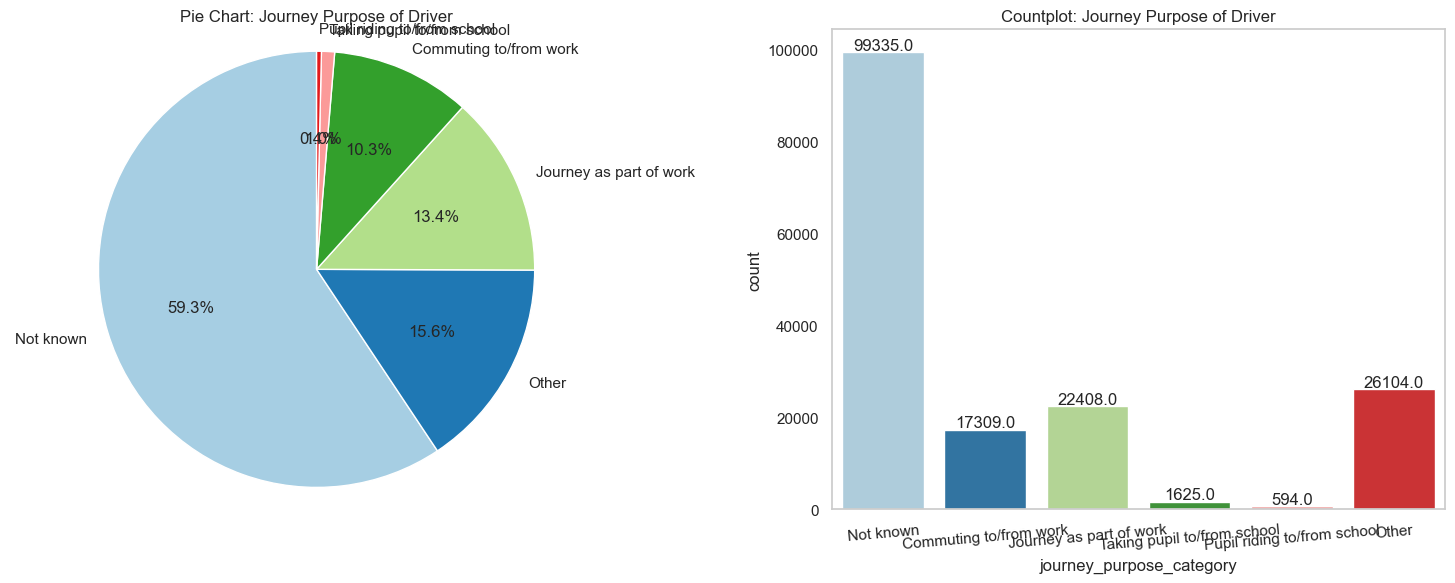

In [195]:
journey_purpose_mapping = {
    1: 'Journey as part of work',
    2: 'Commuting to/from work',
    3: 'Taking pupil to/from school',
    4: 'Pupil riding to/from school',
    5: 'Other',
    6: 'Not known'
}

# Replace numeric values with categories using the mapping
vehicle_table['journey_purpose_category'] = vehicle_table['journey_purpose_of_driver'].map(journey_purpose_mapping)

#Create a subplot with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create a pie chart
journey_occur = vehicle_table['journey_purpose_category'].value_counts()
ax1.pie(journey_occur, labels=journey_occur.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)
ax1.axis('equal')
ax1.set_title('Pie Chart: Journey Purpose of Driver')

# Create a countplot with counts at the top of the bars
sns.countplot(data=vehicle_table, x='journey_purpose_category', ax=ax2, palette='Paired')
ax2.set_title('Countplot: Journey Purpose of Driver')

#display counts at the top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=5)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
#show the plot
plt.show()

## Reasons for Accident

Based on the given information of the stats form,the greatest cause of accident is 18 which is going ahead of other.

Recall, that it was filled as following 
"Reversing": 1, "Parked": 2, "Waiting to go ahead but held up": 3, "Slowing or stopping": 4, "Moving off": 5, "U turn": 6, "Turning left": 7, "Waiting to turn left" :8, "Turning right": 9, " Waiting to turn right": 10, "Changing lane to left" :11, "Changing lane to right": 12, "O’taking moving veh on its offside": 13, "O’taking stationary veh on its offside": 14, "Overtaking on nearside" :15, "Going ahead left hand bend":16, "Going ahead right hand bend": 17, "Going ahead other": 18

In [196]:
vehicle_table["vehicle_manoeuvre"].unique()

array([ 5,  4, 18,  3,  2, 99, 11,  1, 17,  9, 14, 13,  7, 15,  6, 16, 10,
        8, 12, -1], dtype=int64)

In [197]:
vehicle_table["vehicle_manoeuvre"].value_counts()

vehicle_manoeuvre
 18    78191
 9     14799
 99    12845
 4      9040
 5      7467
 2      7422
 3      6872
 7      5568
 17     5459
 16     4740
 13     3097
 10     2194
 1      2091
 14     1409
 12     1262
 6      1199
 11     1165
 15     1140
 8       736
-1       679
Name: count, dtype: int64

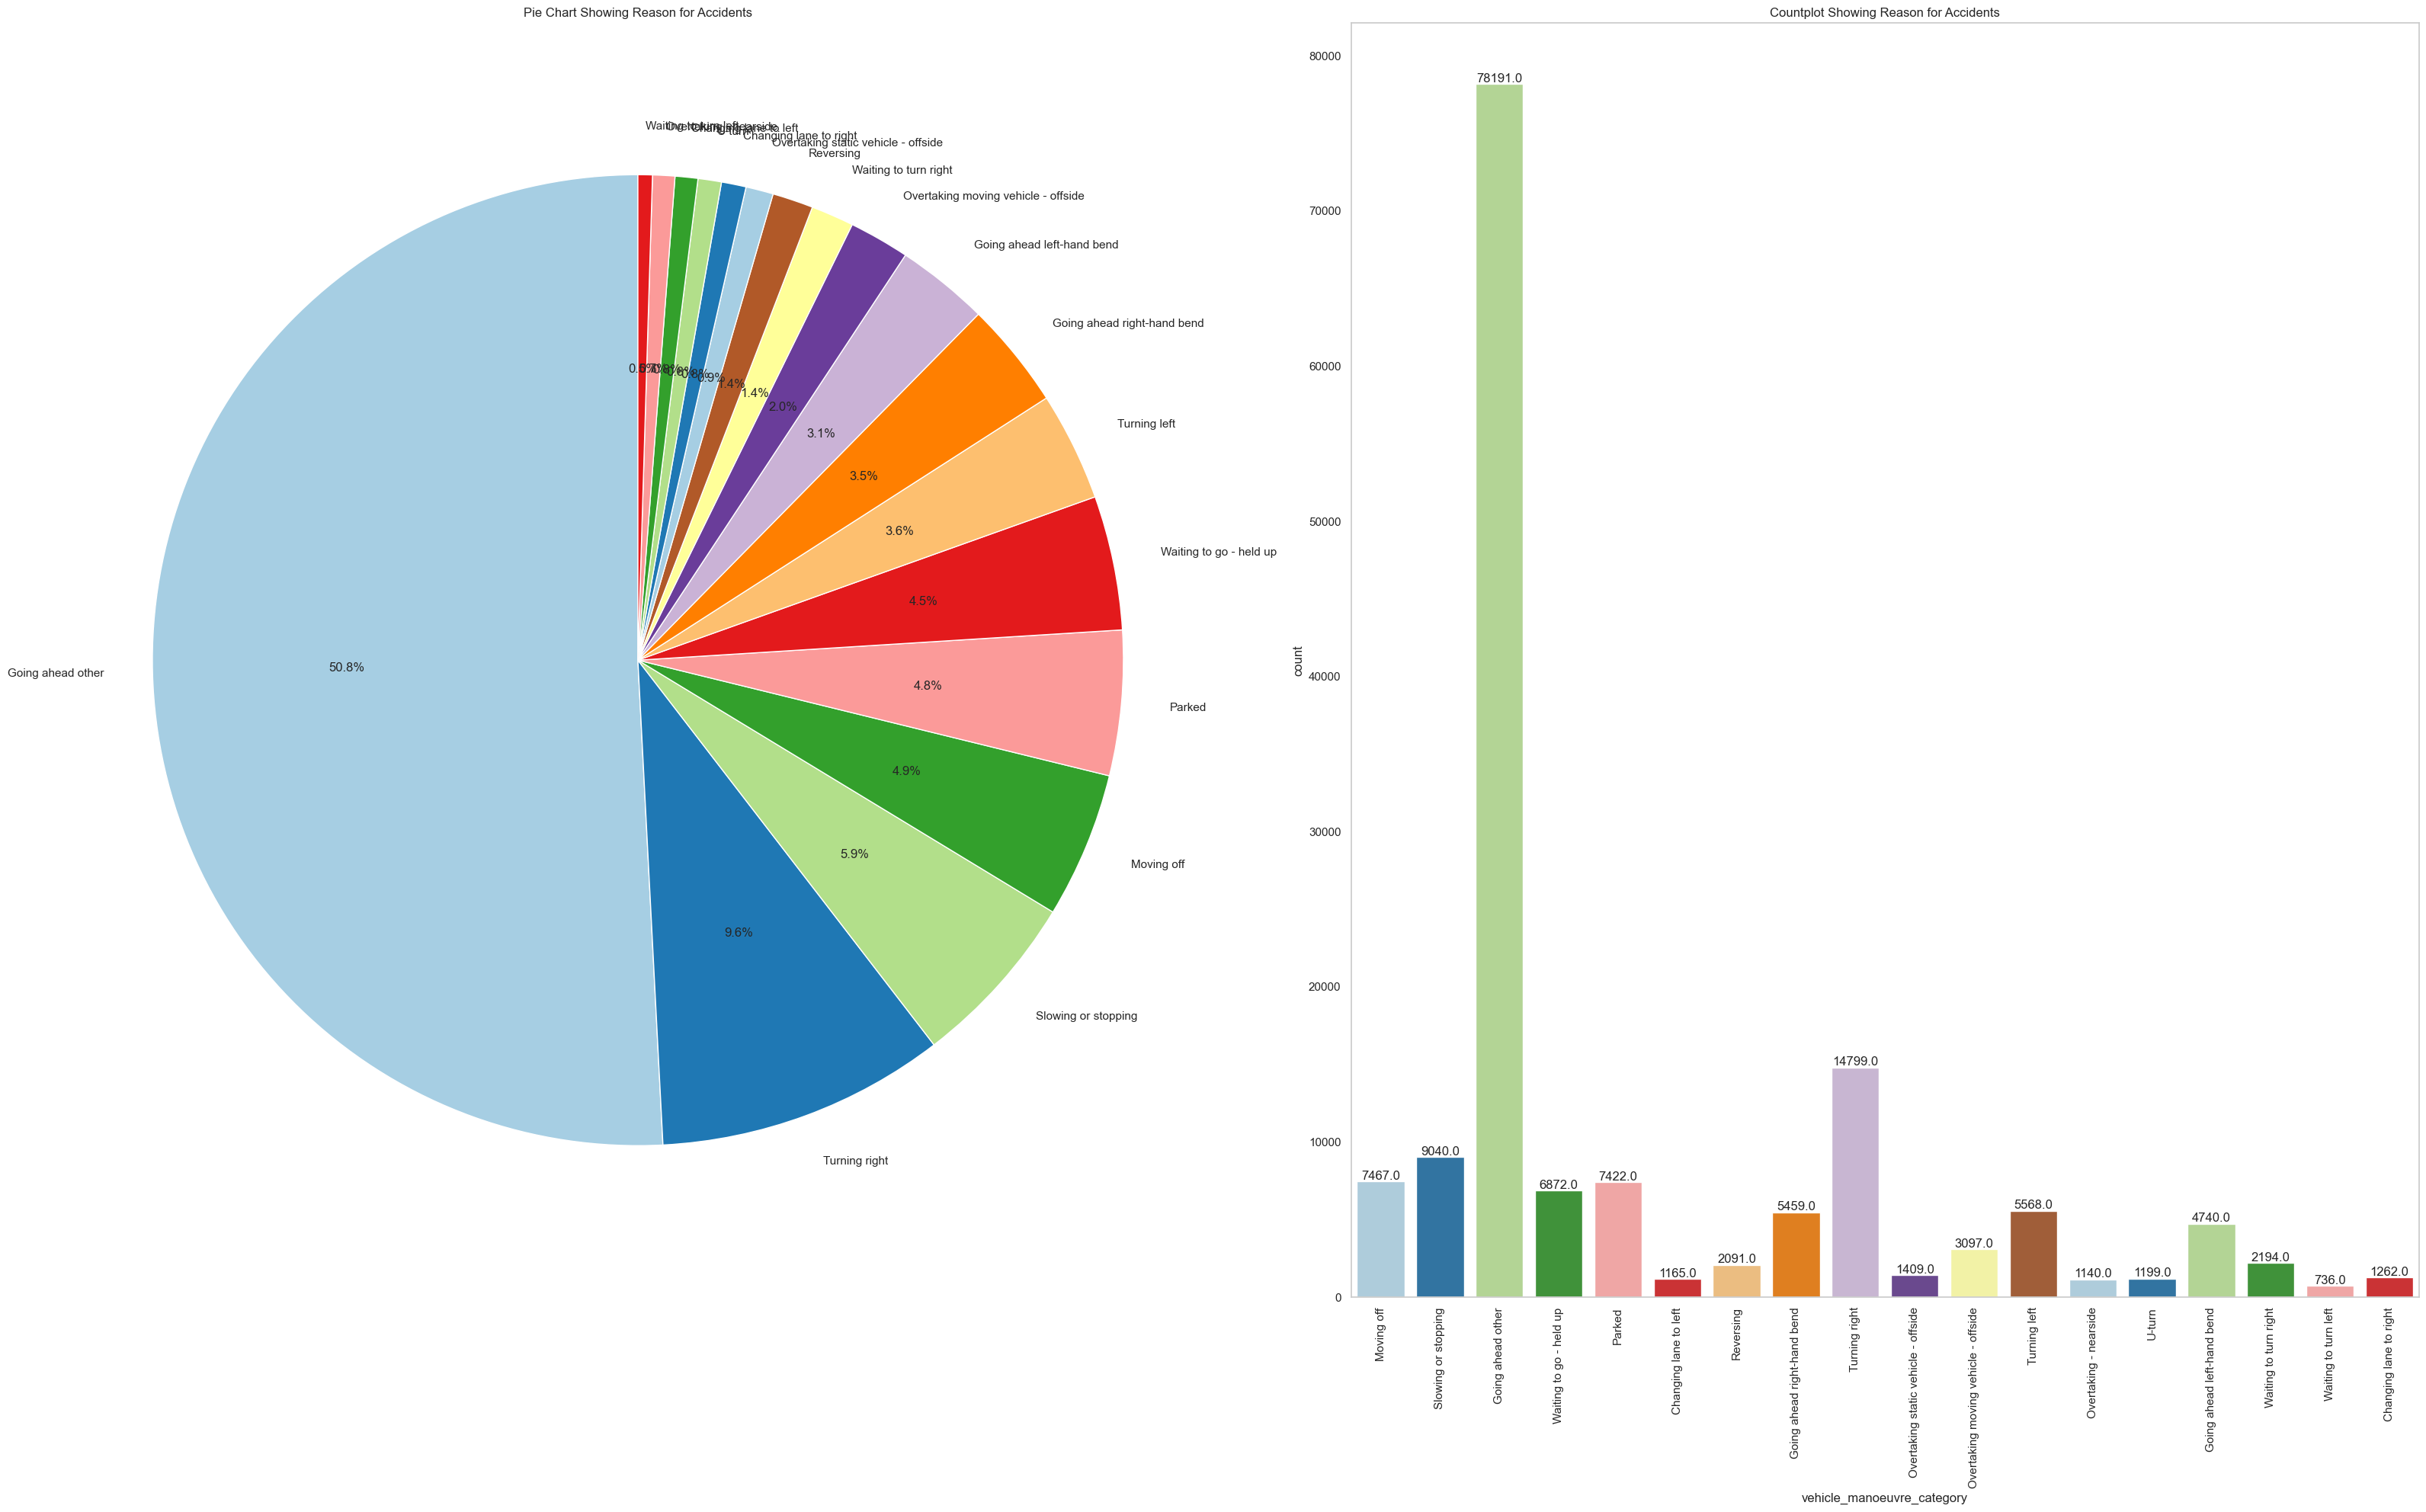

In [198]:
# Mapping of numeric values to categories for vehicle manoeuvres
vehicle_manoeuvre_mapping = {
    1: 'Reversing',
    2: 'Parked',
    3: 'Waiting to go - held up',
    4: 'Slowing or stopping',
    5: 'Moving off',
    6: 'U-turn',
    7: 'Turning left',
    8: 'Waiting to turn left',
    9: 'Turning right',
    10: 'Waiting to turn right',
    11: 'Changing lane to left',
    12: 'Changing lane to right',
    13: 'Overtaking moving vehicle - offside',
    14: 'Overtaking static vehicle - offside',
    15: 'Overtaking - nearside',
    16: 'Going ahead left-hand bend',
    17: 'Going ahead right-hand bend',
    18: 'Going ahead other',
    19: 'Changing lane other',
    20: 'Data missing or out of range',
    21: 'Reversing of Overtaking',
}

# Replace numeric values with categories using the mapping
vehicle_table['vehicle_manoeuvre_category'] = vehicle_table['vehicle_manoeuvre'].map(vehicle_manoeuvre_mapping)

# Create a subplot with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 20))

# Piechart
manoeuvre_occur = vehicle_table['vehicle_manoeuvre_category'].value_counts()
ax1.pie(manoeuvre_occur, labels=manoeuvre_occur.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)
ax1.axis('equal')
ax1.set_title('Pie Chart Showing Reason for Accidents')

#  Countplot using seaborn 
sns.countplot(data=vehicle_table, x='vehicle_manoeuvre_category', ax=ax2, palette='Paired')
ax2.set_title('Countplot Showing Reason for Accidents')

# Show the counts at the top of each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)  #rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
#show the plot
plt.show()


In [199]:
vehicle_table['vehicle_manoeuvre_category'].value_counts()

vehicle_manoeuvre_category
Going ahead other                      78191
Turning right                          14799
Slowing or stopping                     9040
Moving off                              7467
Parked                                  7422
Waiting to go - held up                 6872
Turning left                            5568
Going ahead right-hand bend             5459
Going ahead left-hand bend              4740
Overtaking moving vehicle - offside     3097
Waiting to turn right                   2194
Reversing                               2091
Overtaking static vehicle - offside     1409
Changing lane to right                  1262
U-turn                                  1199
Changing lane to left                   1165
Overtaking - nearside                   1140
Waiting to turn left                     736
Name: count, dtype: int64

## Weather conditions

In [200]:
accident_table['weather_conditions'].value_counts()

weather_conditions
1    70729
2    11583
8     2629
9     2424
5     1665
4     1401
7      510
3      185
6       73
Name: count, dtype: int64

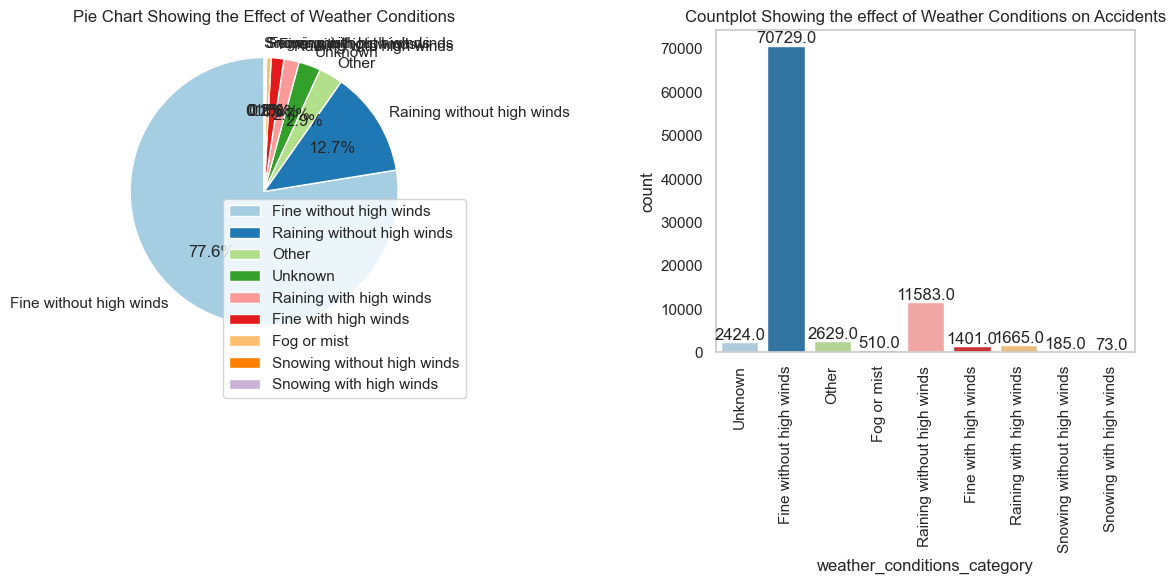

In [201]:
# mapping of numeric values
weather_conditions_mapping = {
    1: 'Fine without high winds',
    2: 'Raining without high winds',
    3: 'Snowing without high winds',
    4: 'Fine with high winds',
    5: 'Raining with high winds',
    6: 'Snowing with high winds',
    7: 'Fog or mist',
    8: 'Other',
    9: 'Unknown'
}

# Replace numeric values with categories using the mapping
accident_table['weather_conditions_category'] = accident_table['weather_conditions'].map(weather_conditions_mapping)

# Create a subplot with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart
weather_occur = accident_table['weather_conditions_category'].value_counts()
ax1.pie(weather_occur, labels=weather_occur.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)
ax1.axis('equal')
ax1.set_title('Pie Chart Showing the Effect of Weather Conditions')
ax1.legend(loc='upper right', bbox_to_anchor=(1, .5))

# Create a countplot with counts at the top of the bars
sns.countplot(data=accident_table, x='weather_conditions_category', ax=ax2, palette='Paired')
ax2.set_title('Countplot Showing the effect of Weather Conditions on Accidents')

# Display counts at the top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)  #rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
#show the plot
plt.show()


## Road Type

CODES 1. Roundabout 2. One way street 3. Dual carriageway 6. Single carriageway 7. Slip Road 9. Unknown

Code 9 'Unknown' should only be used in exceptional circumstances where no information on road type is available, or where the other Road Type codes are inappropriate. J. If 1.15 (Speed Limit) is coded 70, 1.14 must not be coded 2 or 6. 22

In [202]:
accident_table["road_type"].unique() 

array([6, 2, 3, 7, 1, 9], dtype=int64)

In [203]:
#check where speed limit is coded 70 and road type column is coded 2 or 6.22
accident_table[(accident_table["speed_limit"] == 70) & ((accident_table["road_type"] == 2) | (accident_table["road_type"] == 6))]

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, road_type, speed_limit, junction_detail, junction_control, second_road_class, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, hour, day_names, weather_conditions_category]
Index: []

[0 rows x 34 columns]

In [204]:
accident_table["road_type"].value_counts() 

road_type
6    66929
3    13206
1     5580
9     2006
2     1966
7     1512
Name: count, dtype: int64

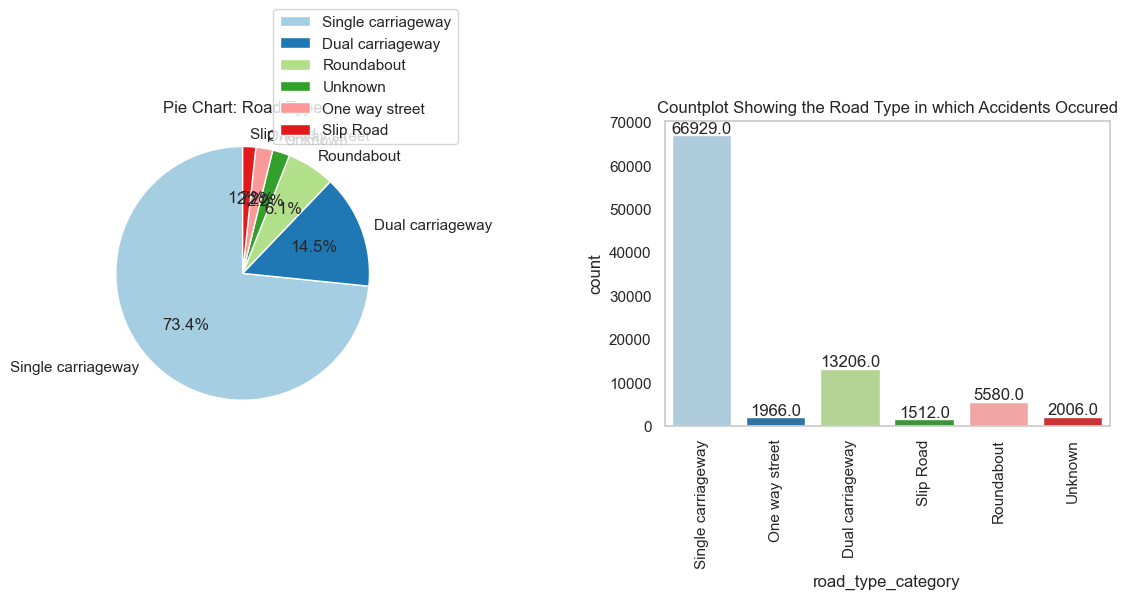

In [205]:
road_type_mapping = {
    1: 'Roundabout',
    2: 'One way street',
    3: 'Dual carriageway',
    6: 'Single carriageway',
    7: 'Slip Road',
    9: 'Unknown'
}

# Use mapping to replace numeric values with categories
accident_table['road_type_category'] = accident_table['road_type'].map(road_type_mapping)

# Create a subplot with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot 1: pie chart
road_type_occur = accident_table['road_type_category'].value_counts()
ax1.pie(road_type_occur, labels=road_type_occur.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)
ax1.axis('equal')
ax1.set_title('Pie Chart: Road Type')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.9))  # Adjust the legend position

# Plot 2:countplot
sns.countplot(data=accident_table, x='road_type_category', ax=ax2, palette='Paired')
ax2.set_title('Countplot Showing the Road Type in which Accidents Occured')

# Display the counts at the top of each bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
#display the plot
plt.show()


## Road Surface Condition

This refers to the road surface condition at the time of the accident. CODES

1. Frost/Ice

2. Snow

3. Dry

4. Flood (surface water over 3cm deep

5. Wet/Damp

In [206]:
 accident_table["road_surface_conditions"].unique() 

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [207]:
accident_table["road_surface_conditions"].value_counts() 

road_surface_conditions
 1    62698
 2    26240
 9      847
 4      764
-1      316
 5      184
 3      150
Name: count, dtype: int64

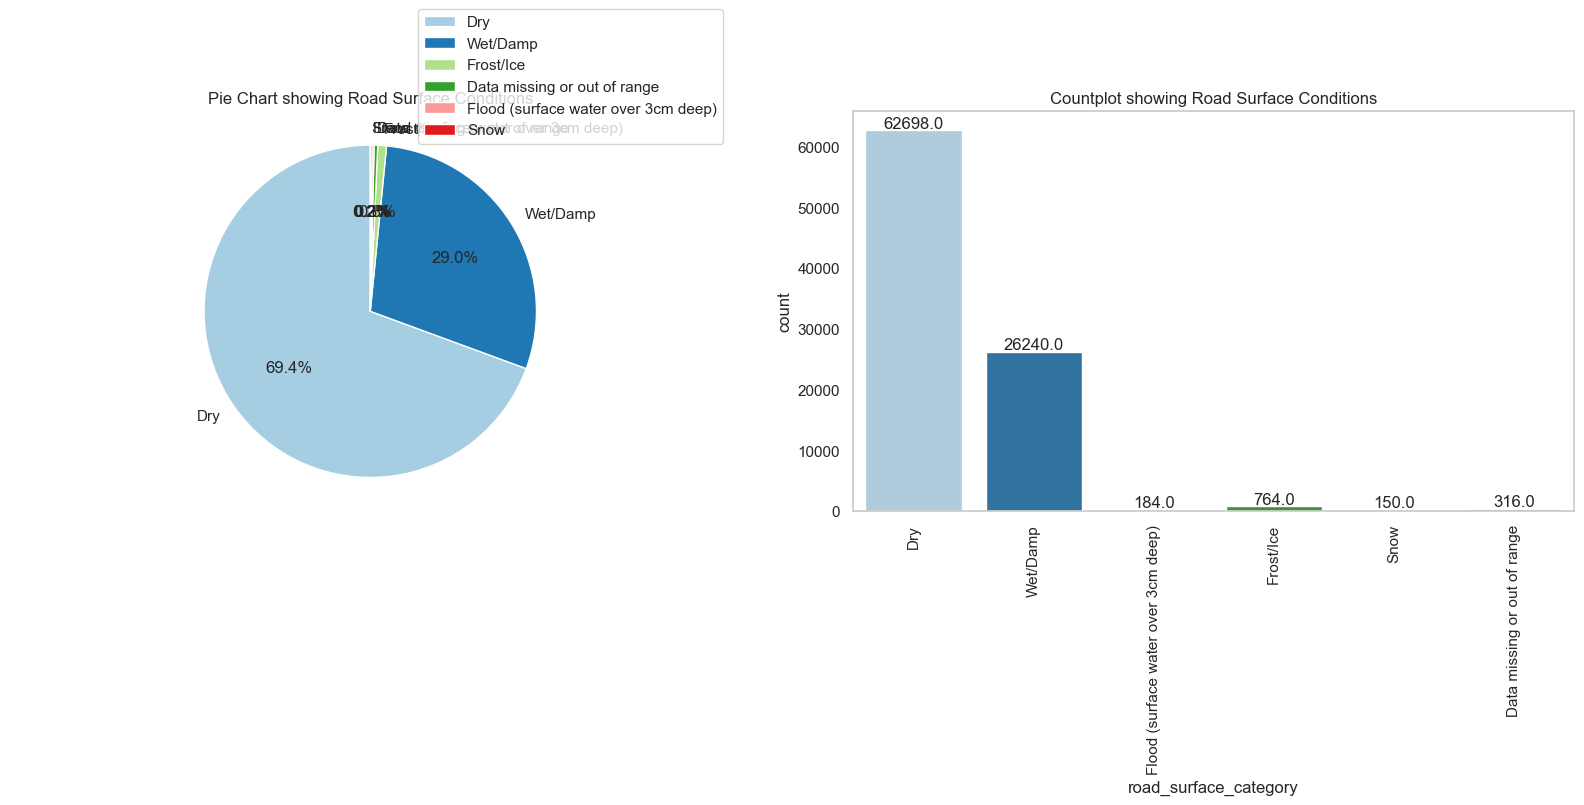

In [208]:
road_surface_mapping = {
    1: 'Dry',
    2: 'Wet/Damp',
    3: 'Snow',
    4: 'Frost/Ice',
    5: 'Flood (surface water over 3cm deep)',
    -1: 'Data missing or out of range'
}

# Use mapping to replace numeric values with categories
accident_table['road_surface_category'] = accident_table['road_surface_conditions'].map(road_surface_mapping)

# Create a subplot with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1:pie chart
road_surface_occur = accident_table['road_surface_category'].value_counts()

ax1.pie(road_surface_occur, labels=road_surface_occur.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax1.axis('equal')
ax1.set_title('Pie Chart showing Road Surface Conditions')
# Adjust the position of the legend
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.9))

# Plot 2:countplot
sns.countplot(data=accident_table, x='road_surface_category', ax=ax2, palette='Paired')
ax2.set_title('Countplot showing Road Surface Conditions')

# Display the counts at the top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)  
plt.tight_layout()
plt.grid(False)
#show the plot
plt.show()


## 4. Using the apriori algorithm, explore the impact of selected variables on accident severity

 We are going to merge some of the tables that has columns which can impact accident severity.



In [209]:
# Merge accident and vehicle table
merge_table = pd.merge(accident_table, vehicle_table, on='accident_index')

In [210]:
merge_table

accident_index  accident_year_x accident_reference_x  longitude  \
0       2020010219808             2020            010219808  -0.254001   
1       2020010220496             2020            010220496  -0.139253   
2       2020010228005             2020            010228005  -0.178719   
3       2020010228006             2020            010228006  -0.001683   
4       2020010228011             2020            010228011  -0.137592   
...               ...              ...                  ...        ...   
167370  2020991030297             2020            991030297  -2.271903   
167371  2020991030297             2020            991030297  -2.271903   
167372  2020991030900             2020            991030900  -3.968753   
167373  2020991030900             2020            991030900  -3.968753   
167374  2020991032575             2020            991032575  -4.561040   

         latitude  police_force  accident_severity  number_of_vehicles  \
0       51.462262             1                  3                   1   
1       51.470327             1                  3                   1   
2       51.529614             1                  3                   1   
3       51.541210             1                  2                   1   
4       51.515704             1                  3                   1   
...           ...           ...                ...                 ...   
167370  57.186317            99                  2                   2   
167371  57.186317            99                  2                   2   
167372  55.950940            99                  3                   2   
167373  55.950940            99                  3                   2   
167374  56.003843            99                  3                   1   

        number_of_casualties       date  ...  age_band_of_driver  \
0                          1 2020-02-04  ...                   6   
1                          2 2020-04-27  ...                   7   
2                          1 2020-01-01  ...                  -1   
3                          1 2020-01-01  ...                   7   
4                          2 2020-01-01  ...                   4   
...                      ...        ...  ...                 ...   
167370                     1 2020-04-15  ...                   9   
167371                     1 2020-04-15  ...                   7   
167372                     1 2020-12-15  ...                  10   
167373                     1 2020-12-15  ...                  11   
167374                     1 2020-08-25  ...                   7   

       engine_capacity_cc  propulsion_code age_of_vehicle  generic_make_model  \
0                    1968                2              6             AUDI Q5   
1                    1395                1              2             AUDI A1   
2                      -1               -1              5                  -1   
3                    1798                8              8        TOYOTA PRIUS   
4                    2993                2              4        BMW 4 SERIES   
...                   ...              ...            ...                 ...   
167370               1968                2              2             AUDI A5   
167371               1301                1              2  KTM 1290 SUPERDUKE   
167372               1995                2              1              BMW X3   
167373                 -1               -1              5                  -1   
167374                999                1              2          FORD FOCUS   

        driver_imd_decile  driver_home_area_type  Age_Group  \
0                       4                      1      31-35   
1                       7                      1      41-45   
2                      -1                     -1      31-35   
3                       2                      1      41-45   
4                      -1                     -1      16-20   
...                   ...                    ...        ...  

In [211]:
# lets merge the merged accident and vehicle dataframe with casualty DataFrame
merged_table = pd.merge(merge_table, casualty_table, on='accident_index')

In [212]:
merged_table

accident_index  accident_year_x accident_reference_x  longitude  \
0       2020010219808             2020            010219808  -0.254001   
1       2020010220496             2020            010220496  -0.139253   
2       2020010220496             2020            010220496  -0.139253   
3       2020010228005             2020            010228005  -0.178719   
4       2020010228006             2020            010228006  -0.001683   
...               ...              ...                  ...        ...   
220430  2020991030297             2020            991030297  -2.271903   
220431  2020991030297             2020            991030297  -2.271903   
220432  2020991030900             2020            991030900  -3.968753   
220433  2020991030900             2020            991030900  -3.968753   
220434  2020991032575             2020            991032575  -4.561040   

         latitude  police_force  accident_severity  number_of_vehicles  \
0       51.462262             1                  3                   1   
1       51.470327             1                  3                   1   
2       51.470327             1                  3                   1   
3       51.529614             1                  3                   1   
4       51.541210             1                  2                   1   
...           ...           ...                ...                 ...   
220430  57.186317            99                  2                   2   
220431  57.186317            99                  2                   2   
220432  55.950940            99                  3                   2   
220433  55.950940            99                  3                   2   
220434  56.003843            99                  3                   1   

        number_of_casualties       date  ...  age_band_of_casualty  \
0                          1 2020-02-04  ...                     6   
1                          2 2020-04-27  ...                     1   
2                          2 2020-04-27  ...                     1   
3                          1 2020-01-01  ...                     5   
4                          1 2020-01-01  ...                     8   
...                      ...        ...  ...                   ...   
220430                     1 2020-04-15  ...                     7   
220431                     1 2020-04-15  ...                     7   
220432                     1 2020-12-15  ...                    11   
220433                     1 2020-12-15  ...                    11   
220434                     1 2020-08-25  ...                     8   

       casualty_severity  pedestrian_location pedestrian_movement  \
0                      3                    9                   5   
1                      3                    1                   1   
2                      3                    1                   1   
3                      3                    5                   9   
4                      2                    4                   1   
...                  ...                  ...                 ...   
220430                 2                    0                   0   
220431                 2                    0                   0   
220432                 3                    0                   0   
220433                 3                    0                   0   
220434                 3                    9                   9   

       car_passenger  bus_or_coach_passenger  \
0                  0                       0   
1                  0                       0   
2                  0                       0   
3                  0                       0   
4                  0                       0   
...              ...                     ...   
220430             0                       0   
220431             0                       0   
220432             0                       0   
220433             0                       0   
220434             0           

In [213]:
merged_table.describe()

accident_year_x      longitude       latitude   police_force  \
count         220435.0  220435.000000  220435.000000  220435.000000   
mean            2020.0      -1.204227      52.364891      27.989779   
min             2020.0      -7.497375      49.970479       1.000000   
25%             2020.0      -2.120397      51.457792       5.000000   
50%             2020.0      -1.095489      51.851200      23.000000   
75%             2020.0      -0.127165      53.330744      45.000000   
max             2020.0       1.756257      60.541144      99.000000   
std                0.0       1.367757       1.319483      24.182384   

       accident_severity  number_of_vehicles  number_of_casualties  \
count      220435.000000       220435.000000         220435.000000   
mean            2.758251            2.191127              1.739583   
min             1.000000            1.000000              1.000000   
25%             3.000000            2.000000              1.000000   
50%             3.000000            2.000000              1.000000   
75%             3.000000            2.000000              2.000000   
max             3.000000           13.000000             41.000000   
std             0.470845            0.919870              1.330668   

                                date    day_of_week  local_authority_district  \
count                         220435  220435.000000             220435.000000   
mean   2020-07-06 00:05:54.324857344       4.122884                317.840515   
min              2020-01-01 00:00:00       1.000000                 -1.000000   
25%              2020-03-16 00:00:00       2.000000                 79.000000   
50%              2020-07-22 00:00:00       4.000000                302.000000   
75%              2020-10-05 00:00:00       6.000000                505.000000   
max              2020-12-31 00:00:00       7.000000                941.000000   
std                              NaN       1.944851                249.561589   

       ...  age_band_of_casualty  casualty_severity  pedestrian_location  \
count  ...         220435.000000      220435.000000        220435.000000   
mean   ...              6.343834           2.816418             0.406079   
min    ...             -1.000000           1.000000            -1.000000   
25%    ...              5.000000           3.000000             0.000000   
50%    ...              6.000000           3.000000             0.000000   
75%    ...              8.000000           3.000000             0.000000   
max    ...             11.000000           3.000000            10.000000   
std    ...              2.343499           0.416149             1.623870   

       pedestrian_movement  car_passenger  bus_or_coach_passenger  \
count        220435.000000  220435.000000           220435.000000   
mean              0.331390       0.235657                0.031265   
min              -1.000000      -1.000000               -1.000000   
25%               0.000000       0.000000                0.000000   
50%               0.000000       0.000000                0.000000   
75%               0.000000       0.000000                0.000000   
max               9.000000       9.000000                9.000000   
std               1.481179       0.609665                0.345653   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       220435.000000  220435.000000   
mean                             0.007277       7.877914   
min                             -1.000000       0.000000   
25%                              0.000000       3.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   
std                              0.124528       9.835718   

       casualty_home_area_type  casualty_imd_decile  
count            220435.000000        220435.000000  
mean                  1.078903             4.38738

In [214]:
# Let's drop the columns that will not impact accident severity such as longitude and latitude
new_tables_merged =merged_table.drop(columns=['longitude', 'latitude', 'police_force'])
new_tables_merged

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010220496             2020            010220496   
3       2020010228005             2020            010228005   
4       2020010228006             2020            010228006   
...               ...              ...                  ...   
220430  2020991030297             2020            991030297   
220431  2020991030297             2020            991030297   
220432  2020991030900             2020            991030900   
220433  2020991030900             2020            991030900   
220434  2020991032575             2020            991032575   

        accident_severity  number_of_vehicles  number_of_casualties  \
0                       3                   1                     1   
1                       3                   1                     2   
2                       3                   1                     2   
3                       3                   1                     1   
4                       2                   1                     1   
...                   ...                 ...                   ...   
220430                  2                   2                     1   
220431                  2                   2                     1   
220432                  3                   2                     1   
220433                  3                   2                     1   
220434                  3                   1                     1   

             date  day_of_week      time  local_authority_district  ...  \
0      2020-02-04            3  09:00:00                        10  ...   
1      2020-04-27            2  13:55:00                         9  ...   
2      2020-04-27            2  13:55:00                         9  ...   
3      2020-01-01            4  01:25:00                         1  ...   
4      2020-01-01            4  01:50:00                        17  ...   
...           ...          ...       ...                       ...  ...   
220430 2020-04-15            4  12:42:00                       910  ...   
220431 2020-04-15            4  12:42:00                       910  ...   
220432 2020-12-15            3  14:00:00                       932  ...   
220433 2020-12-15            3  14:00:00                       932  ...   
220434 2020-08-25            3  13:50:00                       916  ...   

       age_band_of_casualty casualty_severity  pedestrian_location  \
0                         6                 3                    9   
1                         1                 3                    1   
2                         1                 3                    1   
3                         5                 3                    5   
4                         8                 2                    4   
...                     ...               ...                  ...   
220430                    7                 2                    0   
220431                    7                 2                    0   
220432                   11                 3                    0   
220433                   11                 3                    0   
220434                    8                 3                    9   

        pedestrian_movement  car_passenger  bus_or_coach_passenger  \
0                         5              0                       0   
1                         1              0                       0   
2                         1              0                       0   
3                         9              0                       0   
4                         1              0                       0   
...                     ...            ...                     ...   
220430                    0              0                       0   
220431                    0              0                       0   
220432                   

## Transformation of Data using One Hot Encoding

We are goint to use one hot encoding to alter the categorical column to a new set of binary columns. Each new column, represents a selected variable and each row indicates an accident. This binary matrix, marks it has '1' if the variable is applicable to an accident otherwise, it is marked as '0'.

In [215]:
accident_severity = pd.get_dummies(accident_table.accident_severity, prefix = 'severity')
accident_severity

severity_1  severity_2  severity_3
0           False       False        True
1           False       False        True
2           False       False        True
3           False        True       False
4           False       False        True
...           ...         ...         ...
91194       False        True       False
91195       False       False        True
91196       False        True       False
91197       False       False        True
91198       False       False        True

[91199 rows x 3 columns]

In [216]:
accident_severity.head(5)

severity_1  severity_2  severity_3
0       False       False        True
1       False       False        True
2       False       False        True
3       False        True       False
4       False       False        True

In [217]:
accident_severity.shape

(91199, 3)

In [218]:
#1: speed_limit
accident_speed_limit = pd.get_dummies(accident_table.speed_limit, prefix = 'speed_limit')
accident_speed_limit

speed_limit_20  speed_limit_30  speed_limit_40  speed_limit_50  \
0                True           False           False           False   
1                True           False           False           False   
2               False            True           False           False   
3               False            True           False           False   
4               False            True           False           False   
...               ...             ...             ...             ...   
91194           False            True           False           False   
91195           False            True           False           False   
91196           False           False           False           False   
91197           False            True           False           False   
91198           False            True           False           False   

       speed_limit_60  speed_limit_70  
0               False           False  
1               False           False  
2               False           False  
3               False           False  
4               False           False  
...               ...             ...  
91194           False           False  
91195           False           False  
91196            True           False  
91197           False           False  
91198           False           False  

[91199 rows x 6 columns]

In [219]:
# 2: Road type
accident_road_type = pd.get_dummies(accident_table.road_type, prefix = 'accident_road_type')
accident_road_type

accident_road_type_1  accident_road_type_2  accident_road_type_3  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
91194                 False                 False                 False   
91195                 False                 False                 False   
91196                 False                 False                 False   
91197                 False                 False                 False   
91198                 False                 False                 False   

       accident_road_type_6  accident_road_type_7  accident_road_type_9  
0                      True                 False                 False  
1                      True                 False                 False  
2                      True                 False                 False  
3                      True                 False                 False  
4                      True                 False                 False  
...                     ...                   ...                   ...  
91194                  True                 False                 False  
91195                 False                 False                  True  
91196                  True                 False                 False  
91197                  True                 False                 False  
91198                  True                 False                 False  

[91199 rows x 6 columns]

In [220]:
# 3: Junction_detail
accident_junction_details = pd.get_dummies(accident_table.junction_detail, prefix = 'junction_detail')


In [221]:
# 4:Light_conditions
accident_light_conditions = pd.get_dummies(accident_table.light_conditions, prefix = 'light_conditions')
accident_light_conditions

light_conditions_-1  light_conditions_1  light_conditions_4  \
0                    False                True               False   
1                    False                True               False   
2                    False               False                True   
3                    False               False                True   
4                    False               False                True   
...                    ...                 ...                 ...   
91194                False                True               False   
91195                False                True               False   
91196                False                True               False   
91197                False                True               False   
91198                False                True               False   

       light_conditions_5  light_conditions_6  light_conditions_7  
0                   False               False               False  
1                   False               False               False  
2                   False               False               False  
3                   False               False               False  
4                   False               False               False  
...                   ...                 ...                 ...  
91194               False               False               False  
91195               False               False               False  
91196               False               False               False  
91197               False               False               False  
91198               False               False               False  

[91199 rows x 6 columns]

In [222]:
# 5:road_surface_conditions
accident_road_surface = pd.get_dummies(accident_table.road_surface_conditions, prefix = 'road_surface_conditions')
accident_road_surface

road_surface_conditions_-1  road_surface_conditions_1  \
0                           False                      False   
1                           False                       True   
2                           False                      False   
3                           False                       True   
4                           False                       True   
...                           ...                        ...   
91194                       False                       True   
91195                       False                       True   
91196                       False                       True   
91197                       False                       True   
91198                       False                       True   

       road_surface_conditions_2  road_surface_conditions_3  \
0                          False                      False   
1                          False                      False   
2                           True                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
91194                      False                      False   
91195                      False                      False   
91196                      False                      False   
91197                      False                      False   
91198                      False                      False   

       road_surface_conditions_4  road_surface_conditions_5  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
91194                      False                      False   
91195                      False                      False   
91196                      False                      False   
91197                      False                      False   
91198                      False                      False   

       road_surface_conditions_9  
0                           True  
1                          False  
2                          False  
3                          False  
4                          False  
...                          ...  
91194                      False  
91195                      False  
91196                      False  
91197                      False  
91198                      False  

[91199 rows x 7 columns]

In [223]:
#6: weather conditions
accident_weather = pd.get_dummies(accident_table.weather_conditions, prefix = 'weather')
accident_weather

weather_1  weather_2  weather_3  weather_4  weather_5  weather_6  \
0          False      False      False      False      False      False   
1           True      False      False      False      False      False   
2           True      False      False      False      False      False   
3           True      False      False      False      False      False   
4           True      False      False      False      False      False   
...          ...        ...        ...        ...        ...        ...   
91194       True      False      False      False      False      False   
91195       True      False      False      False      False      False   
91196       True      False      False      False      False      False   
91197       True      False      False      False      False      False   
91198       True      False      False      False      False      False   

       weather_7  weather_8  weather_9  
0          False      False       True  
1          False      False      False  
2          False      False      False  
3          False      False      False  
4          False      False      False  
...          ...        ...        ...  
91194      False      False      False  
91195      False      False      False  
91196      False      False      False  
91197      False      False      False  
91198      False      False      False  

[91199 rows x 9 columns]

In [224]:
#7:pedestrian_crossing_physical_facilities
accident_ped_physical = pd.get_dummies(accident_table.pedestrian_crossing_physical_facilities, prefix = 'pedestrian_crossing_physical_facilities')
accident_ped_physical

pedestrian_crossing_physical_facilities_-1  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   
...                                           ...   
91194                                       False   
91195                                       False   
91196                                       False   
91197                                       False   
91198                                       False   

       pedestrian_crossing_physical_facilities_0  \
0                                          False   
1                                          False   
2                                           True   
3                                          False   
4                                           True   
...                                          ...   
91194                                       True   
91195                                       True   
91196                                       True   
91197                                       True   
91198                                       True   

       pedestrian_crossing_physical_facilities_1  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
91194                                      False   
91195                                      False   
91196                                      False   
91197                                      False   
91198                                      False   

       pedestrian_crossing_physical_facilities_4  \
0                                          False   
1                                           True   
2                                          False   
3                                           True   
4                                          False   
...                                          ...   
91194                                      False   
91195                                      False   
91196                                      False   
91197                                      False   
91198                                      False   

       pedestrian_crossing_physical_facilities_5  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
91194                                      False   
91195                                      False   
91196                                      False   
91197                                      False   
91198                                      False   

       pedestrian_crossing_physical_facilities_7  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
91194                                      False   
91195                                      False   
91196                                      False   
91197                                      False   
91198                                      False   

       pedestrian_crossing_physical_facilities_8  \
0                                          False   
1                                          False   
2                                          False   
3                                    

In [225]:
#8:pedestrian_crossing_human_control
accident_ped_human = pd.get_dummies(accident_table.pedestrian_crossing_human_control, prefix = 'pedestrian_crossing_human_control')
accident_ped_human

pedestrian_crossing_human_control_-1  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
...                                     ...   
91194                                 False   
91195                                 False   
91196                                 False   
91197                                 False   
91198                                 False   

       pedestrian_crossing_human_control_0  \
0                                    False   
1                                     True   
2                                     True   
3                                     True   
4                                     True   
...                                    ...   
91194                                 True   
91195                                 True   
91196                                 True   
91197                                 True   
91198                                 True   

       pedestrian_crossing_human_control_1  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
91194                                False   
91195                                False   
91196                                False   
91197                                False   
91198                                False   

       pedestrian_crossing_human_control_2  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
91194                                False   
91195                                False   
91196                                False   
91197                                False   
91198                                False   

       pedestrian_crossing_human_control_9  
0                                     True  
1                                    False  
2                                    False  
3                                    False  
4                                    False  
...                                    ...  
91194                                False  
91195                                False  
91196                                False  
91197                                False  
91198                                False  

[91199 rows x 5 columns]

In [226]:
#9. urban_or_rural_area
accident_urban_rural = pd.get_dummies(accident_table.urban_or_rural_area, prefix = 'urban_or_rural_area')
accident_urban_rural

urban_or_rural_area_1  urban_or_rural_area_2  urban_or_rural_area_3
0                       True                  False                  False
1                       True                  False                  False
2                       True                  False                  False
3                       True                  False                  False
4                       True                  False                  False
...                      ...                    ...                    ...
91194                   True                  False                  False
91195                   True                  False                  False
91196                  False                   True                  False
91197                   True                  False                  False
91198                   True                  False                  False

[91199 rows x 3 columns]

## CONCATENATING THE DATAFRAMES

In [231]:
accident_encoding = pd.concat([accident_severity, accident_speed_limit,accident_road_type,accident_junction_details,accident_light_conditions,accident_road_surface,accident_weather, accident_ped_physical, accident_ped_human, accident_urban_rural], axis=1)
accident_encoding

severity_1  severity_2  severity_3  speed_limit_20  speed_limit_30  \
0           False       False        True            True           False   
1           False       False        True            True           False   
2           False       False        True           False            True   
3           False        True       False           False            True   
4           False       False        True           False            True   
...           ...         ...         ...             ...             ...   
91194       False        True       False           False            True   
91195       False       False        True           False            True   
91196       False        True       False           False           False   
91197       False       False        True           False            True   
91198       False       False        True           False            True   

       speed_limit_40  speed_limit_50  speed_limit_60  speed_limit_70  \
0               False           False           False           False   
1               False           False           False           False   
2               False           False           False           False   
3               False           False           False           False   
4               False           False           False           False   
...               ...             ...             ...             ...   
91194           False           False           False           False   
91195           False           False           False           False   
91196           False           False            True           False   
91197           False           False           False           False   
91198           False           False           False           False   

       accident_road_type_1  ...  pedestrian_crossing_physical_facilities_8  \
0                     False  ...                                      False   
1                     False  ...                                      False   
2                     False  ...                                      False   
3                     False  ...                                      False   
4                     False  ...                                      False   
...                     ...  ...                                        ...   
91194                 False  ...                                      False   
91195                 False  ...                                      False   
91196                 False  ...                                      False   
91197                 False  ...                                      False   
91198                 False  ...                                      False   

       pedestrian_crossing_physical_facilities_9  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
91194                                      False   
91195                                      False   
91196                                      False   
91197                                      False   
91198                                      False   

       pedestrian_crossing_human_control_-1  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
...                                     ...   
91194                                 False   
91195                                 False   
91196                                 False   
91197                                 False   
91198                                 False   

       pedestrian_crossing_human_control_0  \
0                   

## Setting Parameters and Aplying Apriori

In [228]:
!pip install mlxtend


In [232]:
from mlxtend.frequent_patterns import apriori


data_apriori = apriori(accident_encoding, min_support = 0.2, use_colnames = True)
data_apriori

support                                           itemsets
0    0.201263                                       (severity_2)
1    0.783484                                       (severity_3)
2    0.573164                                   (speed_limit_30)
3    0.733879                             (accident_road_type_6)
4    0.416430                                (junction_detail_0)
..        ...                                                ...
523  0.210222  (light_conditions_1, pedestrian_crossing_physi...
524  0.239454  (pedestrian_crossing_physical_facilities_0, ac...
525  0.234696  (light_conditions_1, pedestrian_crossing_physi...
526  0.201406  (severity_3, speed_limit_30, accident_road_typ...
527  0.227031  (severity_3, light_conditions_1, pedestrian_cr...

[528 rows x 2 columns]

In [233]:
# Assciation rules 
from mlxtend.frequent_patterns import association_rules

apriori = association_rules(data_apriori, metric='lift', min_threshold=0.5)
apriori

antecedents  \
0                                     (severity_3)   
1                                 (speed_limit_30)   
2                                     (severity_3)   
3                           (accident_road_type_6)   
4                                     (severity_3)   
...                                            ...   
10033  (pedestrian_crossing_physical_facilities_0)   
10034                       (accident_road_type_6)   
10035                  (road_surface_conditions_1)   
10036                                  (weather_1)   
10037        (pedestrian_crossing_human_control_0)   

                                             consequents  antecedent support  \
0                                       (speed_limit_30)            0.783484   
1                                           (severity_3)            0.573164   
2                                 (accident_road_type_6)            0.783484   
3                                           (severity_3)            0.733879   
4                                    (junction_detail_0)            0.783484   
...                                                  ...                 ...   
10033  (severity_3, light_conditions_1, accident_road...            0.759537   
10034  (severity_3, light_conditions_1, pedestrian_cr...            0.733879   
10035  (severity_3, light_conditions_1, pedestrian_cr...            0.687486   
10036  (severity_3, light_conditions_1, pedestrian_cr...            0.775546   
10037  (severity_3, light_conditions_1, pedestrian_cr...            0.946918   

       consequent support   support  confidence      lift  leverage  \
0                0.573164  0.460082    0.587225  1.024532  0.011017   
1                0.783484  0.460082    0.802705  1.024532  0.011017   
2                0.733879  0.564831    0.720921  0.982344 -0.010152   
3                0.783484  0.564831    0.769651  0.982344 -0.010152   
4                0.416430  0.311999    0.398220  0.956271 -0.014267   
...                   ...       ...         ...       ...       ...   
10033            0.280321  0.227031    0.298907  1.066303  0.014117   
10034            0.296100  0.227031    0.309358  1.044775  0.009730   
10035            0.263051  0.227031    0.330234  1.255398  0.046187   
10036            0.239356  0.227031    0.292737  1.223021  0.041400   
10037            0.228456  0.227031    0.239758  1.049468  0.010701   

       conviction  zhangs_metric  
0        1.034065       0.110592  
1        1.097421       0.056098  
2        0.953571      -0.076648  
3        0.939947      -0.063265  
4        0.969739      -0.174375  
...           ...            ...  
10033    1.026510       0.258585  
10034    1.019197       0.161041  
10035    1.100308       0.650977  
10036    1.075476       0.812427  
10037    1.014865       0.887995  

[10038 rows x 10 columns]

Support:

This metric helps to indicate the frequency with which the antecedents and consequent of the association rules appears simultanously. The higher the support level, the stronger the association between the selected variables.

In [234]:
apriori_2 = association_rules(data_apriori, metric="support", min_threshold=0.5)
apriori_2

antecedents  \
0                                         (severity_3)   
1                               (accident_road_type_6)   
2                                         (severity_3)   
3                                 (light_conditions_1)   
4                                         (severity_3)   
..                                                 ...   
147  (pedestrian_crossing_physical_facilities_0, pe...   
148  (weather_1, pedestrian_crossing_physical_facil...   
149              (pedestrian_crossing_human_control_0)   
150                                        (weather_1)   
151        (pedestrian_crossing_physical_facilities_0)   

                                           consequents  antecedent support  \
0                               (accident_road_type_6)            0.783484   
1                                         (severity_3)            0.733879   
2                                 (light_conditions_1)            0.783484   
3                                         (severity_3)            0.706784   
4                          (road_surface_conditions_1)            0.783484   
..                                                 ...                 ...   
147                                        (weather_1)            0.754252   
148              (pedestrian_crossing_human_control_0)            0.594776   
149  (weather_1, pedestrian_crossing_physical_facil...            0.946918   
150  (pedestrian_crossing_physical_facilities_0, pe...            0.775546   
151   (weather_1, pedestrian_crossing_human_control_0)            0.759537   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.733879  0.564831    0.720921  0.982344 -0.010152    0.953571   
1              0.783484  0.564831    0.769651  0.982344 -0.010152    0.939947   
2              0.706784  0.559337    0.713910  1.010082  0.005583    1.024907   
3              0.783484  0.559337    0.791384  1.010082  0.005583    1.037864   
4              0.687486  0.538328    0.687095  0.999432 -0.000306    0.998752   
..                  ...       ...         ...       ...       ...         ...   
147            0.775546  0.591136    0.783738  1.010563  0.006179    1.037882   
148            0.946918  0.591136    0.993879  1.049594  0.027931    8.672626   
149            0.594776  0.591136    0.624273  1.049594  0.027931    1.078507   
150            0.754252  0.591136    0.762219  1.010563  0.006179    1.033508   
151            0.741061  0.591136    0.778285  1.050231  0.028273    1.167891   

     zhangs_metric  
0        -0.076648  
1        -0.063265  
2         0.046100  
3         0.034041  
4        -0.002619  
..             ...  
147       0.042535  
148       0.116603  
149       0.890143  
150       0.046571  
151       0.198900  

[152 rows x 10 columns]

Confidence:

To measure how often the rule was found to be true. The higher the confidence, the likehood for the antecedants to occur when the consequents occur

In [235]:
apriori_3 = association_rules(data_apriori, metric="confidence", min_threshold=0.5)
apriori_3

antecedents  \
0                                          (severity_3)   
1                                      (speed_limit_30)   
2                                          (severity_3)   
3                                (accident_road_type_6)   
4                                   (junction_detail_0)   
...                                                 ...   
6162  (road_surface_conditions_1, light_conditions_1...   
6163  (light_conditions_1, weather_1, pedestrian_cro...   
6164  (accident_road_type_6, road_surface_conditions...   
6165  (accident_road_type_6, light_conditions_1, wea...   
6166  (accident_road_type_6, road_surface_conditions...   

                                            consequents  antecedent support  \
0                                      (speed_limit_30)            0.783484   
1                                          (severity_3)            0.573164   
2                                (accident_road_type_6)            0.783484   
3                                          (severity_3)            0.733879   
4                                          (severity_3)            0.416430   
...                                                 ...                 ...   
6162  (severity_3, accident_road_type_6, weather_1, ...            0.407537   
6163  (severity_3, accident_road_type_6, road_surfac...            0.446321   
6164  (severity_3, pedestrian_crossing_human_control...            0.399401   
6165  (severity_3, road_surface_conditions_1, pedest...            0.435597   
6166  (severity_3, light_conditions_1, weather_1, pe...            0.399094   

      consequent support   support  confidence      lift  leverage  \
0               0.573164  0.460082    0.587225  1.024532  0.011017   
1               0.783484  0.460082    0.802705  1.024532  0.011017   
2               0.733879  0.564831    0.720921  0.982344 -0.010152   
3               0.783484  0.564831    0.769651  0.982344 -0.010152   
4               0.783484  0.311999    0.749223  0.956271 -0.014267   
...                  ...       ...         ...       ...       ...   
6162            0.424884  0.227031    0.557080  1.311135  0.053875   
6163            0.374741  0.227031    0.508672  1.357397  0.059776   
6164            0.451913  0.227031    0.568428  1.257827  0.046536   
6165            0.397296  0.227031    0.521195  1.311856  0.053970   
6166            0.430696  0.227031    0.568866  1.320807  0.055143   

      conviction  zhangs_metric  
0       1.034065       0.110592  
1       1.097421       0.056098  
2       0.953571      -0.076648  
3       0.939947      -0.063265  
4       0.863380      -0.072667  
...          ...            ...  
6162    1.298465       0.400535  
6163    1.272591       0.475539  
6164    1.269979       0.341290  
6165    1.258768       0.421191  
6166    1.320480       0.404202  

[6167 rows x 10 columns]

## 5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

First , we are going to filter the dataframe to seperate the longitude and latitude.

For Humberside Region:

In [236]:
# Filtering the longitude and latitude columns from the dataset
filtered_titude = accident_table[accident_table['police_force'] ==16][['longitude', 'latitude']]
filtered_titude

longitude   latitude
37750  -0.331047  53.747751
37751  -0.393424  53.744936
37752  -0.528743  53.512895
37753  -0.324858  53.791630
37754  -0.095008  53.574501
...          ...        ...
39454  -0.651104  53.566753
39455  -0.424674  53.839482
39456  -0.308880  53.782750
39457  -0.703181  53.569801
39458  -0.342063  53.742609

[1709 rows x 2 columns]

In [237]:
# Check the statistical summary
filtered_titude.describe()

longitude     latitude
count  1709.000000  1709.000000
mean     -0.381991    53.719078
std       0.219710     0.135850
min      -1.055770    53.456614
25%      -0.477732    53.583015
50%      -0.358555    53.743329
75%      -0.250808    53.773967
max       0.123813    54.143923

In [238]:
# Let's save the longitude and latitude to a csv file
filtered_titude.to_csv('filtered.csv', index=False)

## Visualization of Humberside Region

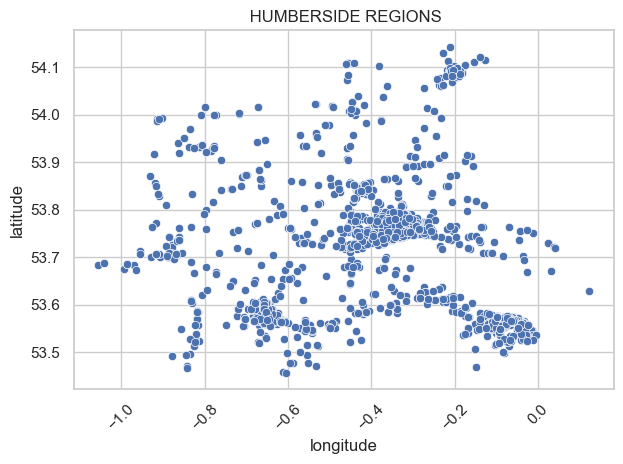

In [239]:
# Let's use scatterplot to visualize 
sns.scatterplot(data=filtered_titude, x='longitude', y ='latitude')
# Label the plot
plt.title(' HUMBERSIDE REGIONS')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Elbow Diagram


### Determinationa of appropriate number of cluster for K-Means Cluster using elbow method.

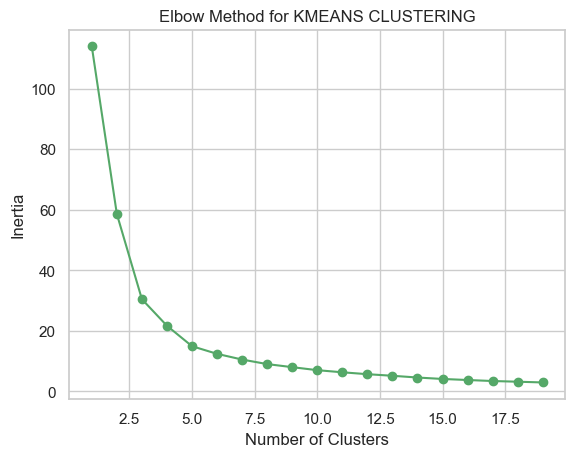

In [240]:
# Let's create an empty list to append KMeans
elbow = []
# Create a range of integers from 1 up to 20(does not include 20) and assign it to a new variable.
cluster = range(1,20)
# Iterate through each value in the cluster(variable) range.
for method in cluster:
    kmeans = KMeans(n_clusters=method, n_init=20)
    kmeans.fit(filtered_titude)
    elbow.append(kmeans.inertia_)

# Show the relationship between the number of clusters and the inertia values    
plt.plot(cluster, elbow, 'go-')
# Label the plot
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMEANS CLUSTERING')
# Display the plot
plt.show()

From the above diagram, 5 is the appropriate number of clusters because it is the point at which inertia start decreasing.

In [241]:
# Apply K-Means clustering with specified number of clusters and visualize the clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(filtered_titude)
centroids = kmeans.cluster_centers_

C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Scatterplot to show Kmeans Clustering for the Humberside Region

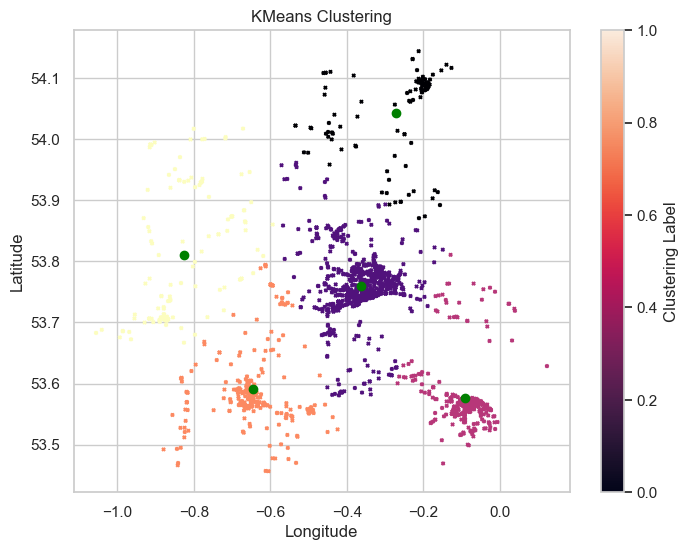

In [242]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=filtered_titude['longitude'], y=filtered_titude['latitude'], c=kmeans_labels, cmap='magma', s=5, marker='x')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='green')

# Label the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering')
colorbar = plt.colorbar()
colorbar.set_label('Clustering Label')

# Display the plot
plt.show()

C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adero\AppData\Local\Temp\ipykernel_35388\352430466.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(filtered_titude['longitude'], filtered_titude['latitude'], cmap='coolwarm')


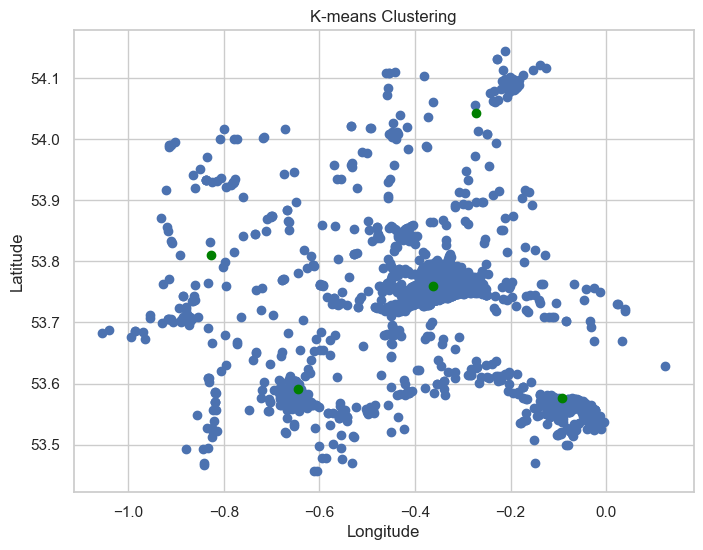

In [243]:
# Apply k-means clustering with specified number of clusters and visualise the clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(filtered_titude)

# Get centroid for the clusters
centroids = kmeans.cluster_centers_

# Increase the plot size
plt.figure(figsize=(8, 6))

# Plot the clusters
plt.scatter(filtered_titude['longitude'], filtered_titude['latitude'], cmap='coolwarm')
plt.scatter(centroids[:, 0], centroids[:, 1], color='green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')

plt.show()

## KMeans Inertia

In [244]:
kmeans.inertia_

14.964631261814596

## Exploring different numbers of cluster to monitor Inertia value

## Cluster = 3

In [245]:
# Apply k-means clustering with specified number of clusters and visualize the clusters
kmeans_2= KMeans(n_clusters=3,random_state=42)
kmeans_2.fit_predict(filtered_titude)
kmeans_2.inertia_

C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


30.49107232387085

## Cluster = 7

In [246]:
# Apply k-means clustering with specified number of clusters and visualize the clusters
kmeans_3= KMeans(n_clusters=7,random_state=42)
kmeans_3.fit_predict(filtered_titude)
kmeans_3.inertia_

C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10.554338599293821

## Cluster = 14

In [247]:
# Apply k-means clustering with specified number of clusters and visualize the clusters
kmeans_4= KMeans(n_clusters=14,random_state=42)
kmeans_4.fit_predict(filtered_titude)
kmeans_4.inertia_

C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4.664041592697021

## KMEANS CLUSTERING OF ACCIDENT DISTRIBUTION IN HUMBERSIDE REGION ON A MAP OF GREAT BRITAIN

In [248]:
print(len(kmeans_labels))
print(len(filtered_titude))

1709
1709


In [249]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(filtered_titude[['latitude', 'longitude']])


C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [250]:
unique_clusters = list(set(cluster_labels))

In [251]:
clustered_data = []
for cluster_idx in unique_clusters:
    cluster_data = filtered_titude[cluster_labels == cluster_idx][['latitude', 'longitude']].values.tolist()
    clustered_data.append(cluster_data)


In [252]:
!pip install folium


In [253]:
import folium

map_center = [filtered_titude['latitude'].mean(), filtered_titude['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=9)

# Define colors for each cluster label
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange']

for cluster_idx, cluster_data in enumerate(clustered_data):
    for lat, lon in cluster_data:
        folium.CircleMarker(
            location=[lat, lon],
            radius=3,
            color='cluster_colors[cluster_idx]',  # Color based on cluster label
            fill=True,
            fill_color='cluster_colors[cluster_idx]',
            fill_opacity=0.4,
            popup=f'Cluster: {cluster_idx}',
            marker='o'  # Use 'o' marker
        ).add_to(m)
m

In [254]:
# Using KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
filtered_titude['cluster'] = kmeans.fit_predict(filtered_titude[['latitude', 'longitude']])
centroids = kmeans.cluster_centers_

# Convert cluster labels and coordinates to lists
cluster_labels = filtered_titude['cluster'].tolist()
latitude_list = filtered_titude['latitude'].tolist()
longitude_list = filtered_titude['longitude'].tolist()

# Create a Folium map instance
map_center = [filtered_titude['latitude'].mean(), filtered_titude['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=9)

# Define markers for different clusters
cluster_markers = ['blue', 'orange', 'green', 'purple', 'pink']

# Add cluster points to the map
for lat, lon, label in zip(latitude_list, longitude_list, cluster_labels):
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color=cluster_markers[label],  # Color based on cluster label
        fill=True,
        fill_color=cluster_markers[label],
        fill_opacity=0.4,
    ).add_to(m)

# Add cluster centers to the map
for centroid, marker_color in zip(centroids, cluster_markers):
    folium.Marker(
        location=[centroid[0], centroid[1]],
        icon=folium.Icon(color=marker_color, icon='info-sign')
    ).add_to(m)

# Show the map
m


C:\Users\adero\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## DBSCAN


In [255]:
dbscan = DBSCAN(eps = 0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(filtered_titude)

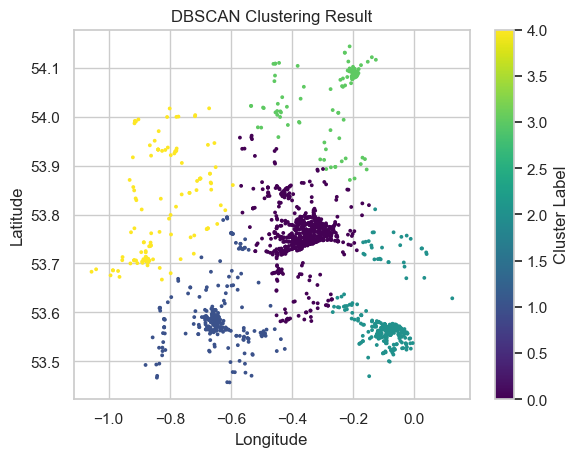

In [256]:
# Plot the DBSCAN clustering
plt.scatter(filtered_titude['longitude'],y=filtered_titude['latitude'],c=dbscan_labels,cmap='viridis',s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering Result')
#  Show the plot
plt.colorbar(label='Cluster Label')
plt.show()

## 6.   Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

### Multiples of IQR (Interquartile Range)



### Vehicle table

### Age of Driver

In [257]:
# Calculate Q1 and Q3 of the column using the np.percentile function
a = vehicle_table['age_of_driver']
q75, q25 = np.percentile (a, [75, 25])
iqr = q75 - q25
iqr

20.0

In [258]:
q25 - 1.5

27.5

In [259]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-1.0 79.0


In [260]:
# Define a function to get Upper and Lower Boundaries

def function_boundaries(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [261]:
# Let's apply the function to the column
function = vehicle_table['age_of_driver']
lower_boundaries, upper_boundaries = function_boundaries(function)


print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)

lower_boundaries: -1.0
upper_boundaries: 79.0


## Age of vehicle

In [262]:
# Calculate Q1 and Q3 of the column using the np.percentile function

b = vehicle_table['age_of_vehicle']
q75, q25 = np.percentile (b, [75, 25])
iqr = q75 - q25
iqr

6.0

In [263]:
q25 - 1.5

3.5

In [264]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-4.0 20.0


In [265]:
#Defining a Function to Get Upper and Lower Boundaries

def function2_boundaries(data2):
    q25, q75 = np.percentile(data2, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [266]:
# Applying the function to the Columns

function2 = vehicle_table['age_of_vehicle']
lower_boundaries, upper_boundaries = function2_boundaries(function2)

print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)


lower_boundaries: -4.0
upper_boundaries: 20.0


## Engine Capacity

In [267]:
# Calculate Q1 and Q3 of the column using the np.percentile function

C = vehicle_table['engine_capacity_cc']
q75, q25 = np.percentile (C, [75, 25])
iqr = q75 - q25
iqr

1911.0

In [268]:
q25 - 1.5

-2.5

In [269]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-2867.5 4776.5


In [270]:
# Define a function to get Upper and Lower Boundaries

def function3_boundaries(data3):
    q25, q75 = np.percentile(data3, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [271]:
# Let's apply the function to the column
function3 = vehicle_table['engine_capacity_cc']
lower_boundaries, upper_boundaries = function3_boundaries(function3)


print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)

lower_boundaries: -2867.5
upper_boundaries: 4776.5


## Driver Imd Decile

In [272]:
# Calculate Q1 and Q3 of the column using the np.percentile function

D = vehicle_table['driver_imd_decile']
q75, q25 = np.percentile (D, [75, 25])
iqr = q75 - q25
iqr

6.0

In [273]:
q25 - 1.5

-0.5

In [274]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-8.0 16.0


In [275]:
#Defining a Function to Get Upper and Lower Boundaries

def function4_boundaries(data4):
    q25, q75 = np.percentile(data4, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [276]:
# Let's apply the function to the column
function4 = vehicle_table['driver_imd_decile']
lower_boundaries, upper_boundaries = function4_boundaries(function4)


print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)

lower_boundaries: -8.0
upper_boundaries: 16.0


## ACCIDENT TABLE

### Road Surface Conditions

In [277]:
# Calculate Q1 and Q3 of the column using the np.percentile function

ROAD_c = accident_table['road_surface_conditions']
q75, q25 = np.percentile (ROAD_c, [75, 25])
iqr = q75 - q25
iqr

1.0

In [278]:
q25 - 1.5

-0.5

In [279]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-0.5 3.5


In [280]:
# Define a function to get Upper and Lower Boundaries

def roadsurface_boundaries(road_data):
    q25, q75 = np.percentile(road_data, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [281]:
#  Let's apply the function to the column
roads_function = accident_table['road_surface_conditions']
lower_boundaries, upper_boundaries = roadsurface_boundaries(roads_function)


print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)

lower_boundaries: -0.5
upper_boundaries: 3.5


## Weather Conditions

In [282]:
# Calculate Q1 and Q3 of the column using the np.percentile function

weather_con = accident_table['weather_conditions']
q75, q25 = np.percentile (weather_con, [75, 25])
iqr = q75 - q25
iqr

0.0

In [283]:
q25 - 1.5

-0.5

In [284]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

1.0 1.0


In [285]:
# Define a function to get Upper and Lower Boundaries

def weather_boundaries(weather_data):
    q25, q75 = np.percentile(weather_data, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries


In [286]:
# Applying the function to the Columns

weather_function = accident_table['weather_conditions']
lower_boundaries, upper_boundaries = weather_boundaries(weather_function)

print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)


lower_boundaries: 1.0
upper_boundaries: 1.0


## Speed Limit

In [287]:
# Calculate Q1 and Q3 of the column using the np.percentile function

speed_con = accident_table['speed_limit']
q75, q25 = np.percentile (speed_con, [75, 25])
iqr = q75 - q25
iqr

10.0

In [288]:
q25 - 1.5

28.5

In [289]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

15.0 55.0


In [290]:
# Define a function to get Upper and Lower Boundaries

def speed_boundaries(speed_data):
    q25, q75 = np.percentile(speed_data, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [291]:
# Applying the function to the Columns

speed_function = accident_table['speed_limit']
lower_boundaries, upper_boundaries = speed_boundaries(speed_function)

print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)


lower_boundaries: 15.0
upper_boundaries: 55.0


## Number Of Vehicles

In [292]:
# Calculate Q1 and Q3 of the column using the np.percentile function

vehicles_num = accident_table['number_of_vehicles']
q75, q25 = np.percentile (vehicles_num,  [75, 25])
iqr = q75 - q25
iqr

1.0

In [293]:
q25 - 1.5

-0.5

In [294]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-0.5 3.5


In [295]:
# Define a function to get Upper and Lower Boundaries

def vehicles_numbers(vehicle_data):
    q25, q75 = np.percentile(vehicle_data, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [296]:
# Apply the function to the Columns

vehicle_function = accident_table['number_of_vehicles']
lower_boundaries, upper_boundaries = vehicles_numbers(vehicle_function)

print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)

lower_boundaries: -0.5
upper_boundaries: 3.5


## Casualty Table

## Age of Casuality

In [297]:
# Calculate Q1 and Q3 of the column using the np.percentile function

casualty_age = casualty_table['age_of_casualty']
q75, q25 = np.percentile (casualty_age, [75, 25])
iqr = q75 - q25
iqr

27.0

In [298]:
q25 - 1.5

21.5

In [299]:
print(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

-17.5 90.5


In [300]:
# Define a function to get Upper and Lower Boundaries


def casualty_A(casualty_data):
    q25, q75 = np.percentile(casualty_data, [25, 75])
    iqr = q75 - q25
    lower_boundaries = q25 - 1.5 * iqr
    upper_boundaries = q75 + 1.5 * iqr
    return lower_boundaries, upper_boundaries

In [301]:
# Apply the function to the Columns



casualty_function = casualty_table['age_of_casualty']
lower_boundaries, upper_boundaries = casualty_A(casualty_function)

print("lower_boundaries:", lower_boundaries)
print("upper_boundaries:", upper_boundaries)

lower_boundaries: -17.5
upper_boundaries: 90.5


## Grubb's Test

In [302]:
value = np.array(vehicle_table['age_of_driver'])
average = np.mean(value)
average

39.39115160567588

In [303]:
absolute_values = abs(value-average)
absolute_values

array([ 7.39115161,  5.60884839,  5.39115161, ..., 28.60884839,
       36.60884839,  0.39115161])

In [304]:
len(absolute_values)

167375

In [305]:
absolute_values[143617]

30.60884839432412

In [306]:
np.argmax(absolute_values)

67465

In [307]:
maximum_value = max(absolute_values)
maximum_value

60.60884839432412

In [308]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

3.971665273720635

In [309]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [310]:
outlier = get_outlier(len(value), 0.05)

Grubbs Critical Value: 5.124052908584172


From the above information we can see that Grubbs_test is (3.971665273720635) which is less than the Grubbs Critical Value (5.124052908584172) hence we can conclude that there is no outliers  as the -1 has already be cleaned.

## Age of Vehicle

In [311]:
value = np.array(vehicle_table['age_of_vehicle'])
average = np.mean(value)
average

7.364630321135175

In [312]:
absolute_values = abs(value-average)
absolute_values

array([1.36463032, 5.36463032, 2.36463032, ..., 6.36463032, 2.36463032,
       5.36463032])

In [313]:
len(absolute_values)

167375

In [314]:
absolute_values[143617]

88.63536967886482

In [315]:
np.argmax(absolute_values)

143617

In [316]:
maximum_value = max(absolute_values)
maximum_value

88.63536967886482

In [317]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

17.412716373540707

In [318]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [319]:
outlier = get_outlier(len(value), 0.05)
outlier

Grubbs Critical Value: 5.124052908584172


5.124052908584172

From the above given information Grubbs Test (17.412716373540707) is greater than Grubbs Critical Value (5.124052908584172) hence, we can conclude there is an outlier.

## Engine Capacity

In [320]:
value = np.array(vehicle_table['engine_capacity_cc'])
average = np.mean(value)
average

1332.2945541448842

In [321]:
absolute_values = abs(value-average)
absolute_values

array([ 635.70544586,   62.70544586, 1333.29455414, ...,  662.70544586,
       1333.29455414,  333.29455414])

In [322]:
len(absolute_values)

167375

In [323]:
absolute_values[143617]

2372.7054458551156

In [324]:
np.argmax(absolute_values)

103354

In [325]:
maximum_value = max(absolute_values)
maximum_value

16363.705445855116

In [326]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

10.601651391900376

In [327]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

outlier = get_outlier(len(value), 0.05)

From the above given information Grubbs Test (10.601651391900376) is greater than Grubbs Critical Value (5.124052908584172) hence, we can conclude there is an outlier.

## Driver_imd_decile

In [328]:
value = np.array(vehicle_table['driver_imd_decile'])
average = np.mean(value)
average

3.9041433905899927

In [329]:
absolute_values = abs(value-average)
absolute_values

array([0.09585661, 3.09585661, 4.90414339, ..., 1.09585661, 5.09585661,
       3.09585661])

In [330]:
len(absolute_values)

167375

In [331]:
absolute_values[143617]

1.9041433905899927

In [332]:
np.argmax(absolute_values)

194

In [333]:
maximum_value = max(absolute_values)
maximum_value

6.095856609410007

In [334]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

1.7693158098035306

In [335]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [336]:
outlier = get_outlier(len(value), 0.05)
outlier

Grubbs Critical Value: 5.124052908584172


5.124052908584172

From the above information we can see that Grubbs_test is (1.7693158098035306) which is less than the Grubbs Critical Value (5.124052908584172) hence we can conclude that there is no outliers

## Road Surface conditions

In [337]:
value = np.array(accident_table['road_surface_conditions'])
average = np.mean(value)
average

1.3915832410443096

In [338]:
absolute_values = abs(value-average)
absolute_values

array([7.60841676, 0.39158324, 0.60841676, ..., 0.39158324, 0.39158324,
       0.39158324])

In [339]:
len(absolute_values)

91199

In [340]:
absolute_values[84099]

0.39158324104430964

In [341]:
np.argmax(absolute_values)

0

In [342]:
maximum_value = max(absolute_values)
maximum_value

7.60841675895569

In [343]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

8.21922768096996

From the above given information Grubbs Test (8.21922768096996) is greater than Grubbs Critical Value (5.124052908584172) hence, we can conclude there is an outlier.

## Speed limit

In [344]:
value = np.array(accident_table['speed_limit'])
average = np.mean(value)
average

36.2741916029781

In [345]:
absolute_values = abs(value-average)
absolute_values

array([16.2741916, 16.2741916,  6.2741916, ..., 23.7258084,  6.2741916,
        6.2741916])

In [346]:
len(absolute_values)

91199

In [347]:
absolute_values[84393]

6.2741916029780995

In [348]:
np.argmax(absolute_values)

626

In [349]:
maximum_value = max(absolute_values)
maximum_value

33.7258083970219

In [350]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

2.4281403452889063

In [351]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [352]:
outlier = get_outlier(len(value), 0.05)
outlier

Grubbs Critical Value: 5.008277118225632


5.008277118225632

From the above information we can see that Grubbs_test is (2.4281403452889063) which is less than the Grubbs Critical Value (5.053760736627291) hence we can conclude that there is no outliers

## Weather Conditions

In [353]:
value = np.array(accident_table['weather_conditions'])
average = np.mean(value)
average

1.702156821894977

In [354]:
absolute_values = abs(value-average)
absolute_values

array([7.29784318, 0.70215682, 0.70215682, ..., 0.70215682, 0.70215682,
       0.70215682])

In [355]:
len(absolute_values)

91199

In [356]:
absolute_values[84393]

0.702156821894977

In [357]:
np.argmax(absolute_values)

0

In [358]:
maximum_value = max(absolute_values)
maximum_value

7.297843178105023

In [359]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

3.953516147675719

In [360]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [361]:
outlier = get_outlier(len(value), 0.05)
outlier

Grubbs Critical Value: 5.008277118225632


5.008277118225632

From the above information we can see that Grubbs_test is (3.953516147675719) which is less than the Grubbs Critical Value (5.053760736627291) hence we can conclude that there is no outliers.

## Number of vehicles

In [362]:
value = np.array(accident_table['number_of_vehicles'])
average = np.mean(value)
average

1.8352723165824187

In [363]:
absolute_values = abs(value-average)
absolute_values

array([0.83527232, 0.83527232, 0.83527232, ..., 0.16472768, 0.16472768,
       0.83527232])

In [364]:
len(absolute_values)

91199

In [365]:
absolute_values[84393]

0.16472768341758126

In [366]:
np.argmax(absolute_values)

64507

In [367]:
maximum_value = max(absolute_values)
maximum_value

11.164727683417581

In [368]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

16.48493814492711

In [369]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [370]:
outlier = get_outlier(len(value), 0.05)
outlier

Grubbs Critical Value: 5.008277118225632


5.008277118225632

From the above given information Grubbs Test (16.48493814492711) is greater than Grubbs Critical Value (5.008277118225632) hence, we can conclude there is an outlier.

## Age of casualty

In [371]:
value = np.array(casualty_table['age_of_casualty'])
average = np.mean(value)
average

36.48974771594684

In [372]:
absolute_values = abs(value-average)
absolute_values

array([ 5.48974772, 34.48974772, 32.48974772, ...,  1.51025228,
       39.51025228, 11.51025228])

In [373]:
len(absolute_values)

115584

In [374]:
absolute_values[84393]

22.48974771594684

In [375]:
np.argmax(absolute_values)

50687

In [376]:
maximum_value = max(absolute_values)
maximum_value

62.51025228405316

In [377]:
sev = np.std(value)
Grubbs_test = maximum_value/sev
Grubbs_test

3.292623113281856

In [378]:
def get_outlier(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    get_outlier = numerator / denominator
    
    print('Grubbs Critical Value: {}'.format(get_outlier))
    return get_outlier

In [379]:
outlier = get_outlier(len(value), 0.05)
outlier

Grubbs Critical Value: 5.053760736627291


5.053760736627291

From the above information we can see that Grubbs_test is (3.292623113281856) which is less than the Grubbs Critical Value (5.053760736627291) hence we can conclude that there is no outliers.

##  Isolation Forests

In [380]:
accident_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   longitude                                    91199 non-null  float64       
 4   latitude                                     91199 non-null  float64       
 5   police_force                                 91199 non-null  int64         
 6   accident_severity                            91199 non-null  int64         
 7   number_of_vehicles                           91199 non-null  int64         
 8   number_of_casualties                         91199 non-null  int64         


In [381]:
valid_table = accident_table[['accident_year', 'police_force','longitude', 'latitude']]

In [382]:
valid_table= accident_table.select_dtypes(include = 'number')

In [383]:
valid_table.shape

(91199, 26)

In [384]:
valid_table = valid_table.dropna()

In [385]:
model = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = model.fit_predict(valid_table)
LOF_Scores = model.negative_outlier_factor_
LOF_pred=pd.Series(y_pred, index=valid_table.index).replace([-1,1],[1,0])
LOF_anomalies=valid_table[LOF_pred==1]

In [386]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

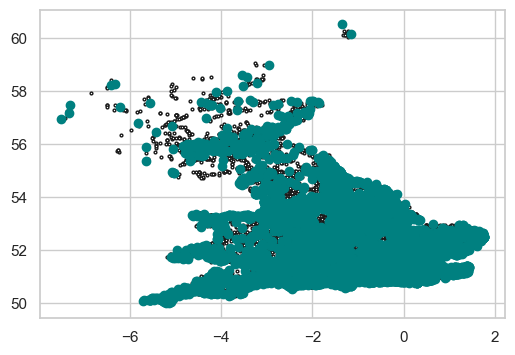

In [387]:
# Create a scatter plot to visualize the results of LocalOutlierFactor (LOF) analysis.
plt.figure(figsize=(6,4))
plt.scatter(valid_table['longitude'],valid_table['latitude'],c='white',s=4,edgecolor='k') #create a scatter plot of the latitude against longitude
# Plot the latitude against longitude for the data points that were identified as outliers
plt.scatter(LOF_anomalies['longitude'],LOF_anomalies['latitude'],c='teal')
# Show the plot
plt.show()

The visualization helps to understand the spatial distribution of actual data and the detected outliers. 

The above scatter plot shows the geographical coordinates (longitude and latitude) of the data point. The white dots with black edges represents the main data points while teal cirlce represents the outliers that were identified by the LOF Algorithms. 

## Detection of Outliers Using Isolation Forest

In [388]:
ranst=np.random.RandomState(0)

model = IsolationForest(max_samples=100,random_state=ranst, contamination=.05) 
model.fit(valid_table)
if_scores = model.decision_function(valid_table)
if_anomalies=model.predict(valid_table)
if_anomalies=pd.Series(if_anomalies, index=valid_table.index).replace([-1,1],[1,0])
# Outlier labels are converted 1 for outliers and 0 for inliers. 
if_anomalies=valid_table [if_anomalies==1];

In [389]:
# Dataframe containing outlier points

if_anomalies 

accident_year  longitude   latitude  police_force  accident_severity  \
0               2020  -0.254001  51.462262             1                  3   
12              2020   0.221108  51.595036             1                  3   
33              2020  -0.108489  51.591936             1                  3   
37              2020   0.147310  51.530303             1                  3   
75              2020  -0.096469  51.371789             1                  3   
...              ...        ...        ...           ...                ...   
91189           2020  -2.946947  56.491558            99                  2   
91190           2020  -2.927095  56.468699            99                  3   
91192           2020  -3.662274  55.116161            99                  3   
91193           2020  -3.841439  56.331864            99                  3   
91196           2020  -2.271903  57.186317            99                  2   

       number_of_vehicles  number_of_casualties  day_of_week  \
0                       1                     1            3   
12                      2                     2            4   
33                      2                     1            4   
37                      1                     2            4   
75                      4                     2            5   
...                   ...                   ...          ...   
91189                   1                     1            3   
91190                   1                     1            2   
91192                   2                     2            7   
91193                   1                     1            3   
91196                   2                     1            4   

       local_authority_district  first_road_class  ...  \
0                            10                 6  ...   
12                           15                 3  ...   
33                           31                 6  ...   
37                           16                 5  ...   
75                           20                 3  ...   
...                         ...               ...  ...   
91189                       918                 6  ...   
91190                       918                 6  ...   
91192                       917                 3  ...   
91193                       934                 6  ...   
91196                       910                 4  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            9                 1   
12                                           9                 1   
33                                           9                 4   
37                                           9                 7   
75                                           5                 4   
...                                        ...               ...   
91189                                        0                 1   
91190                                        0                 4   
91192                                        0                 1   
91193                                        0                 1   
91196                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
12                      7                        1   
33                      9                        9   
37                      7                        1   
75                      1                        2   
...                   ...                      ...   
91189                   9                        2   
91190                   1                        2   
91192                   1                        1   
91193                   2                        2   
91196                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                               0              

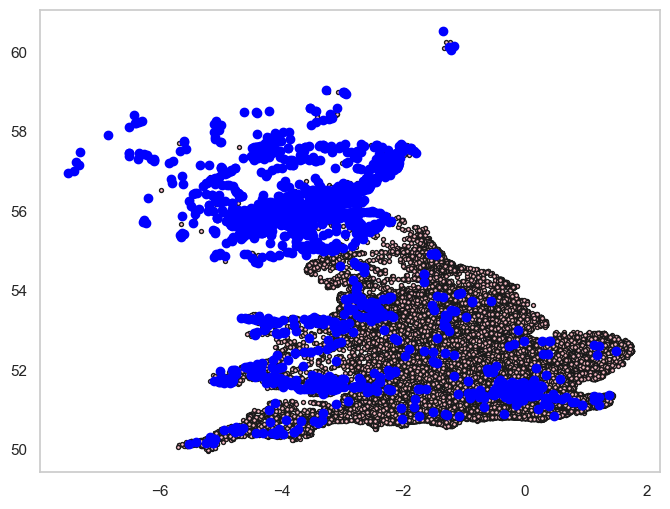

In [390]:
plt.figure(figsize=(8,6))
plt.scatter(valid_table['longitude'],valid_table['latitude'],color='pink',s=8,edgecolor='k')
plt.scatter(if_anomalies['longitude'],if_anomalies['latitude'],color='blue')
plt.grid(False)
# Showthe plot
plt.show()

## 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [404]:
accident_table['accident_severity'].unique()

array(['Fatal', 'Not Fatal', 'Severe'], dtype=object)

In [405]:
# Map accident severity
mapping = {'Fatal': True, 'Not Fatal': False, 'Severe': False}
series_label = accident_table['accident_severity'].map(mapping)

# Create y_labels Series from the new column
y_labels = series_label

In [406]:
y_labels

0         True
1         True
2         True
3        False
4         True
         ...  
91194    False
91195     True
91196    False
91197     True
91198     True
Name: accident_severity, Length: 91199, dtype: bool

In [407]:
dfacc = y_labels.value_counts()

In [408]:
dfacc

accident_severity
True     71453
False    19746
Name: count, dtype: int64

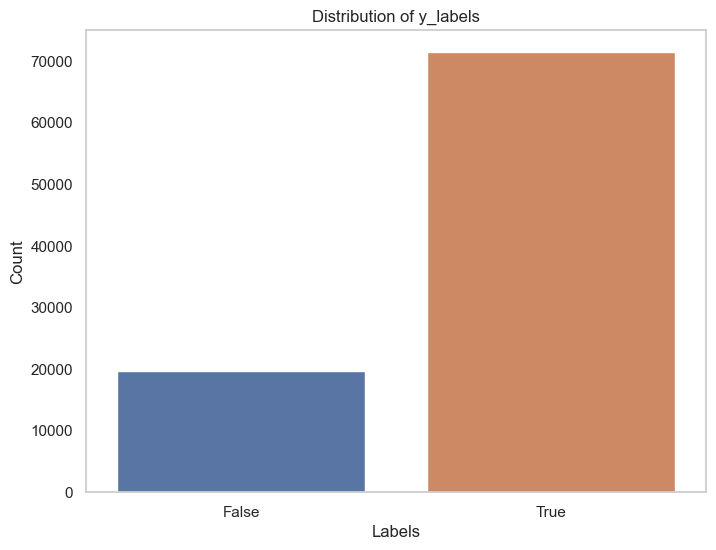

In [409]:
# Countplot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x=y_labels)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of y_labels')
plt.grid(False)
# Display the plot
plt.show()

In [414]:
!pip install scikit-learn


In [ ]:
!conda install -c conda-forge imbalanced-learn


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
         


In [ ]:

from imblearn.under_sampling import RandomUnderSampler



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create a balanced dataset using the RandomUnderSampler.
rus = RandomUnderSampler()
balanced_frame, y_data = rus.fit_resample(dataf_accident, y_labels)


In [ ]:
# Convert ydata series back to a pandas series
y_data = pd.Series(y_data)

In [ ]:
# Check that the new dataframe and labels have a balanced number of fatal and non-fatal accidents
y_data.value_counts()

In [ ]:
#use seaborn to visualize y_data
sns.countplot(x=y_data)
plt.grid(False)
#display plot
plt.show()

## Feature Selection Using Filtering

In [ ]:
days = {2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 
       7:"Saturday", 1:"Sunday"}

accident_table.day_of_week = accident_table.day_of_week.apply(lambda x: days[x])
accident_table.day_of_week.head()

In [ ]:
accident_table["Hour"] = accident_table.time.apply(lambda x: str(x).split(":")[0]).values.astype("int64")
accident_table.drop({"time"}, axis=1, inplace=True)

In [ ]:
vehicle_table = pd.read_sql_query("SELECT * FROM vehicle WHERE accident_year = 2020", con)
vehicle_table

In [ ]:
casualty_table = pd.read_sql_query("SELECT * FROM casualty WHERE accident_year = 2020", con)
casualty_table

In [ ]:
lsoa_table = pd.read_sql_query("SELECT * FROM lsoa" , con)
lsoa_table

In [ ]:
df_acc = accident_table.merge(vehicle_table, on = 'accident_index')

In [ ]:
df_new = df_acc.merge(casualty_table, on = 'accident_index')

In [ ]:
df_new

In [ ]:
# plot of number of vehicles and number of casualies
for column in ["number_of_vehicles", "number_of_casualties"]:
    var_value = df_new[column].value_counts()
    
    plt.figure(figsize=(14,5))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
                palette = sns.color_palette("rocket"))    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

## 1. Are there significant hours of the day, and days of the week, on which accidents occur?

In [ ]:
plot_time = accident_table['time']
plot_time

In [ ]:
significant_hours = accident_table.groupby('time')['accident_index'].count().sort_values(ascending=False)
significant_hours

In [ ]:
print(accident_table.columns)


In [ ]:
print(accident_table.head())


In [ ]:
accident_table.info()

In [ ]:
accident_hour = accident_table.groupby('Hour')['accident_index'].count().sort_values(ascending=True)

In [ ]:
accident_hour.sum()

In [ ]:

accident_hour = df_new.groupby('Hour')['accident_index'].count().reindex(range(24), fill_value=0)

# Calculate the total number of accidents
total_accidents = accident_hour.sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(accident_hour.index, accident_hour.values, color='skyblue')

# Add percentages to the top of each bar
for i, count in enumerate(accident_hour.values):
    percentage = (count / total_accidents) * 100
    plt.text(accident_hour.index[i], count + 50, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Hour of the Day')

# Set x-axis tick locations and labels
plt.xticks(range(24))

plt.show()

In [ ]:
accident_day = accident_table.groupby('day_of_week')['accident_index'].count().sort_values(ascending=True)

In [ ]:
accident_day

In [ ]:
total_accidents = accident_day.sum()
accident_day_percentage = (accident_day / total_accidents) * 100


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(accident_day.index, accident_day.values, color='salmon')

# Add percentages to the top of each bar
for i, count in enumerate(accident_day.values):
    plt.text(accident_day.index[i], count + 50, f"{accident_day_percentage[i]:.1f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accidents by Day of the Week')
plt.show()

## 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [ ]:
df_acc = accident_table.merge(vehicle_table, on = 'accident_index')

In [ ]:
vehicle_table['vehicle_type']

In [ ]:
#df_motorcyle = df_acc[df_acc['vehicle_type'].isin(vehicle_category)]

In [ ]:
df_motorcyle

In [ ]:
bike_accident_hour = df_motorcyle.groupby('Hour')['accident_index'].count().sort_values(ascending=True)

In [ ]:
bike_accident_hour

In [ ]:
total_bike_accidents = bike_accident_hour.sum()
bike_accident_hour_percentage = (bike_accident_hour / total_bike_accidents) * 100

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'bike_accident_hour' is a DataFrame containing the counts of bike accidents by hour
plt.figure(figsize=(10, 6))
plt.bar(bike_accident_hour.index, bike_accident_hour.values, color='orange')

plt.xlabel('Hour of the Day')
plt.ylabel('Bike Accident Count')
plt.title('Bike Accidents by Hour of the Day')

# Set x-axis tick locations and labels from 1 to 23
plt.xticks(range(1, 24))

# Calculate the total number of bike accidents
total_bike_accidents = bike_accident_hour.sum()

# Add percentages to the top of each bar
for i, count in enumerate(bike_accident_hour.values):
    percentage = (count / total_bike_accidents) * 100
    plt.text(bike_accident_hour.index[i], count + 50, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
bike_accident_by_day = df_motorcyle.groupby('day_of_week')['accident_index'].count().sort_values(ascending=True)

In [ ]:
bike_accident_by_day

In [ ]:
total_bike_accidents = bike_accident_by_day.sum()
bike_accident_by_day_percentage = (bike_accident_by_day / total_bike_accidents) * 100

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(bike_accident_by_day.index, bike_accident_by_day.values, color='orange')

# Add percentages to the top of each bar
for i, count in enumerate(bike_accident_by_day.values):
    plt.text(bike_accident_by_day.index[i], count + 50, f"{bike_accident_by_day_percentage[i]:.1f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Day of the Week')
plt.ylabel('Bike Accident Count')
plt.title('Bike Accidents by Day of the Week')
plt.show()


## 3.For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [ ]:
casualty_table

In [ ]:
ped = casualty_table[casualty_table['casualty_class']==3]

In [ ]:
ped

In [ ]:
df_ped= accident_table.merge(ped, on='accident_index')

In [ ]:
df_ped

In [ ]:
df_ped_hour = df_ped1.groupby('Hour')['accident_index'].count().sort_values(ascending=False)

In [ ]:
df_ped_hour

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_ped_hour.index, df_ped_hour.values, color='green')

plt.xlabel('Hour of the Day')
plt.ylabel('Pedestrian Accident Count')
plt.title('Pedestrian Accidents by Hour of the Day')
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(df_ped_hour.index, df_ped_hour.values, color='green')

plt.xlabel('Hour of the Day')
plt.ylabel('Pedestrian Accident Count')
plt.title('Pedestrian Accidents by Hour of the Day')

# Set x-axis tick locations and labels from 1 to 23
plt.xticks(range(1, 24))

# Calculate the total number of pedestrian accidents
total_ped_accidents = df_ped_hour.sum()

# Add percentages to the top of each bar
for i, count in enumerate(df_ped_hour.values):
    percentage = (count / total_ped_accidents) * 100
    plt.text(df_ped_hour.index[i], count + 50, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
df_ped_day= df_ped.groupby('day_of_week')['accident_index'].count().sort_values(ascending=False)

In [ ]:
df_ped_day

In [ ]:
total_ped_accidents = df_ped_day.sum()
df_ped_day_percentage = (df_ped_day / total_ped_accidents) * 100

In [ ]:


plt.figure(figsize=(10, 6))
plt.bar(df_ped_day.index, df_ped_day.values, color='purple')

# Add percentages to the top of each bar
for i, count in enumerate(df_ped_day.values):
    plt.text(df_ped_day.index[i], count + 50, f"{df_ped_day_percentage[i]:.1f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Accident Count')
plt.title('Pedestrian Accidents by Day of the Week')
plt.show()

## DATA CLEANING

In [ ]:
accident_table

In [ ]:


accident_table["accident_table"].replace(-1, np.nan, inplace=True)


## 4. Using the apriori algorithm, explore the impact of selected variables on accident severity.  

In [ ]:
import matplotlib.pyplot as plt

# Grouping by hour and counting accidents
accident_hour = df_new.groupby('Hour')['accident_index'].count().reindex(range(24), fill_value=0)

# Grouping by light condition and counting accidents
accident_light = df_new.groupby('Light_Condition')['accident_index'].count()

# Grouping by weather condition and counting accidents
accident_weather = df_new.groupby('Weather_Condition')['accident_index'].count()

# Calculate the total number of accidents
total_accidents = accident_hour.sum()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot accidents by hour
axes[0].bar(accident_hour.index, accident_hour.values, color='skyblue')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Accident Count')
axes[0].set_title('Accidents by Hour of the Day')
axes[0].set_xticks(range(24))

# Add percentages to the top of each bar
for i, count in enumerate(accident_hour.values):
    percentage = (count / total_accidents) * 100
    axes[0].text(accident_hour.index[i], count + 50, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

# Plot accidents by light condition
axes[1].bar(accident_light.index, accident_light.values, color='lightgreen')
axes[1].set_xlabel('Light Condition')
axes[1].set_ylabel('Accident Count')
axes[1].set_title('Accidents by Light Condition')

# Plot accidents by weather condition
axes[2].bar(accident_weather.index, accident_weather.values, color='lightcoral')
axes[2].set_xlabel('Weather Condition')
axes[2].set_ylabel('Accident Count')
axes[2].set_title('Accidents by Weather Condition')

plt.tight_layout()
plt.show()


In [ ]:
 Variable Selection
# Choose the variables that may impact accident severity
selected_variables = ['speed_limit', 'pedestrian_crossing_human_control','pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions','weather_conditions','road_surface_conditions','carriageway_hazards','police_force','local_authority_highway','local_authority_district','number_of_vehicles','local_authority_ons_district','road_type',]
# Step 3: Encoding
# Convert categorical variables to binary format
df_encoded = pd.get_dummies(df[selected_variables], drop_first=True)

# Step 4: Association Rule Mining
# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Step 5: Evaluate Rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Explore the discovered association rules
print(rules)

In [ ]:
# Step 3: Encoding
# Convert categorical variables to binary format
df_encoded = pd.get_dummies(df[selected_variables], drop_first=True)

# Step 4: Association Rule Mining
# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Step 5: Evaluate Rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Explore the discovered association rules
print(rules)

In [ ]:
accident_table.columns

In [ ]:
# Step 2: Variable Selection
# Choose the variables that may impact accident severity
selected_variables = ['variable1', 'variable2', ...]

# Step 3: Encoding
# Convert categorical variables to binary format
df_encoded = pd.get_dummies(df[selected_variables], drop_first=True)

# Step 4: Association Rule Mining
# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Step 5: Evaluate Rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Explore the discovered association rules
print(rules)